**APS360 Project - Instrument Classifier**

In [ ]:
import os
import matplotlib.pyplot as plt
#Load librosa to convert our audio files
import librosa
import librosa.display 
import pandas as pd
import numpy as np

#to actually play the audio
import IPython.display as ipd

"""
path_audio_files = "/Test audio/"
audio_clips = os.listdir(path_audio_files)

#check number of files
print(len(audio_clips))
print(audio_clips)
"""

'\npath_audio_files = "/Test audio/"\naudio_clips = os.listdir(path_audio_files)\n\n#check number of files\nprint(len(audio_clips))\nprint(audio_clips)\n'

**Upload CSV**

In [ ]:
df = pd.read_csv (r'/content/train.csv') 
df


fname         label  manually_verified
0     00044347.wav        Hi-hat                  0
1     001ca53d.wav     Saxophone                  1
2     002d256b.wav       Trumpet                  0
3     0033e230.wav  Glockenspiel                  1
4     00353774.wav         Cello                  1
...            ...           ...                ...
9468  ffec59fb.wav     Fireworks                  0
9469  fff37590.wav        Hi-hat                  0
9470  fff44ac6.wav      Laughter                  0
9471  fff6a13d.wav         Chime                  0
9472  fff81f55.wav         Cough                  1

[9473 rows x 3 columns]

**Get count of each instrument in csv**

In [ ]:
groupby_label = df.groupby(['label']).count()
print(str(groupby_label.sort_values(by=['fname'], ascending= False)))

NameError: ignored

**Choose instruments for classification**

In [ ]:
df = df[df['label'].isin(['Acoustic_guitar','Hi-hat','Double_bass','Saxophone','Clarinet', 'Cello','Trumpet','Bass_drum', 'Violin_or_fiddle', 'Flute'])]

NameError: ignored

In [ ]:
df

fname      label  manually_verified
0     00044347.wav     Hi-hat                  0
1     001ca53d.wav  Saxophone                  1
2     002d256b.wav    Trumpet                  0
4     00353774.wav      Cello                  1
5     003b91e8.wav      Cello                  0
...            ...        ...                ...
9444  ff752a0c.wav   Clarinet                  1
9448  ff875923.wav      Cello                  0
9451  ff9c6c3f.wav    Trumpet                  0
9458  ffc92b01.wav      Cello                  1
9469  fff37590.wav     Hi-hat                  0

[3000 rows x 3 columns]

**make sure size and count matches**

In [ ]:
df.shape

(3000, 3)

In [ ]:
chosen = df.groupby(['label']).count()
chosen

fname  manually_verified
label                                     
Acoustic_guitar     300                300
Bass_drum           300                300
Cello               300                300
Clarinet            300                300
Double_bass         300                300
Flute               300                300
Hi-hat              300                300
Saxophone           300                300
Trumpet             300                300
Violin_or_fiddle    300                300

**Save csv file**

In [ ]:
  df.to_csv('/content/new.csv',index=False)

NameError: ignored

**upload new csv**

In [ ]:
df2 = pd.read_csv ('/content/new.csv')
df2 

fname      label  manually_verified
0     00044347.wav     Hi-hat                  0
1     001ca53d.wav  Saxophone                  1
2     002d256b.wav    Trumpet                  0
3     00353774.wav      Cello                  1
4     003b91e8.wav      Cello                  0
...            ...        ...                ...
2995  ff752a0c.wav   Clarinet                  1
2996  ff875923.wav      Cello                  0
2997  ff9c6c3f.wav    Trumpet                  0
2998  ffc92b01.wav      Cello                  1
2999  fff37590.wav     Hi-hat                  0

[3000 rows x 3 columns]

**unzip audio files**

In [ ]:
!unzip /content/gdrive/MyDrive/DATA/audio_train.zip -d /content/audio/

Archive:  /content/gdrive/MyDrive/DATA/audio_train.zip
   creating: /content/audio/content/audio/audio_train/
  inflating: /content/audio/content/audio/audio_train/55d60bf0.wav  
  inflating: /content/audio/content/audio/audio_train/cfcf57f8.wav  
  inflating: /content/audio/content/audio/audio_train/43fc0633.wav  
  inflating: /content/audio/content/audio/audio_train/f46e0e2e.wav  
  inflating: /content/audio/content/audio/audio_train/d5cd5497.wav  
  inflating: /content/audio/content/audio/audio_train/0be246ba.wav  
  inflating: /content/audio/content/audio/audio_train/d245ed75.wav  
  inflating: /content/audio/content/audio/audio_train/7a397092.wav  
  inflating: /content/audio/content/audio/audio_train/0d0d648b.wav  
  inflating: /content/audio/content/audio/audio_train/cd7f12cc.wav  
  inflating: /content/audio/content/audio/audio_train/79c2afb1.wav  
  inflating: /content/audio/content/audio/audio_train/072f3031.wav  
  inflating: /content/audio/content/audio/audio_train/dc5be9d7

**split data**

In [ ]:
df = df2.sample(frac=1)
row, col = df.shape

In [ ]:
train = round(0.7*row) 
validation = round(0.15*row) 
train_data = df[:train]
validation_data = df[train:train+validation]
test_data = df[row - validation:]

**delete files that are not needed. only keep files that are in csv for the selected instruments**

In [ ]:
names = []

for name in df['fname']:
  names.append(name)

print(names)

['9fbd7166.wav', '0ad0bf22.wav', 'fa32109e.wav', '5eadbc6d.wav', '6563610a.wav', 'd6854eb4.wav', 'bb1f5874.wav', 'dcc7acba.wav', '323db912.wav', '28f5dfd6.wav', 'e2e24e19.wav', 'bc10442c.wav', 'c7497700.wav', 'aefd8a46.wav', '19105b8a.wav', '0730a3d8.wav', '8e718b85.wav', 'e03693c5.wav', 'cba78947.wav', '89f33989.wav', 'a7b12bf3.wav', '10da16fb.wav', '3ec68757.wav', 'ceca4273.wav', '7fb68d4d.wav', '36d20ab5.wav', '2a55208f.wav', 'ae26f1af.wav', 'e6f59785.wav', '1e93f880.wav', 'b571b485.wav', 'ca3f3698.wav', '27c53672.wav', '52860d22.wav', 'cf8c5111.wav', '78a86075.wav', 'a10486c4.wav', 'da8b8b06.wav', '074e2f09.wav', 'ed941e89.wav', '7ee57922.wav', '253b91fe.wav', 'd0219079.wav', 'ecb6ac6f.wav', '81ef75df.wav', '05561612.wav', '4428ce4f.wav', '4da6ae4b.wav', '8da75280.wav', '08894340.wav', '5e5bca7a.wav', 'de6ee8f7.wav', '812f079e.wav', 'd390f367.wav', '5689818f.wav', '3a77d7c4.wav', '7e3b2b71.wav', '79f04f95.wav', 'da1330e0.wav', 'db3ced72.wav', '1b2d8997.wav', '5c1bd24c.wav', '8a4d0d

In [ ]:
import glob
path = "/content/audio/audio_train/*.*"
names = []
for file in glob.glob(path):
  if os.path.basename(file) not in names : 
    try:
      os.remove(file)
    except:
      print("Error while deleting file : ", filePath)

In [ ]:
#os.path.basename(file)



```



















```



upload new.csv

In [ ]:
df = pd.read_csv ('/content/new.csv')

In [ ]:
train = round(0.7*row) 
validation = round(0.15*row) 

train_data = df[:train]
validation_data = df[train:train+validation]
test_data = df[row - validation:]

In [ ]:
#print(train_data)
#print(validation_data)
#print(test_data)
len(train_data)
chosen = train_data.groupby(['label']).count()
chosen


fname  manually_verified
label                                     
Acoustic_guitar     210                210
Bass_drum           207                207
Cello               212                212
Clarinet            218                218
Double_bass         199                199
Flute               206                206
Hi-hat              211                211
Saxophone           213                213
Trumpet             216                216
Violin_or_fiddle    208                208

In [ ]:
!unzip /content/gdrive/MyDrive/DATA/audio_train.zip -d /content/audio/

Archive:  /content/gdrive/MyDrive/DATA/audio_train.zip
   creating: /content/audio/content/audio/audio_train/
  inflating: /content/audio/content/audio/audio_train/55d60bf0.wav  
  inflating: /content/audio/content/audio/audio_train/cfcf57f8.wav  
  inflating: /content/audio/content/audio/audio_train/43fc0633.wav  
  inflating: /content/audio/content/audio/audio_train/f46e0e2e.wav  
  inflating: /content/audio/content/audio/audio_train/d5cd5497.wav  
  inflating: /content/audio/content/audio/audio_train/0be246ba.wav  
  inflating: /content/audio/content/audio/audio_train/d245ed75.wav  
  inflating: /content/audio/content/audio/audio_train/7a397092.wav  
  inflating: /content/audio/content/audio/audio_train/0d0d648b.wav  
  inflating: /content/audio/content/audio/audio_train/cd7f12cc.wav  
  inflating: /content/audio/content/audio/audio_train/79c2afb1.wav  
  inflating: /content/audio/content/audio/audio_train/072f3031.wav  
  inflating: /content/audio/content/audio/audio_train/dc5be9d7

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!mkdir train
!mkdir valid
!mkdir test


In [ ]:
train_names = []
valid_names = []
test_names = []

for name in train_data['fname']:
  train_names.append(name)
for name in validation_data['fname']:
  valid_names.append(name)
for name in test_data['fname']:
  test_names.append(name)

print(len(train_names))


2100


The code below is to separate our training, validation and testing data in 3 separate folders to be able to organize our waveforms and spectrograms for each set


In [ ]:
import glob
import shutil
path = "/content/audio/content/audio/audio_train/*.*"
for file in glob.glob(path):
  if os.path.basename(file) in train_names:
    shutil.copy(file, "/content/train")

  if os.path.basename(file) in valid_names:
    shutil.copy(file, "/content/valid")

  if os.path.basename(file) in test_names:
    shutil.copy(file, "/content/test")

In [ ]:
audio_train_files = "/content/train/"
audio_valid_files = "/content/valid/"
audio_test_files = "/content/test/"


audio_train_clips = os.listdir(audio_train_files)
audio_valid_clips = os.listdir(audio_valid_files)
audio_test_clips = os.listdir(audio_test_files)



#check number of files
#print(len(audio_train_clips))
print(audio_train_clips)


['0be52cd7.wav', '3b842547.wav', '644a201b.wav', '34a90030.wav', 'ac097834.wav', 'b47e0c27.wav', '3c713bcf.wav', '2fe59aa8.wav', '27c53672.wav', '49db5254.wav', '8708ffe8.wav', '01a5dc85.wav', '0b3636e4.wav', '91214155.wav', '04490642.wav', '1eb9d116.wav', 'a138161a.wav', '23219d68.wav', '8084970f.wav', '6eb59008.wav', '1314cdad.wav', '30114da8.wav', 'a16cc0fc.wav', '497e8e00.wav', '95b961c8.wav', '10884a97.wav', '85fd2b40.wav', '6b535a04.wav', '7bc9c37f.wav', '21b56eda.wav', '25ad6ed7.wav', '632fd5c9.wav', '9c0838c1.wav', 'ab8e8ae3.wav', '3289db4d.wav', '44645349.wav', '8fad9735.wav', 'b331f336.wav', '55a23759.wav', '4ddb034f.wav', '81db9098.wav', '0ed06544.wav', '7a82bd12.wav', '24eacf14.wav', '6ea22bc2.wav', 'a402ad98.wav', '0aab722d.wav', '654c910e.wav', '3c66098d.wav', '7352e28f.wav', '160507aa.wav', '848d442c.wav', '9a0ad181.wav', '9f0d8ba2.wav', '97223bf2.wav', '6514d3d3.wav', '0b82b3a5.wav', '8ebeeb5b.wav', '0aff3cde.wav', '37d26e27.wav', '02d367e4.wav', '267bda40.wav', '00fcba

The code below is to transform our waveforms for each respect

In [ ]:
#load audio files to visualize its waveform
a=[]

for i in range(len(audio_train_clips)):
  x, sr = librosa.load(audio_train_files+audio_train_clips[i], sr=22050)
  a.append(x)
  a.append(sr)

  #print(type(x), type(sr))
  #print(x.shape, sr)

In [ ]:
#load audio files to visualize its waveform
b=[]

for i in range(len(audio_valid_clips)):
  x, sr = librosa.load(audio_valid_files+audio_valid_clips[i], sr=22050)
  b.append(x)
  b.append(sr)

  #print(type(x), type(sr))
  #print(x.shape, sr)

In [ ]:
#load audio files to visualize its waveform
c=[]

for i in range(len(audio_test_clips)):
  x, sr = librosa.load(audio_test_files+audio_test_clips[i], sr=22050)
  c.append(x)
  c.append(sr)

  #print(type(x), type(sr))
  #print(x.shape, sr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f3970fa8950> (for post_execute):


KeyboardInterrupt: ignored

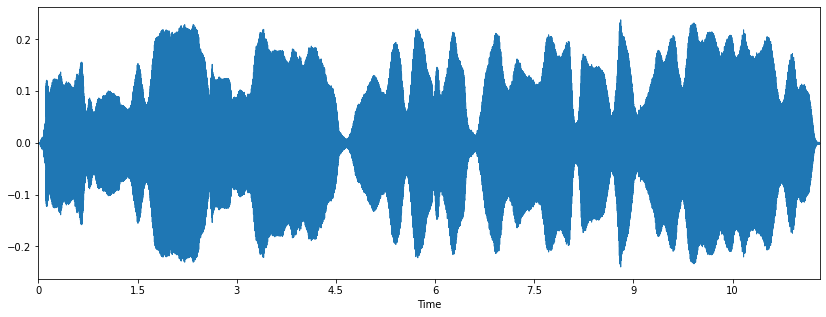

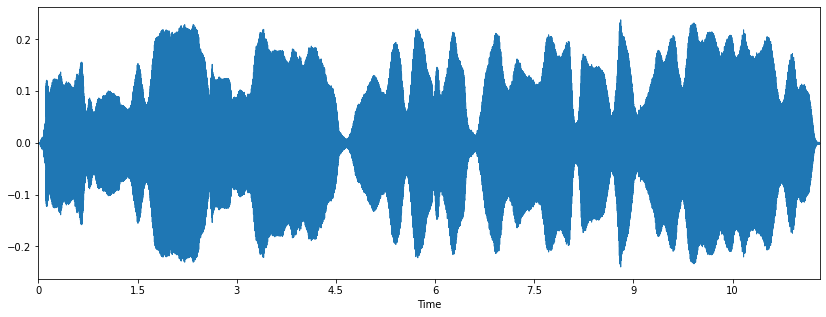

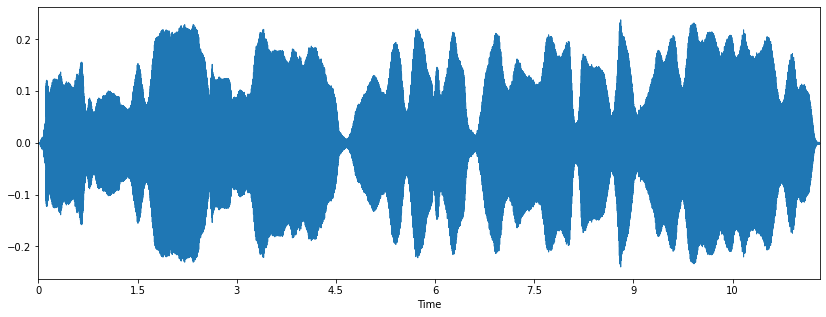

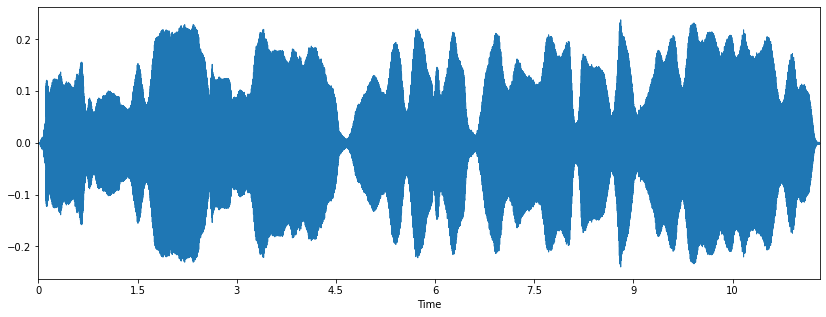

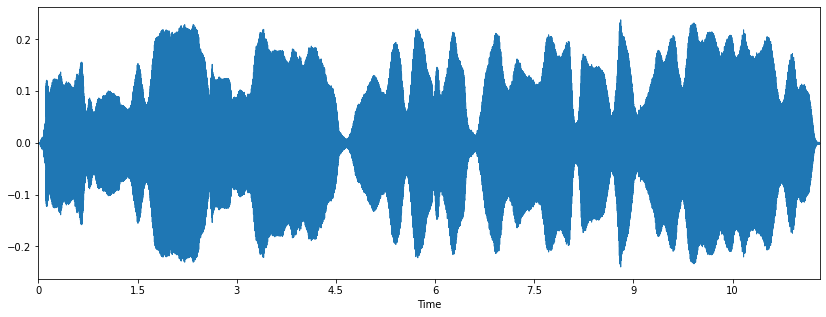

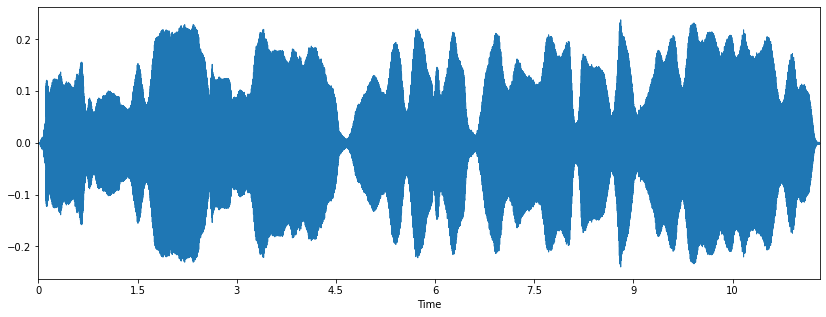

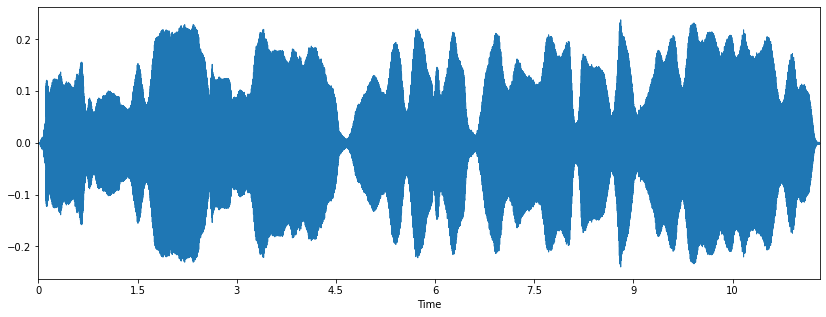

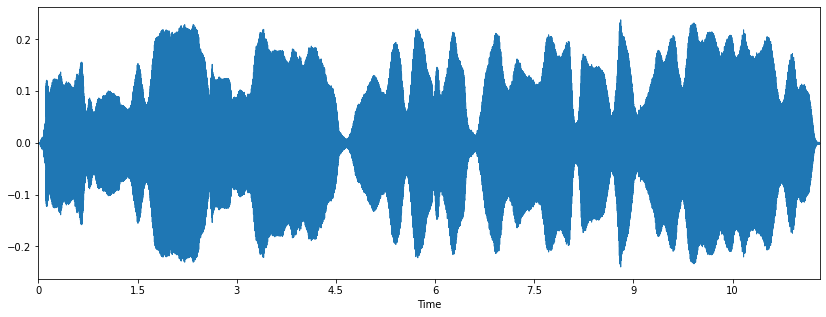

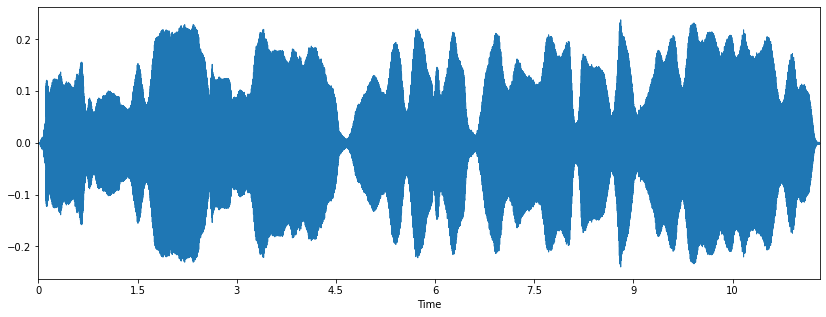

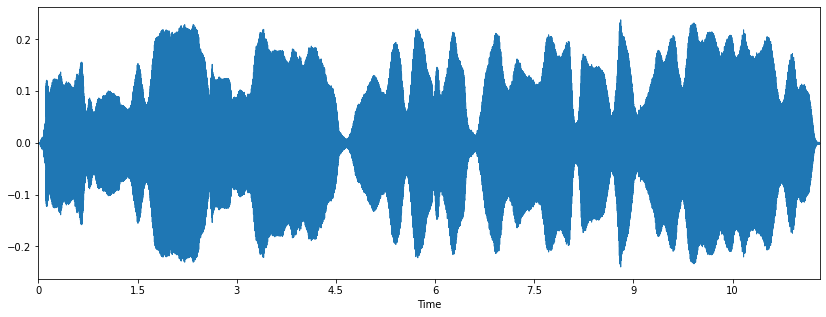

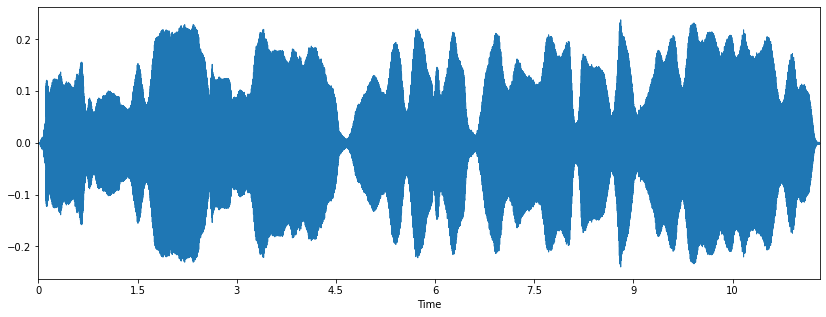

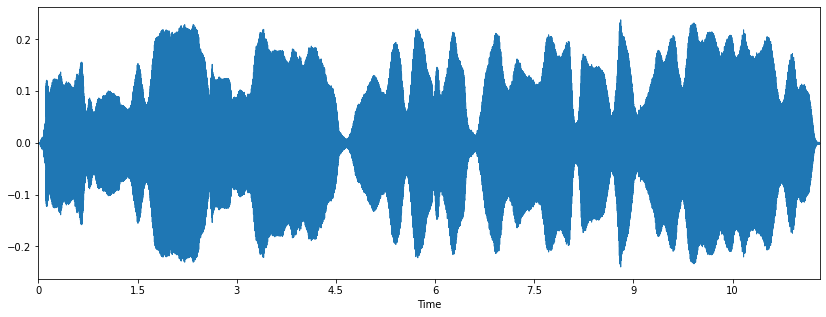

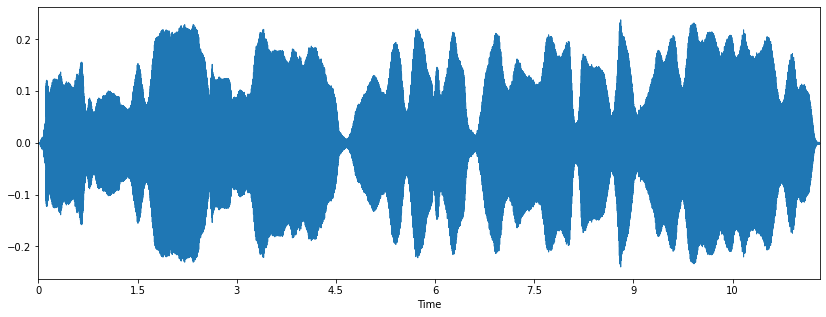

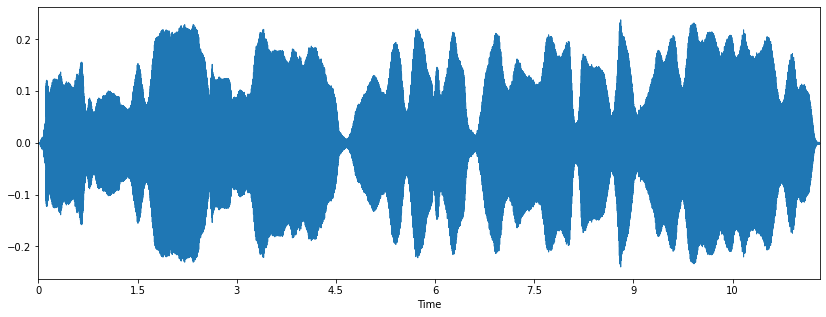

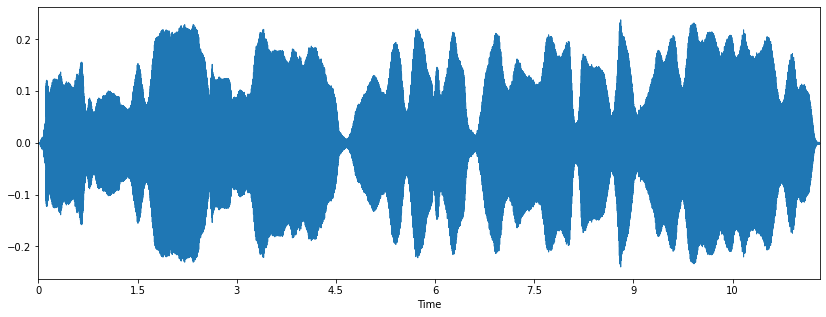

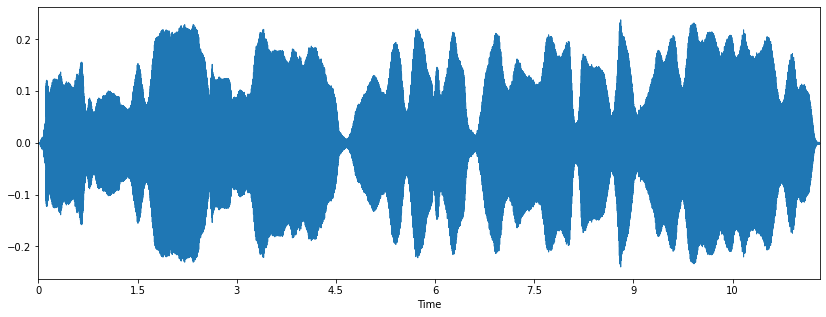

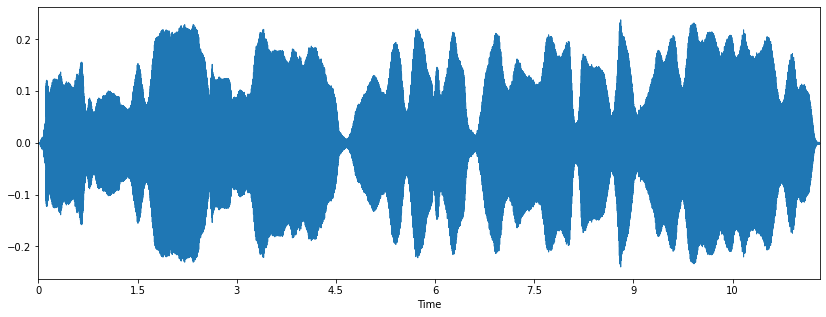

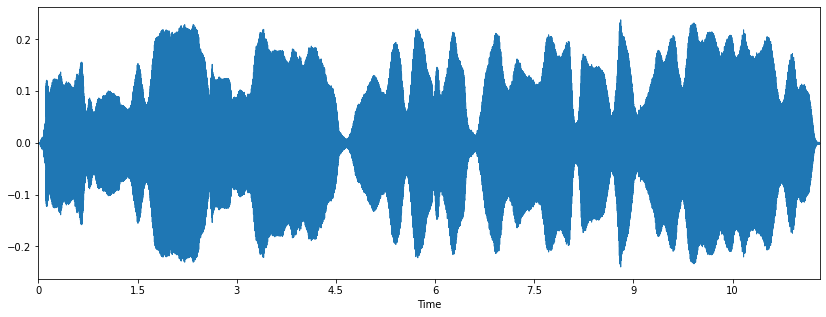

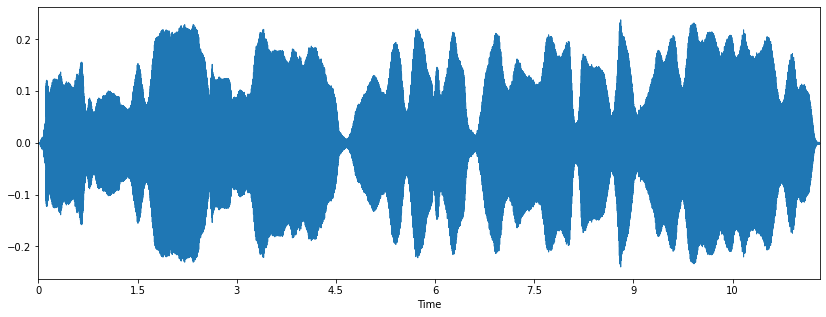

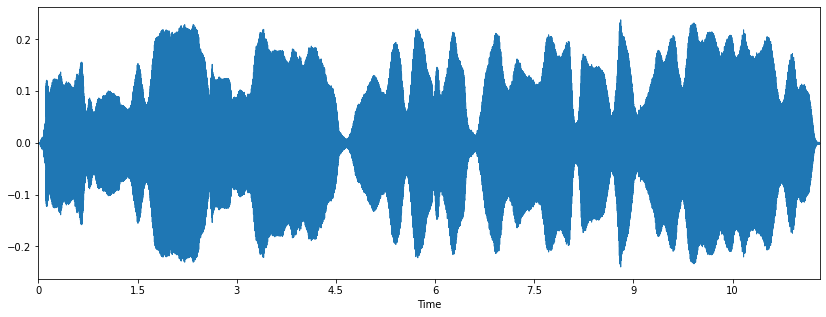

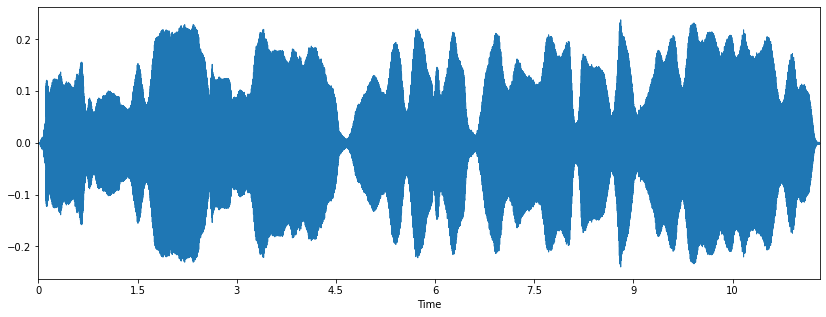

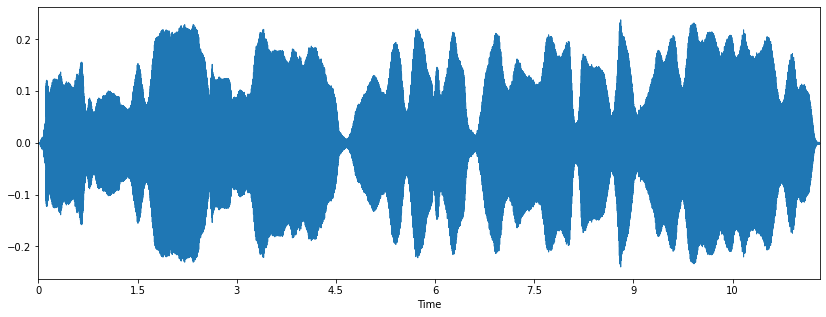

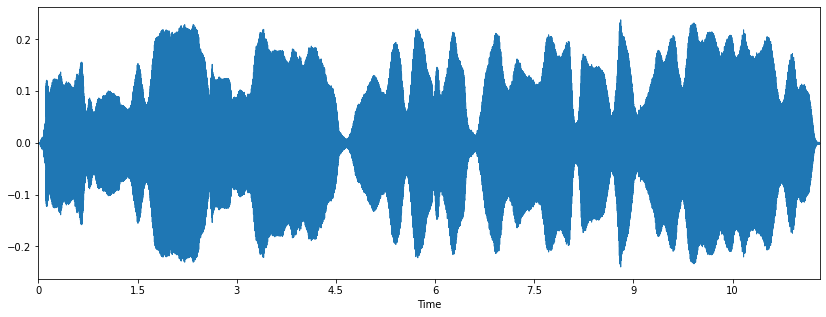

Error in callback <function flush_figures at 0x7f3970fb1440> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
for i in range(0,len(a),2):
  plt.figure(figsize=(14, 5))
  librosa.display.waveplot(a[2], sr=a[2+1])

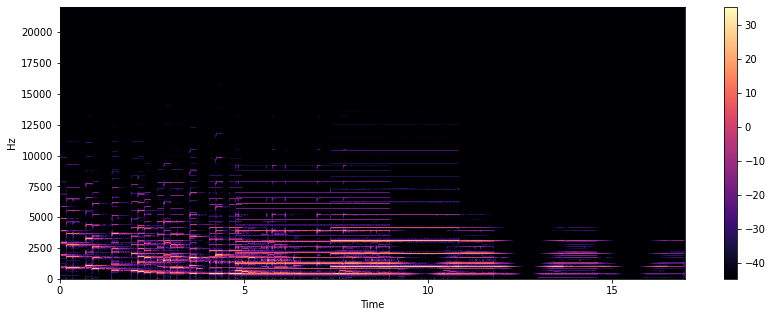

In [ ]:
X = librosa.stft(a[2])
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()


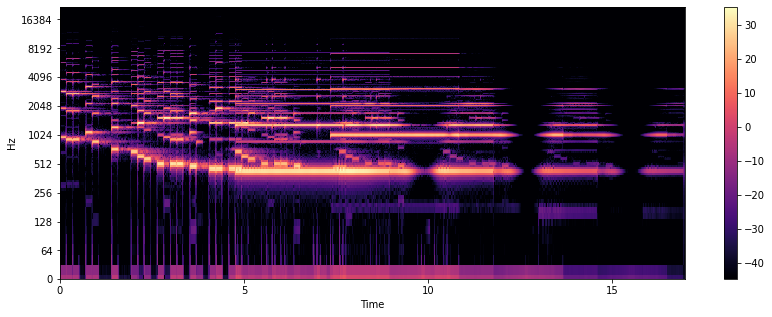

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


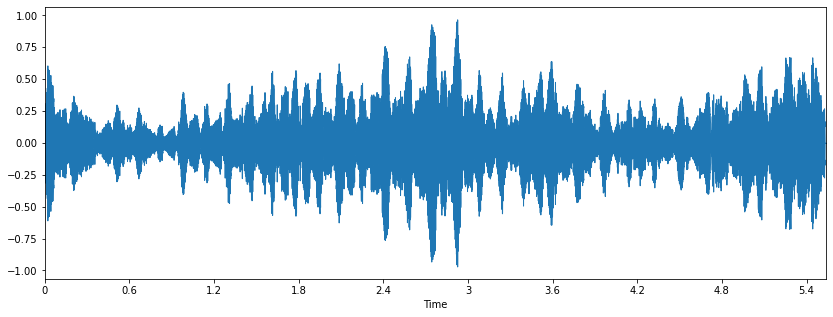

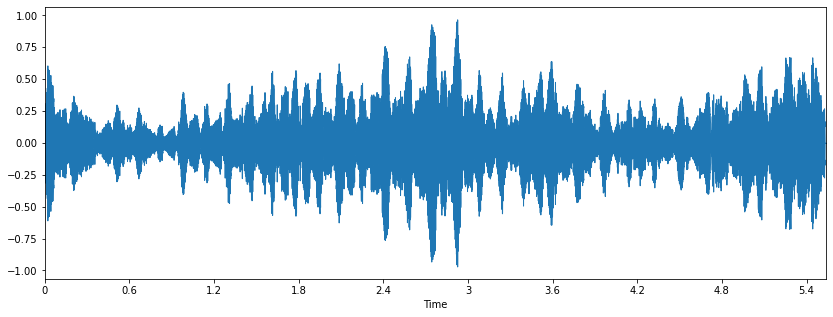

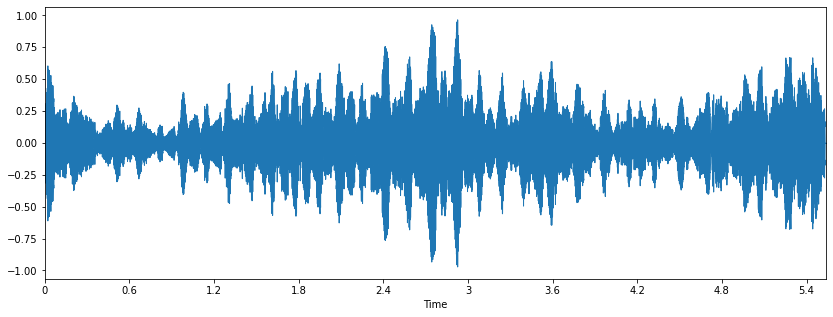

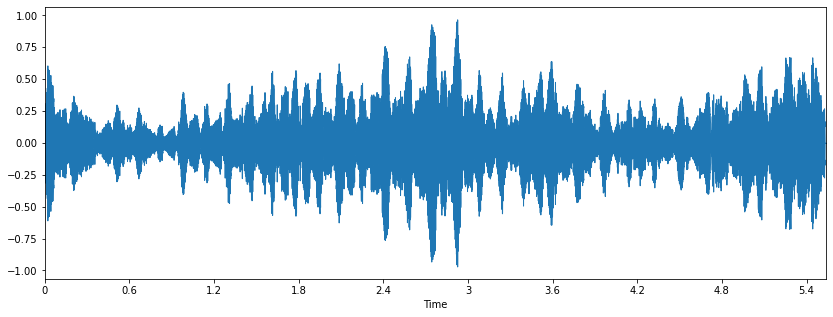

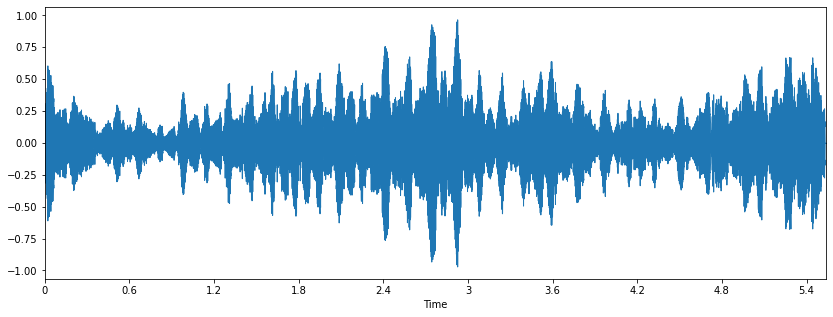

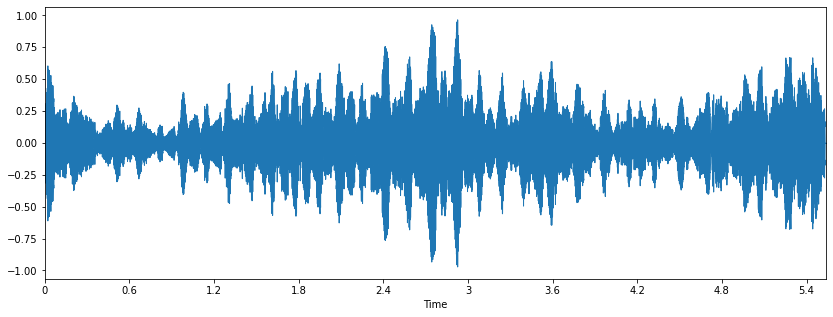

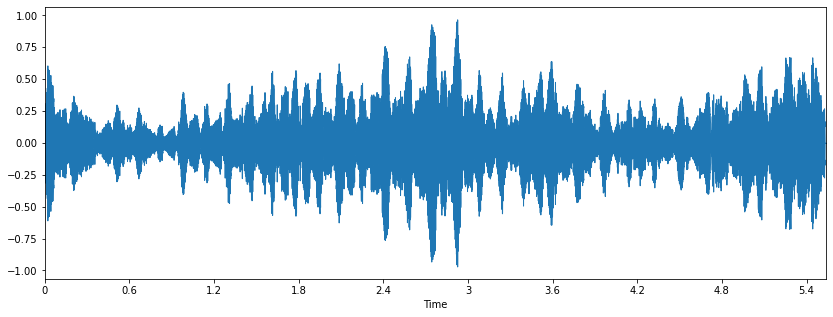

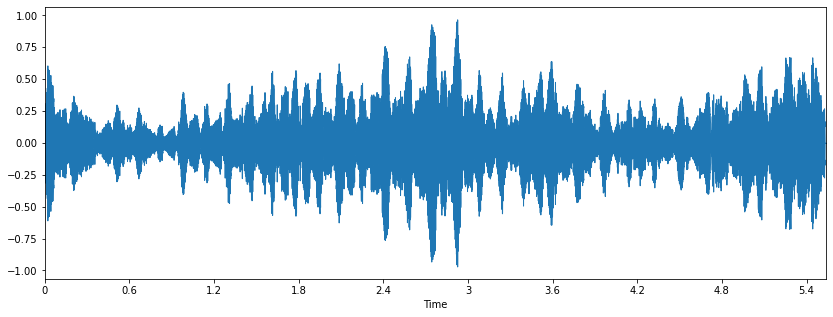

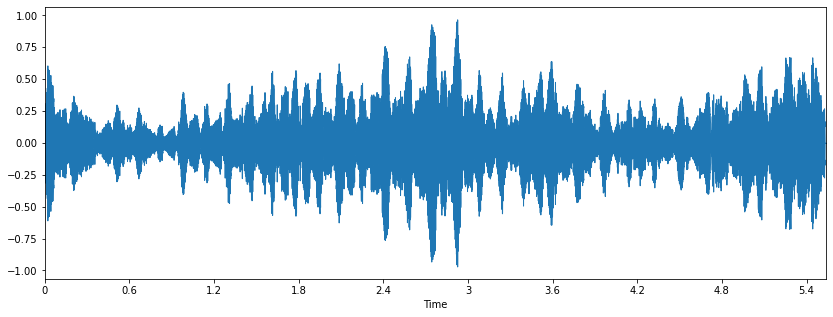

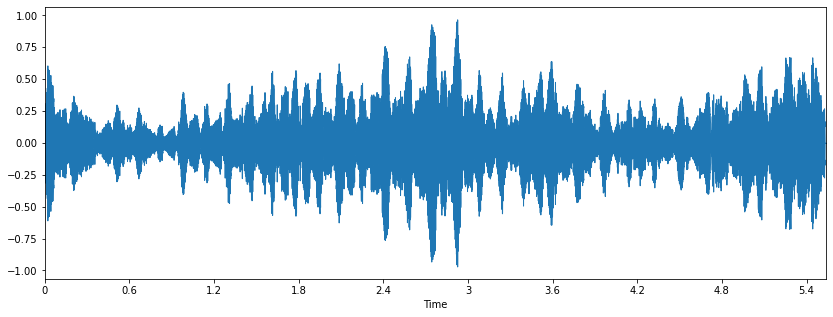

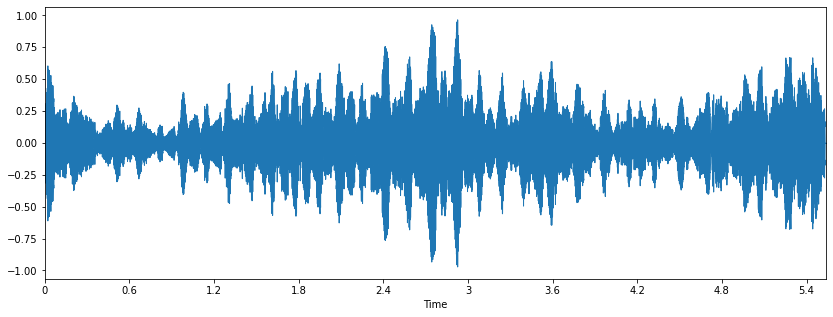

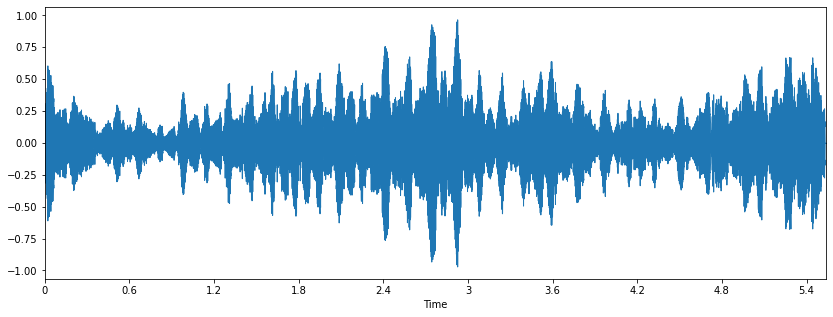

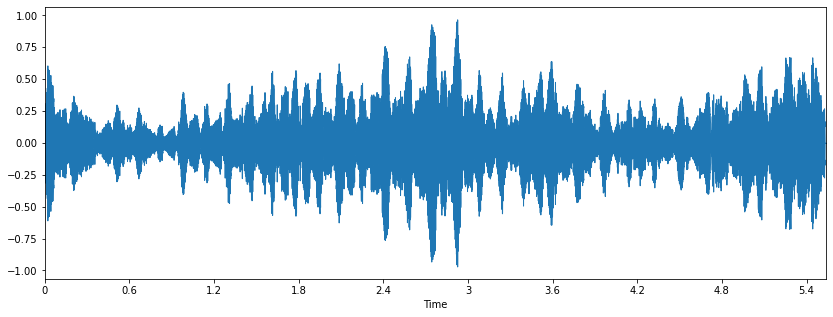

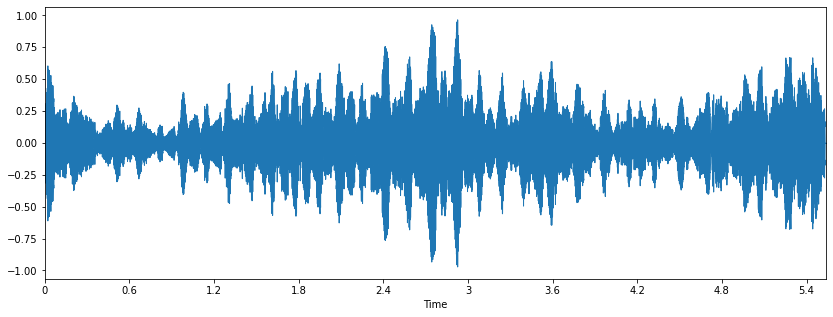

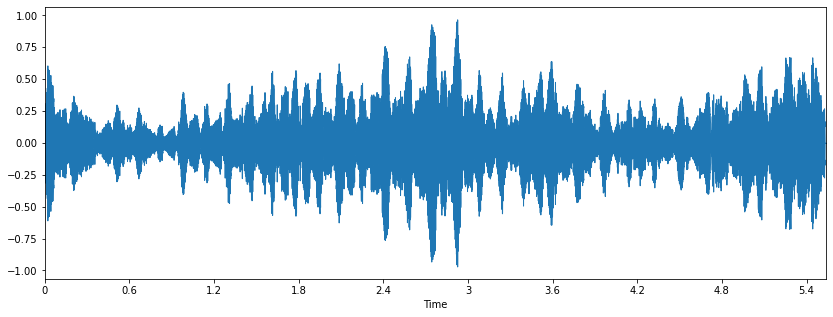

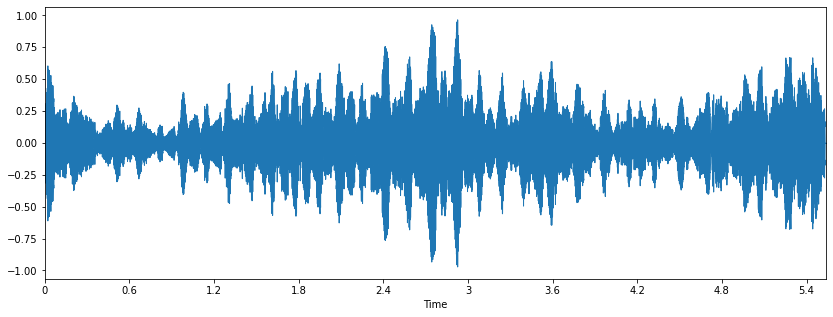

Error in callback <function flush_figures at 0x7f3970fb1440> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
for i in range(0,len(b),2):
  plt.figure(figsize=(14, 5))
  librosa.display.waveplot(b[2], sr=b[2+1])

In [ ]:
X = librosa.stft(b[2])
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
for i in range(0,len(c),2):
  plt.figure(figsize=(14, 5))
  librosa.display.waveplot(c[2], sr=c[2+1])

In [ ]:
X = librosa.stft(c[2])
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
pip install SpeechRecognition

     |████████████████████████████████| 32.8MB 122kB/s 


In [ ]:
pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp37-none-any.whl size=5887 sha256=f92f00c27f9858f5473feab07fcd58c93fa1e660ec94eaefd5932b6961dce108
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [ ]:
import os
import librosa
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from python_speech_features import mfcc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential









In [ ]:
#MFCC
#convert each of the waves into MFCC features
mfcc_features_a = list()

for i in range(0,len(a),2):
  mfccs = librosa.feature.mfcc(a[i], sr=a[i+1])
  #print(mfccs.shape)
  plt.figure(figsize=(14, 5))
  librosa.display.specshow(mfccs, sr=sr, x_axis='time')

mfcc_features_a = np.array(mfcc_features)

label_encoder_a = LabelEncoder()
label_encoded_a = label_encoder.fit_transform(mfcc_features_a)
print(label_encoded_a)

label_encoded_a = label_encoded_a[:, np.newaxis]
label_encoded_a

one_hot_encoder_a = OneHotEncoder(sparse=False)
one_hot_encoded_a = one_hot_encoder_a.fit_transform(label_encoded_a)
one_hot_encoded_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


ValueError: ignored

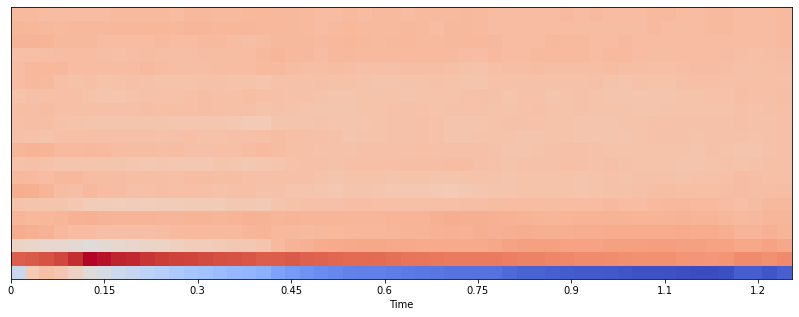

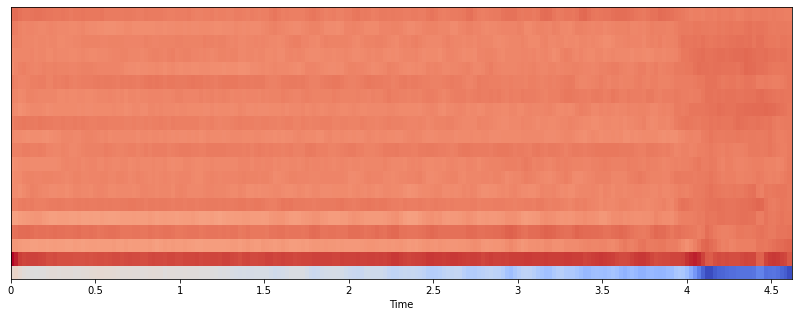

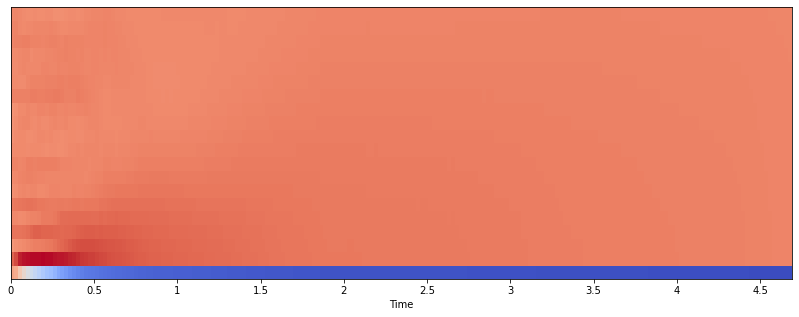

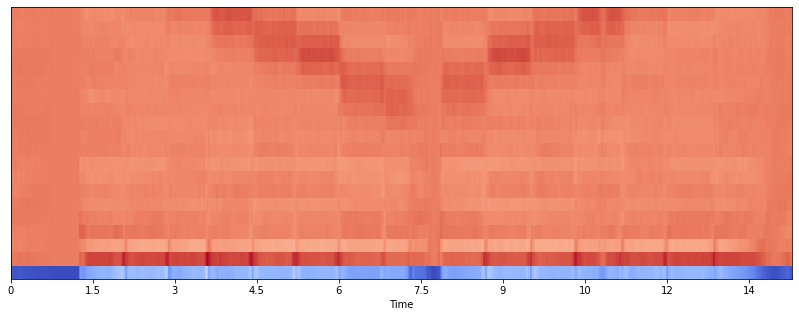

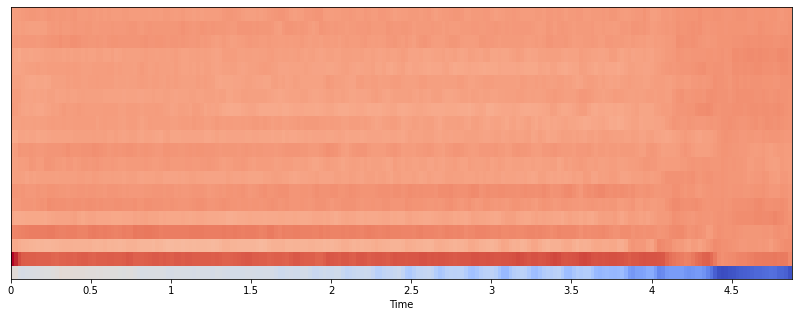

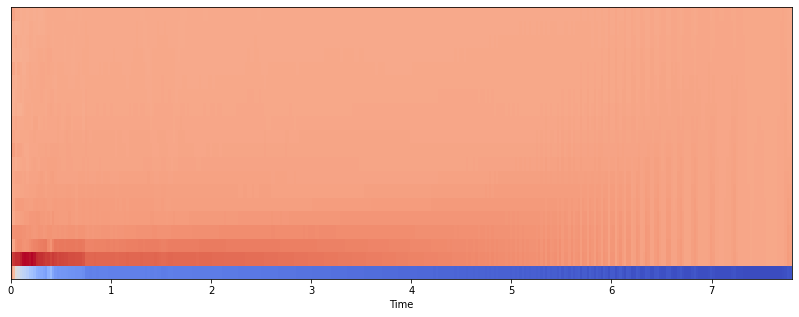

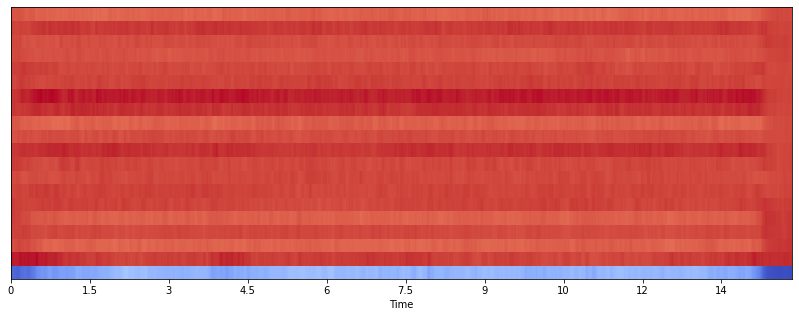

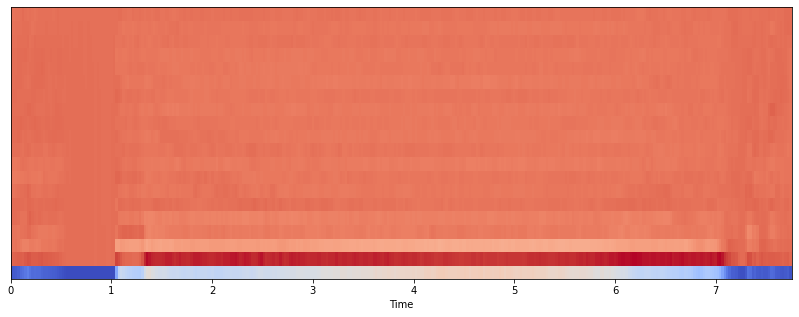

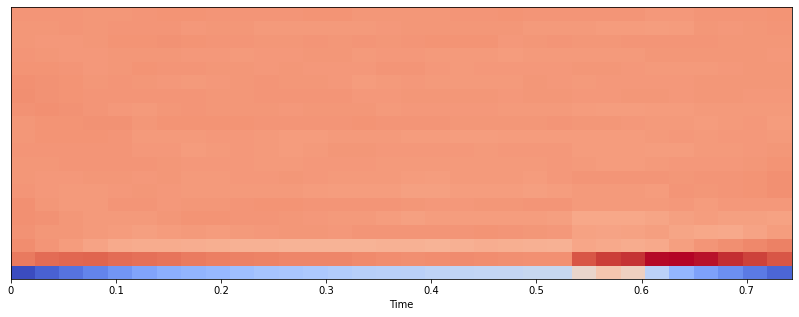

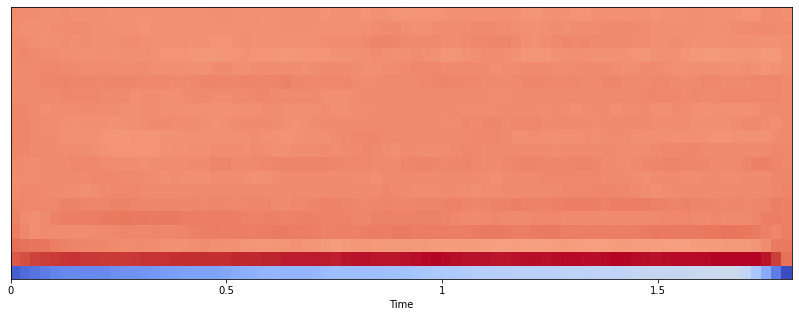

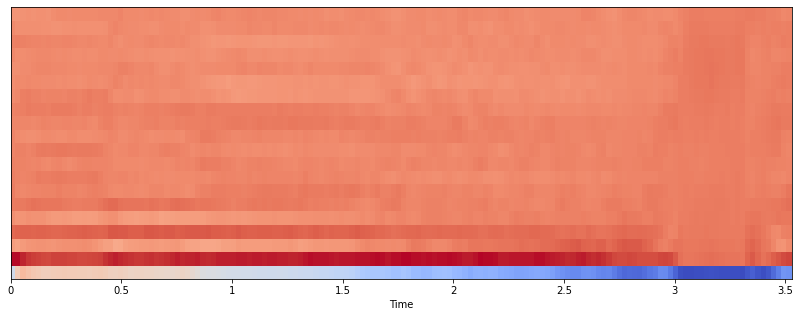

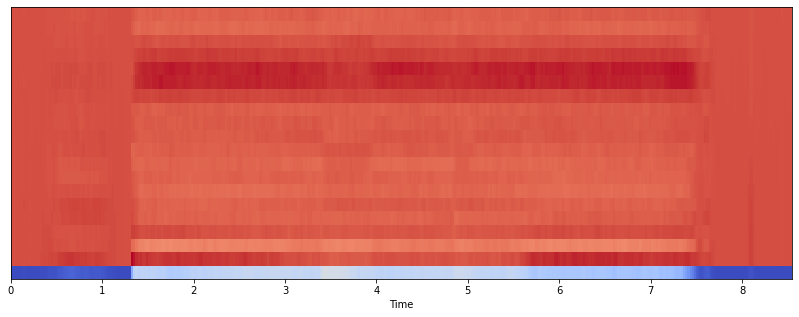

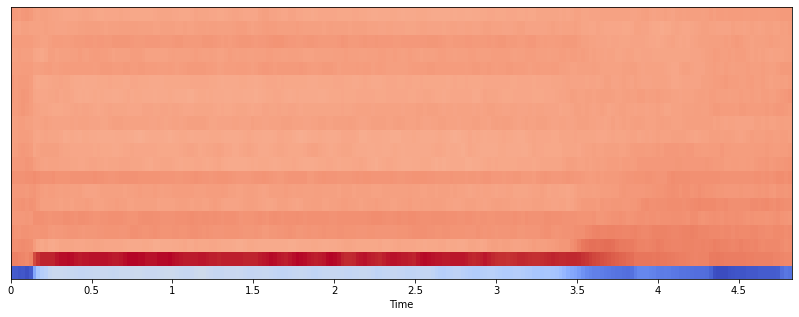

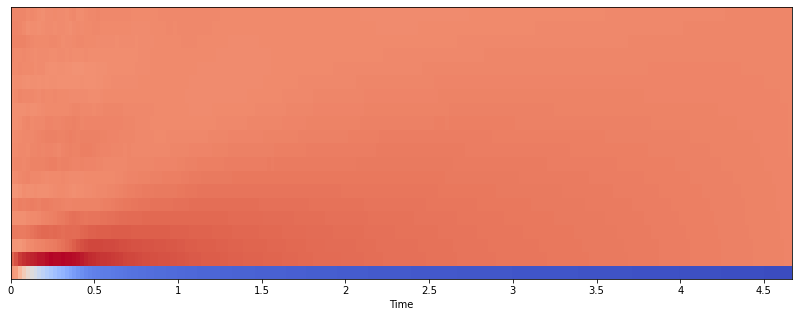

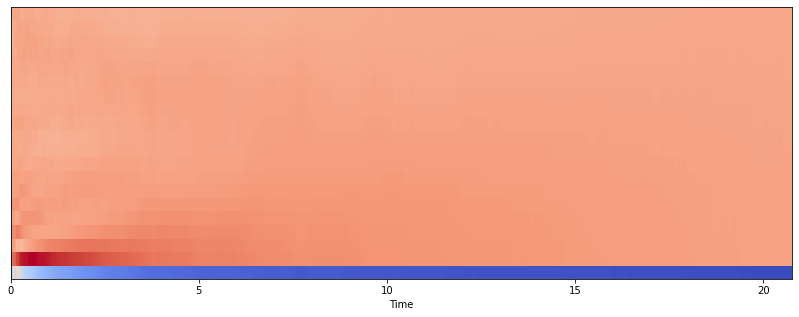

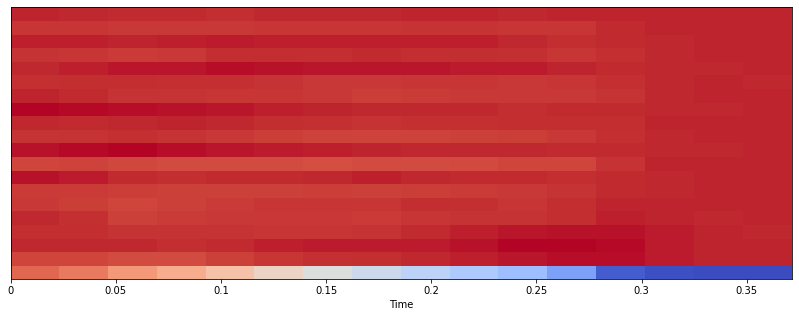

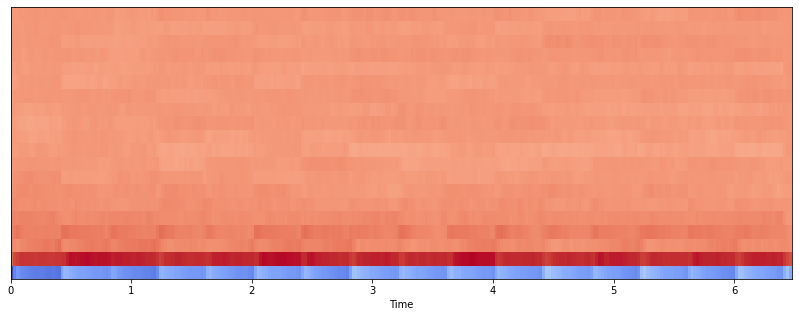

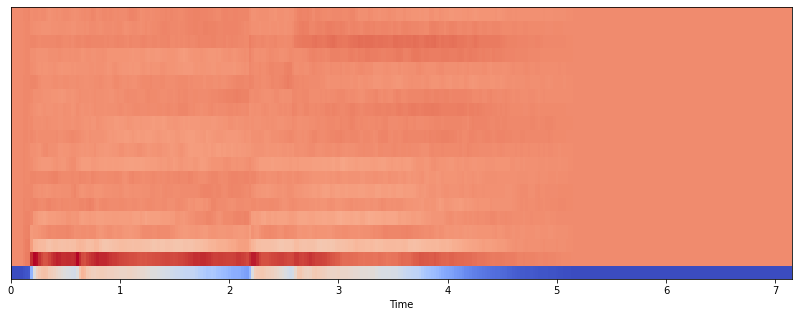

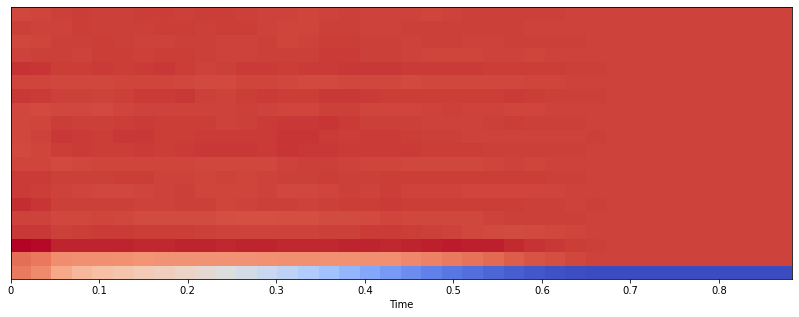

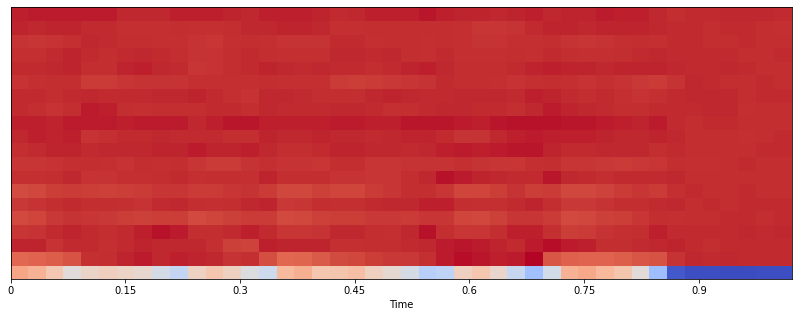

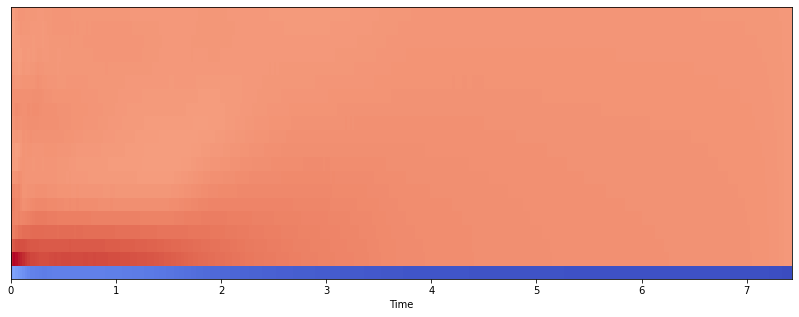

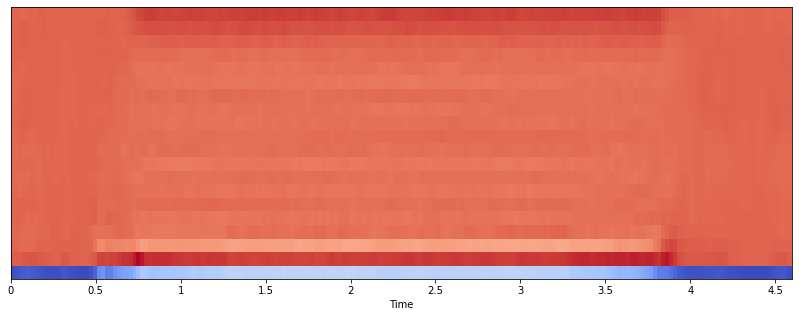

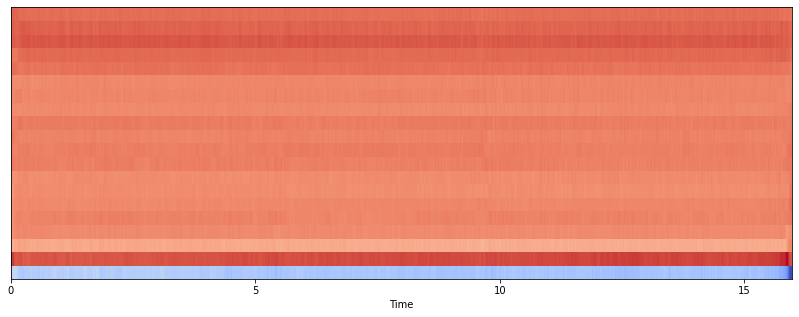

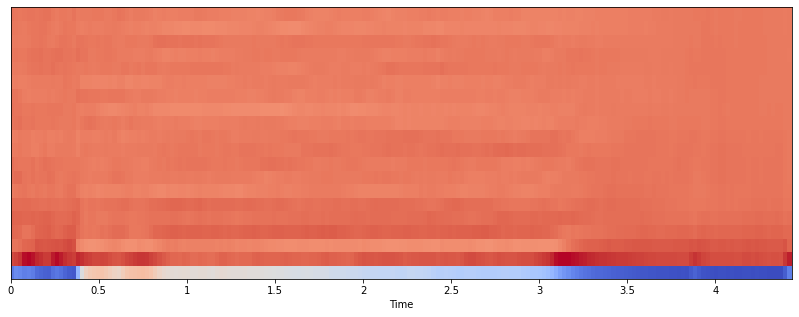

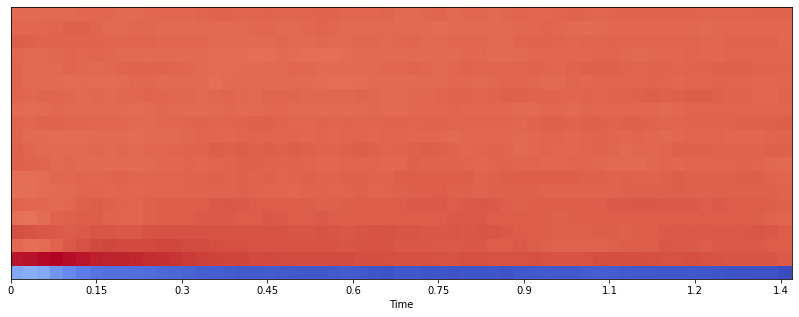

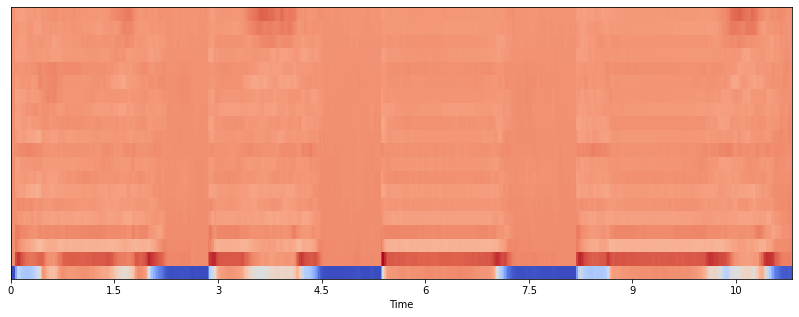

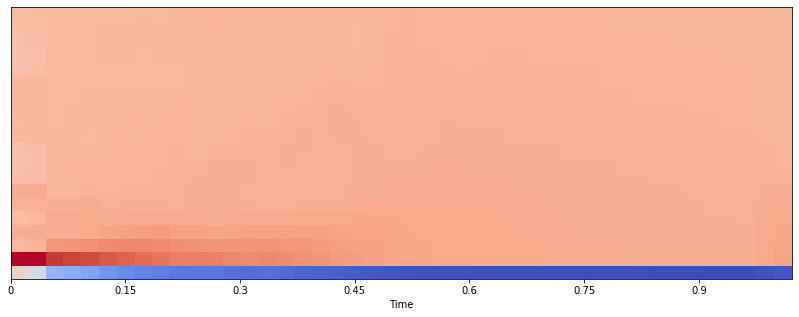

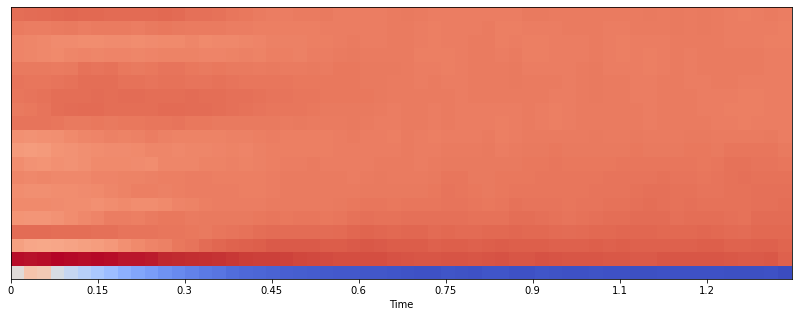

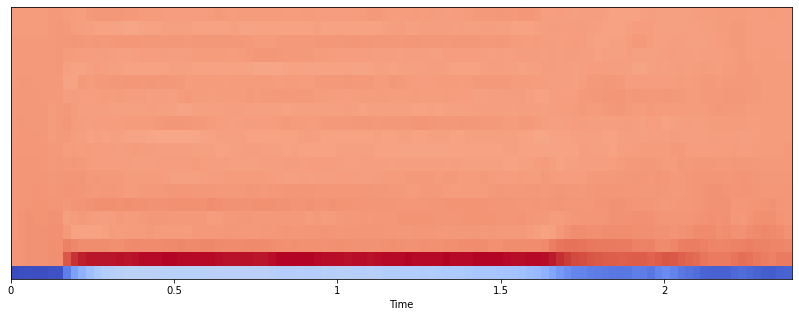

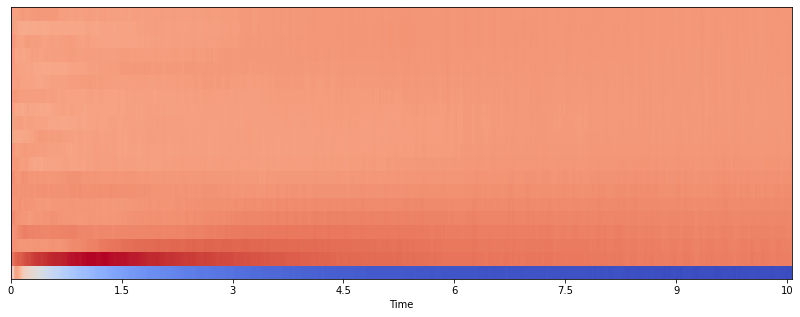

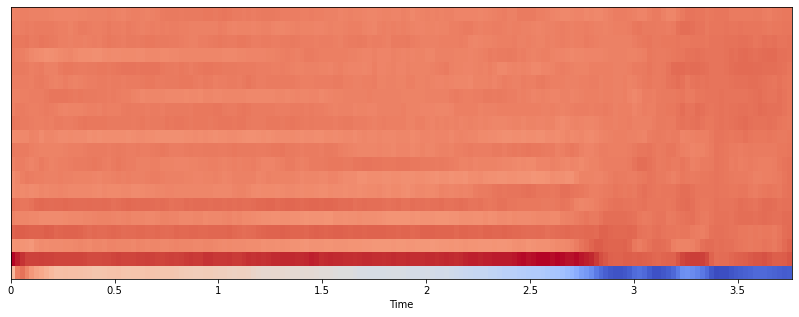

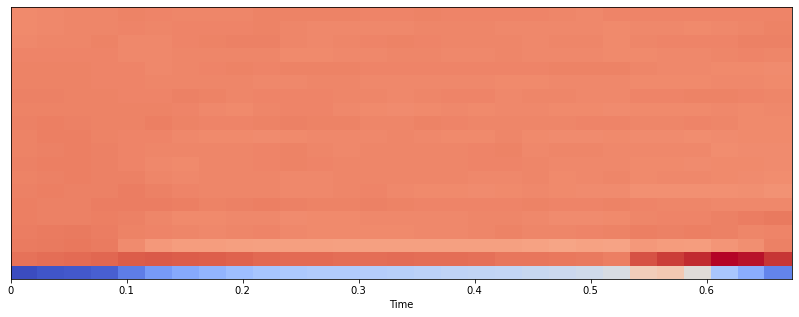

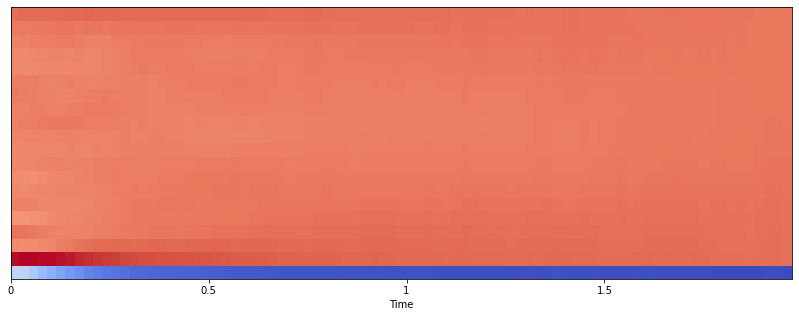

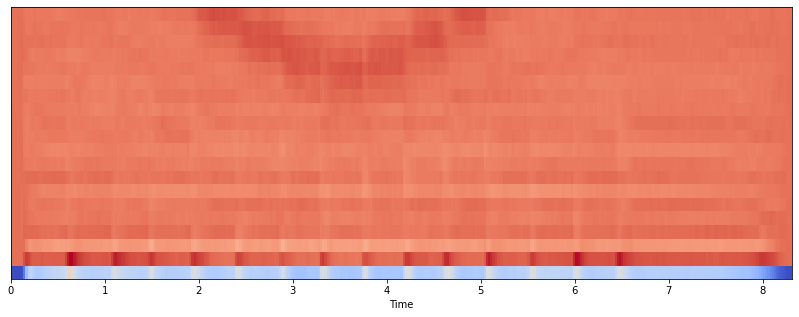

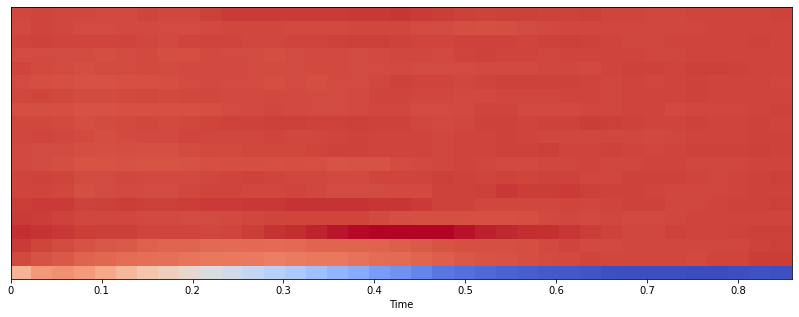

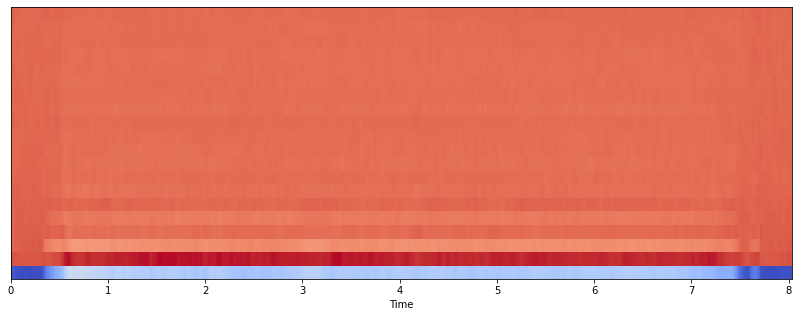

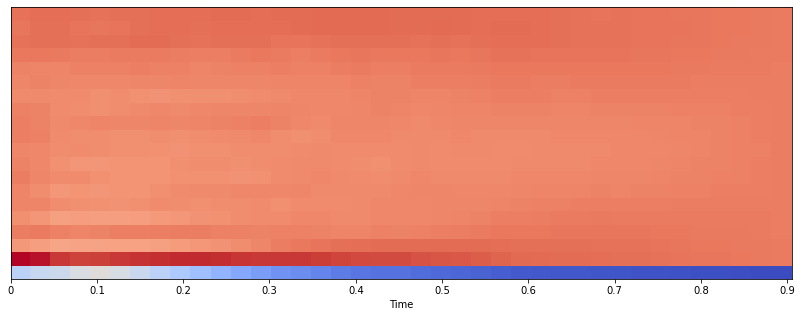

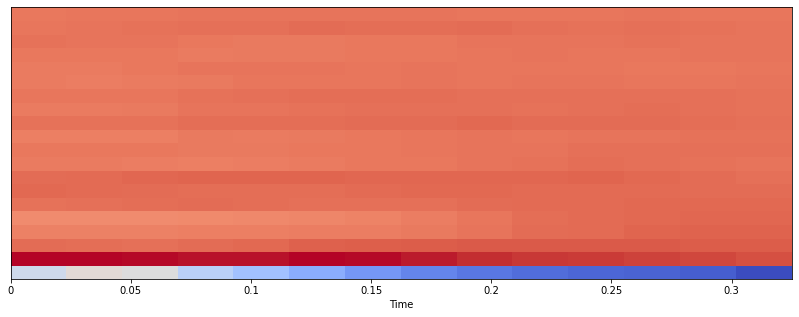

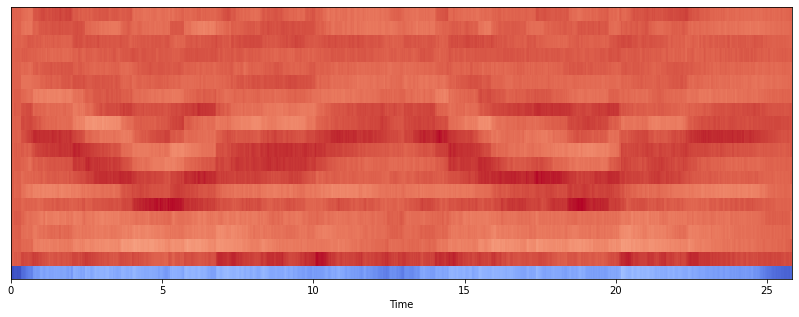

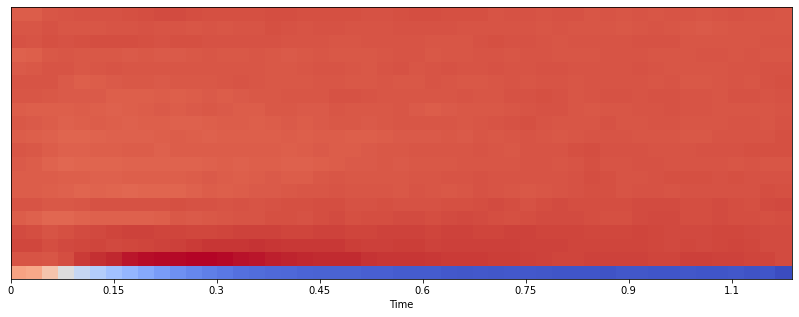

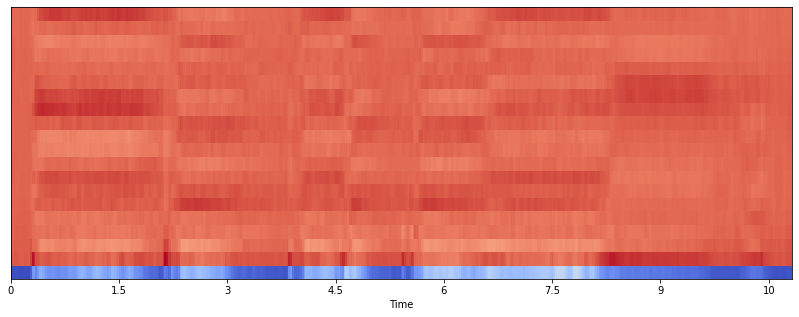

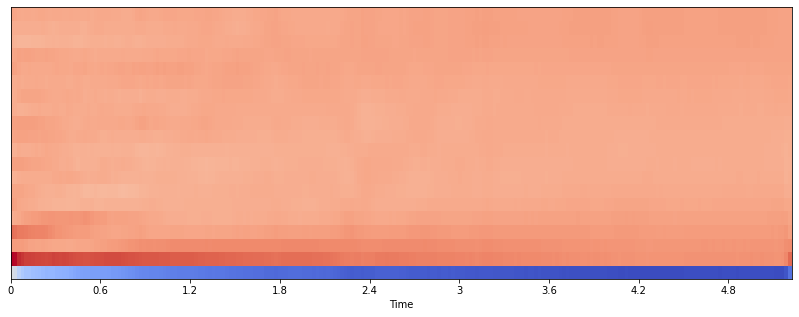

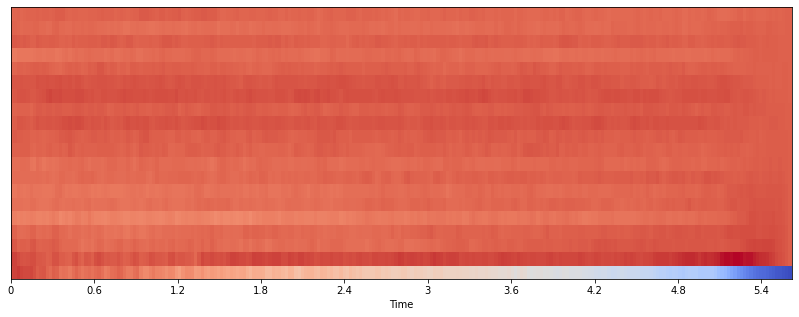

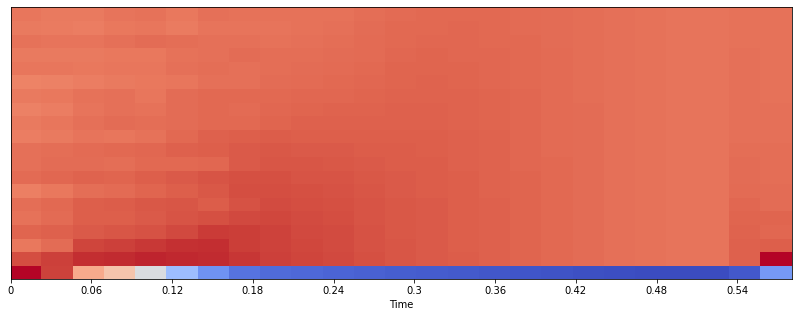

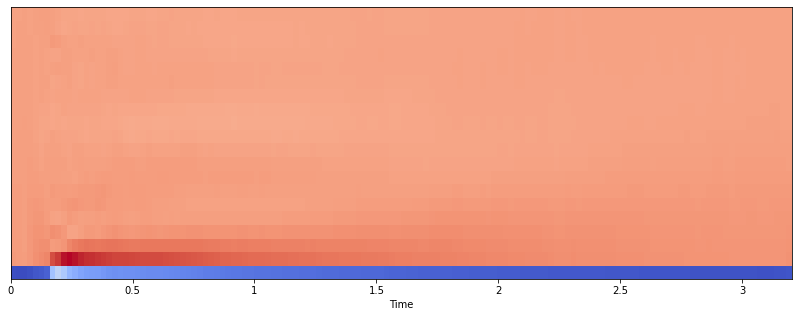

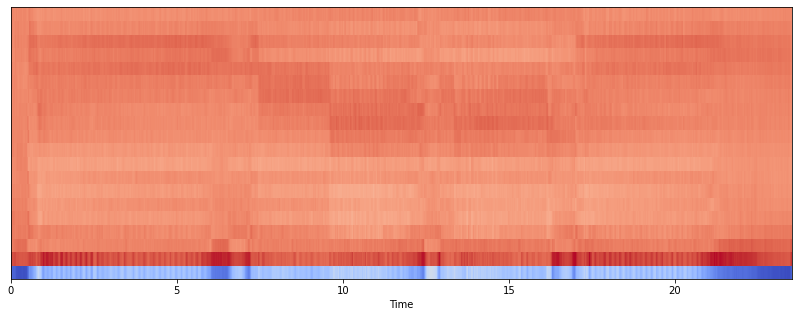

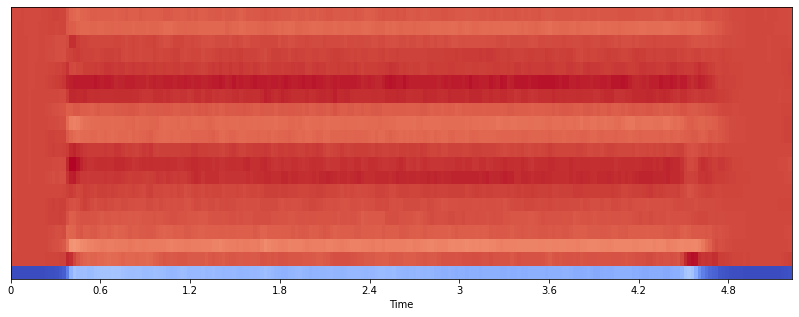

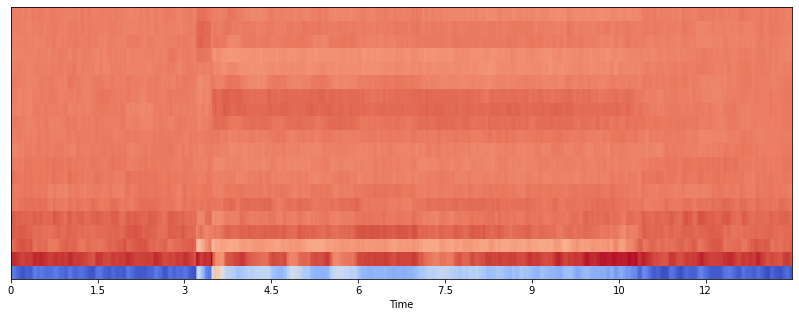

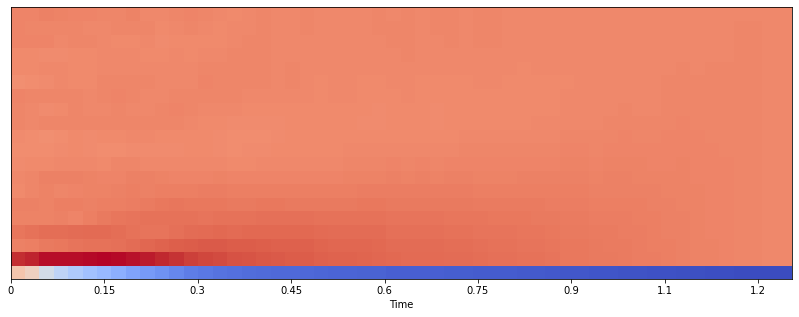

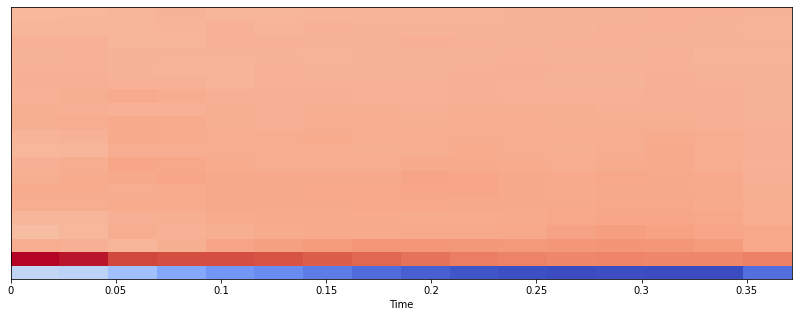

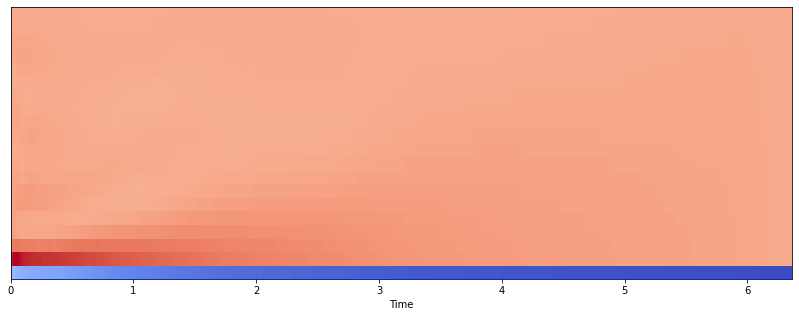

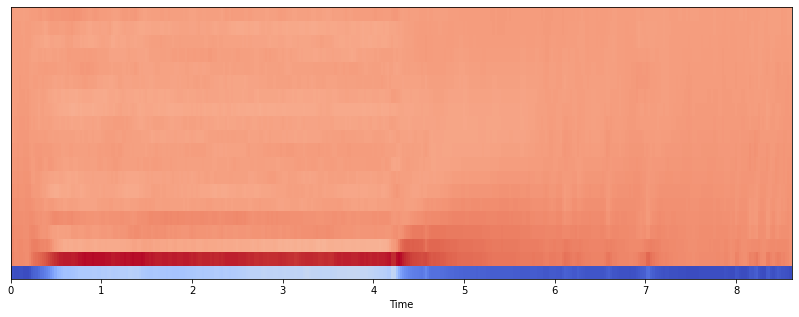

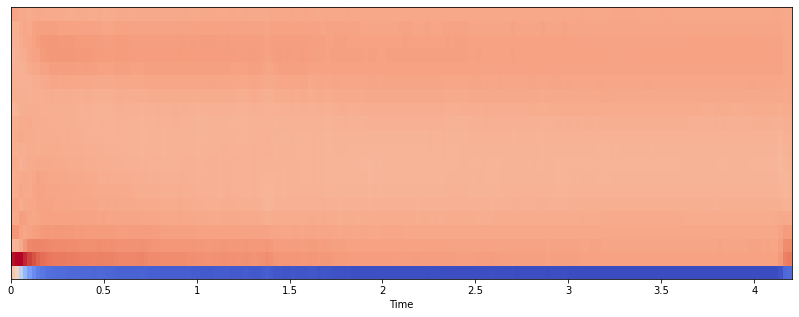

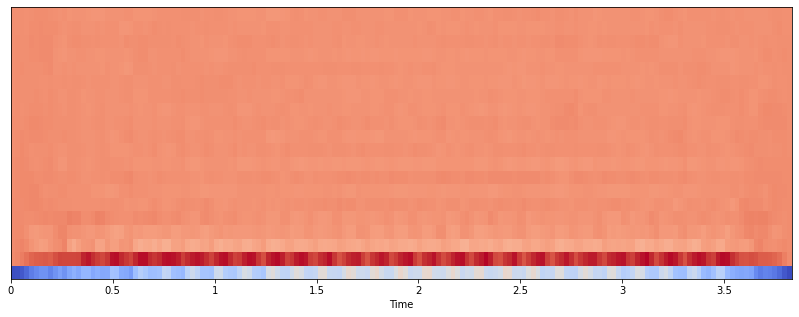

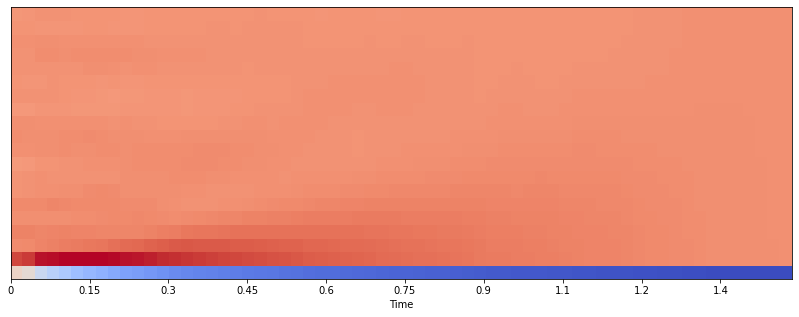

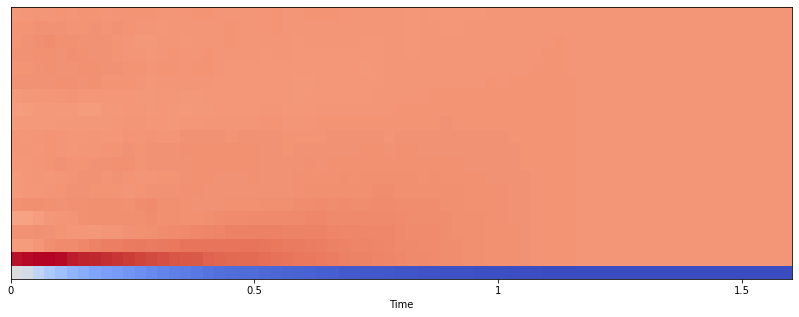

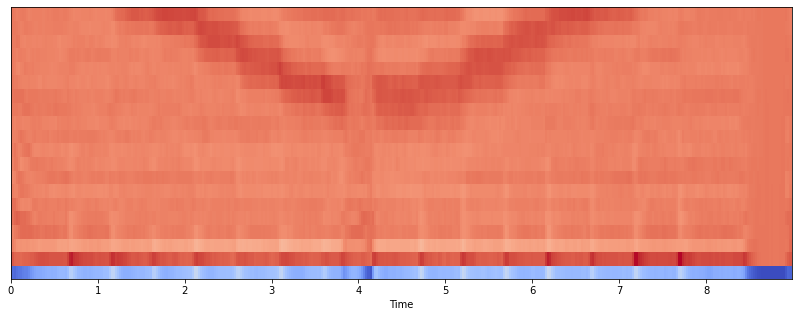

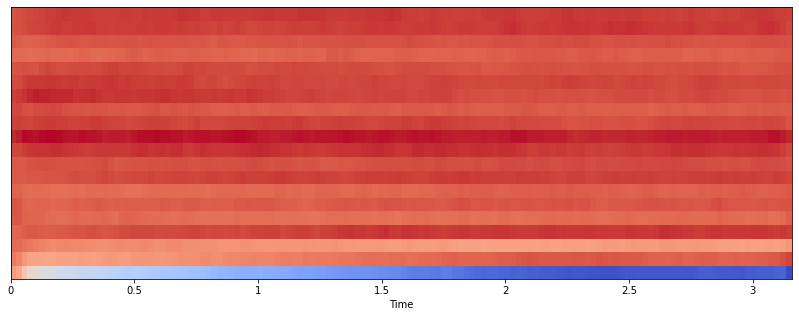

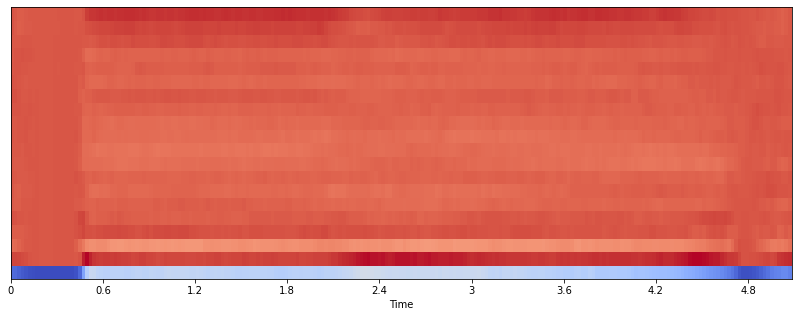

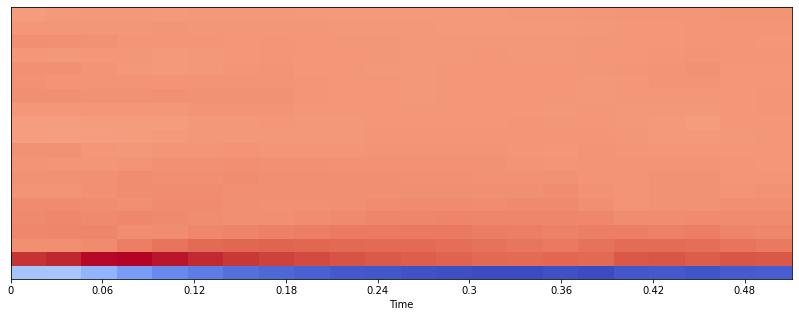

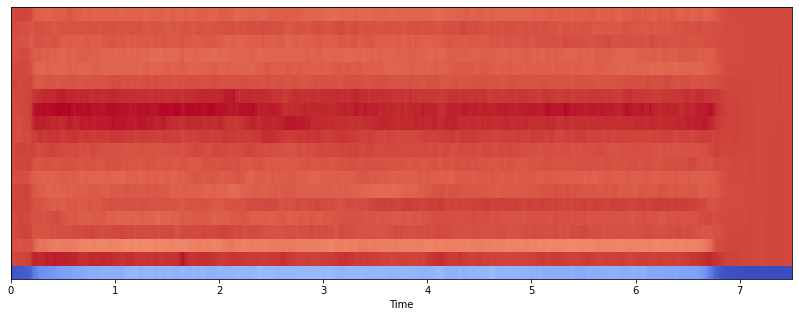

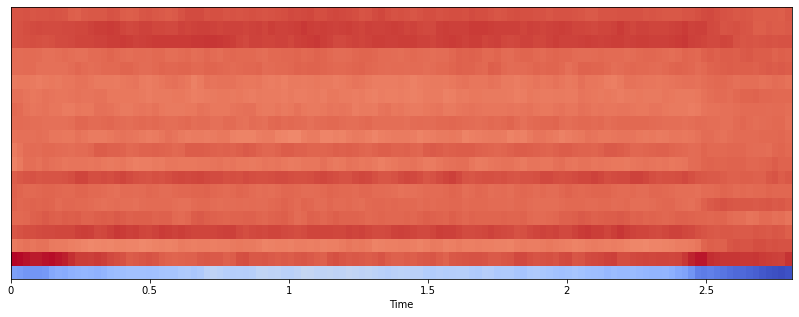

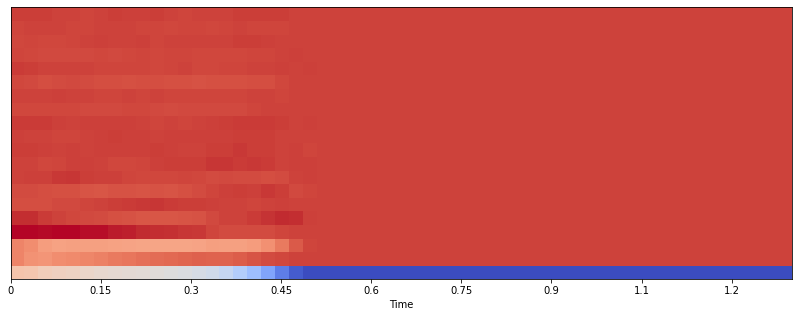

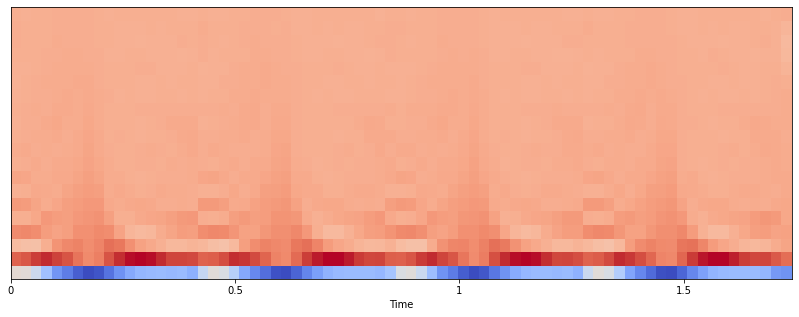

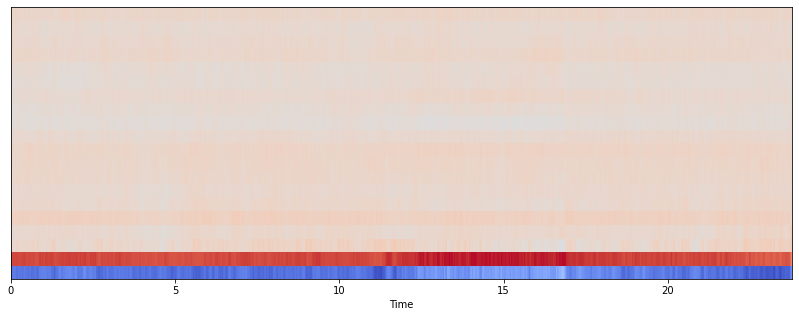

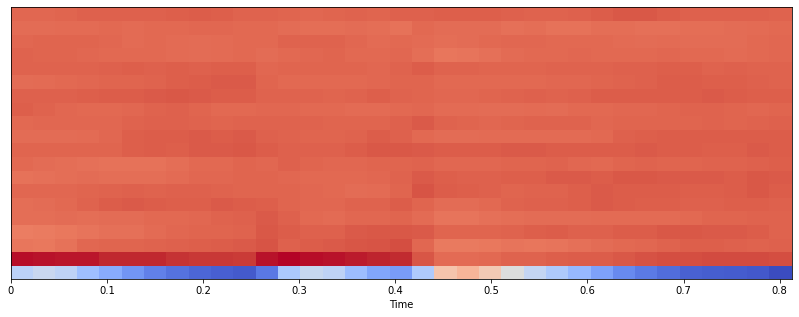

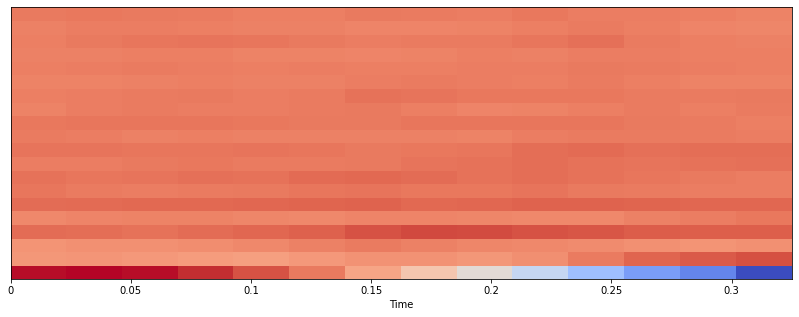

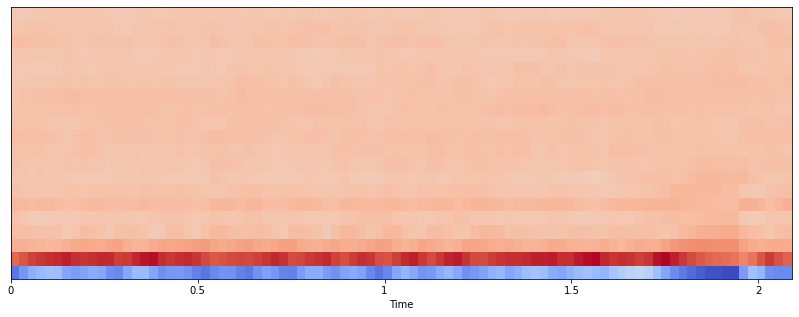

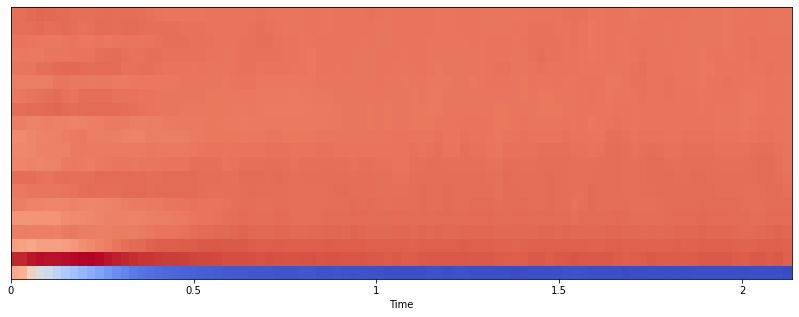

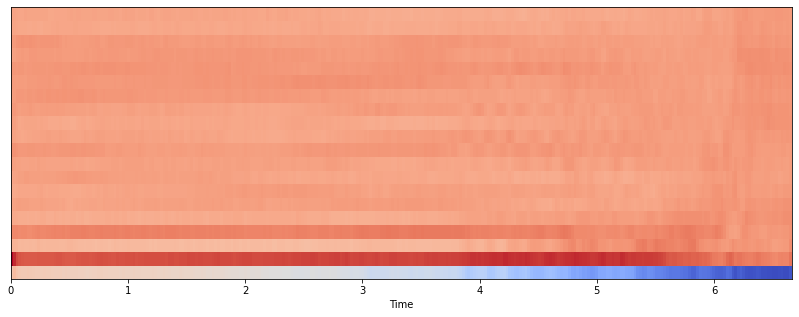

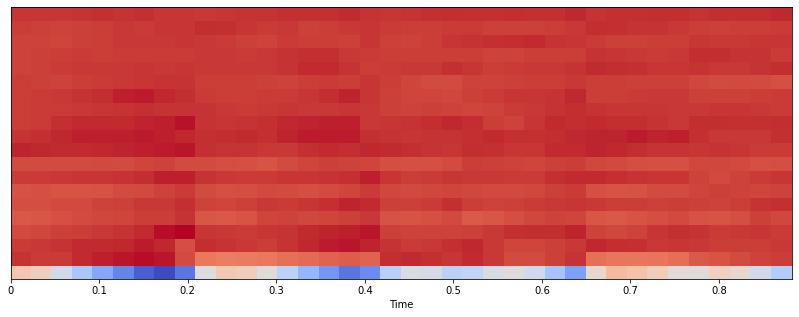

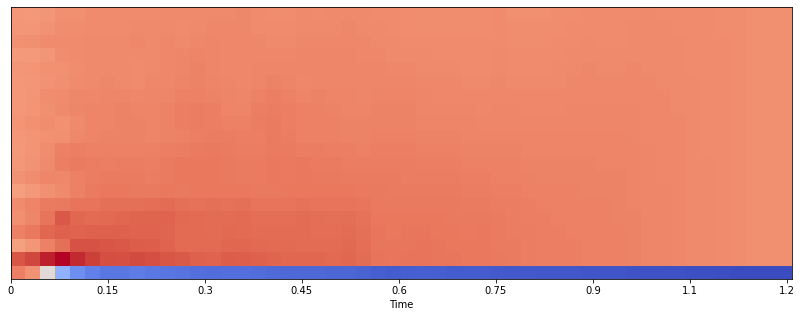

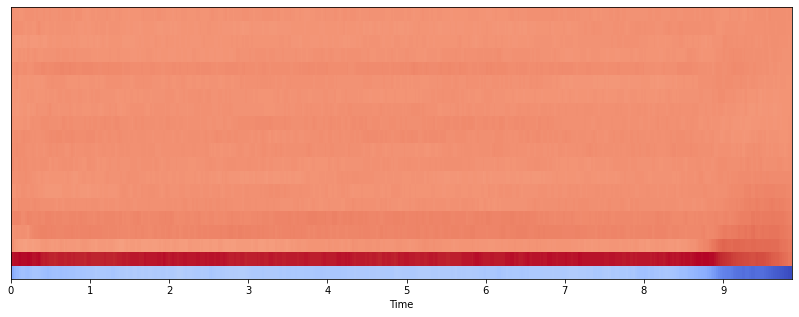

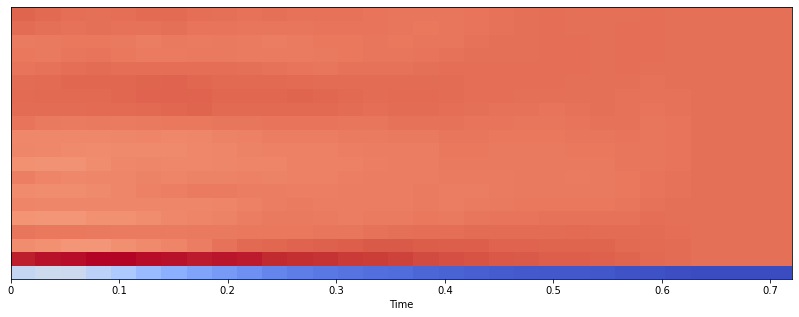

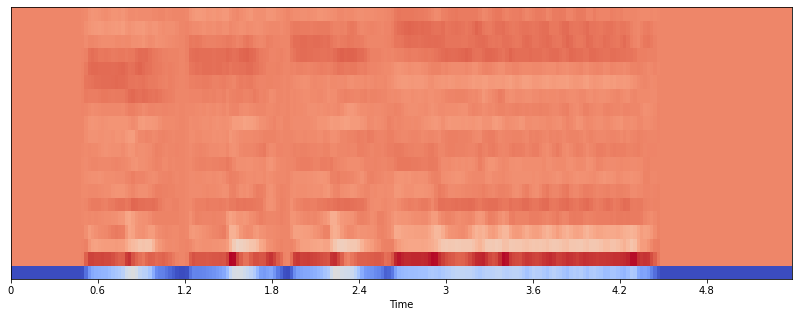

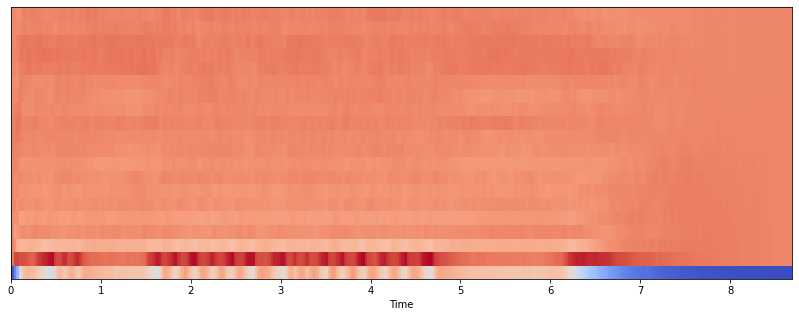

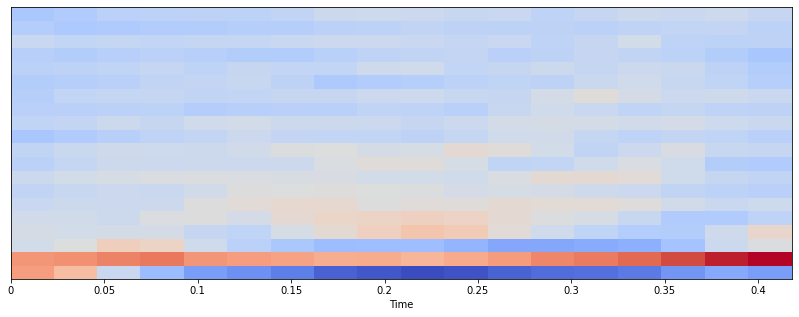

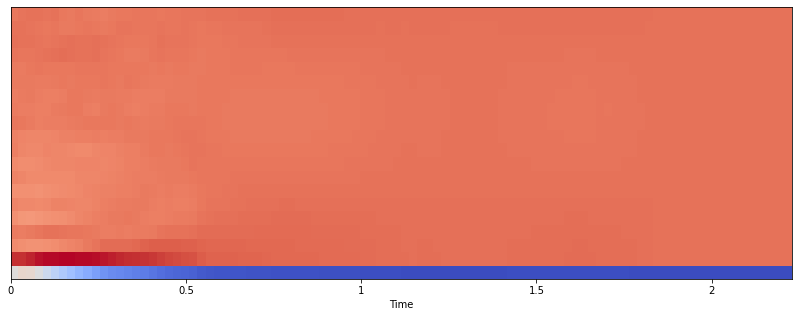

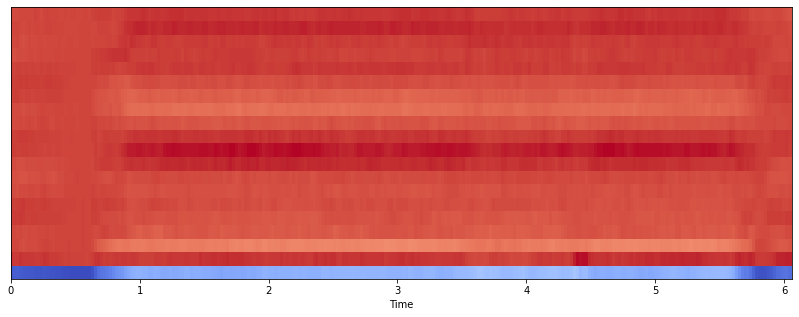

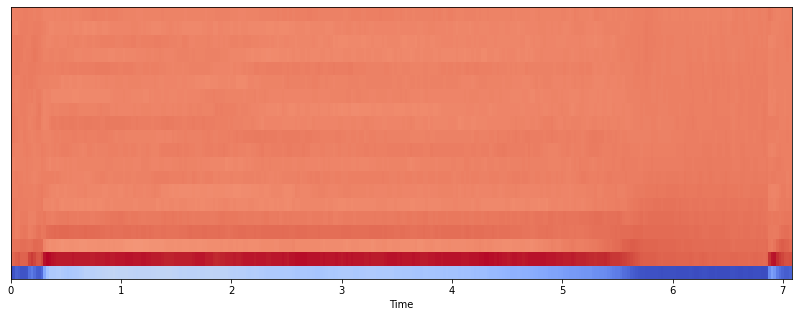

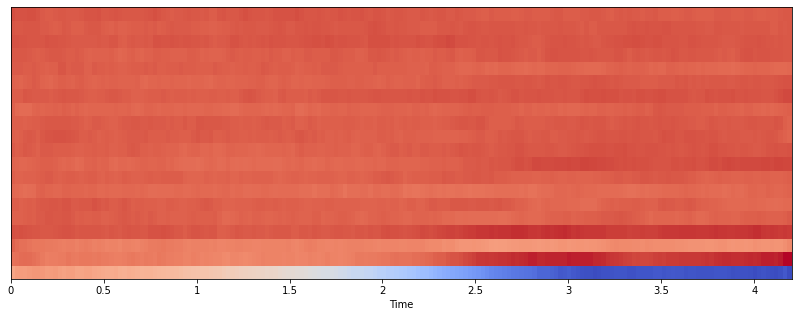

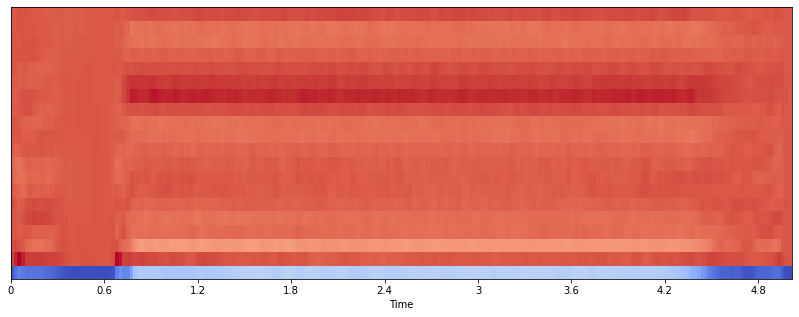

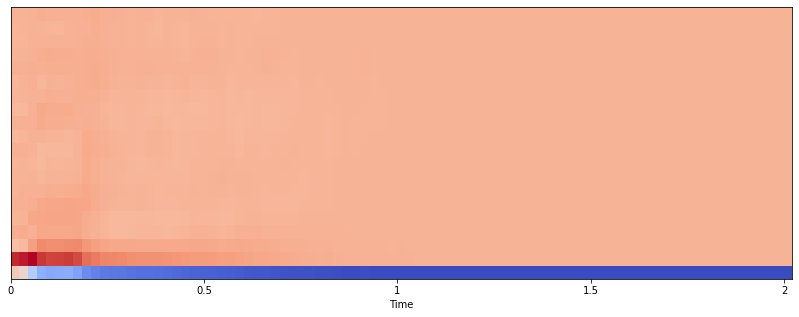

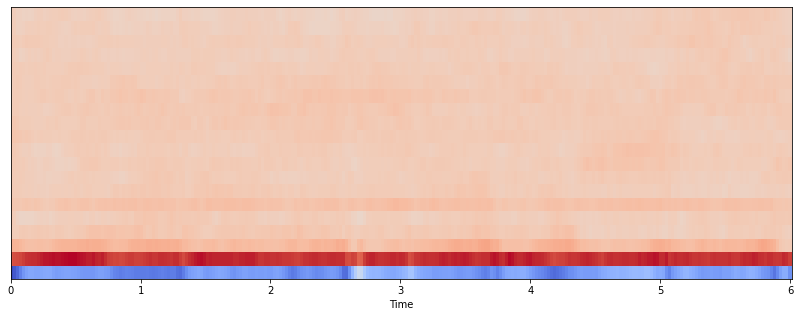

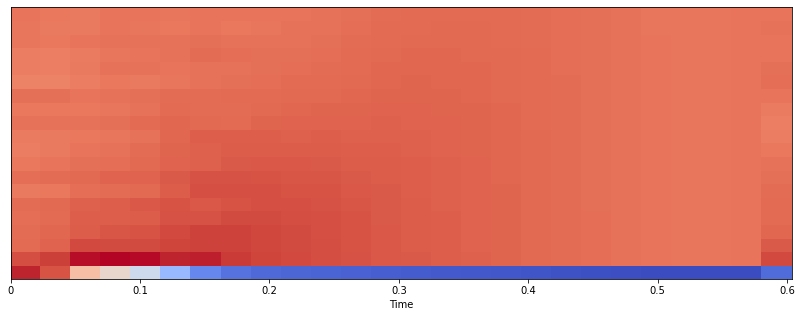

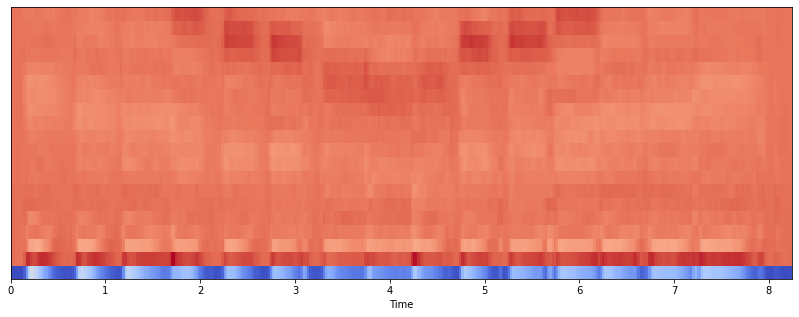

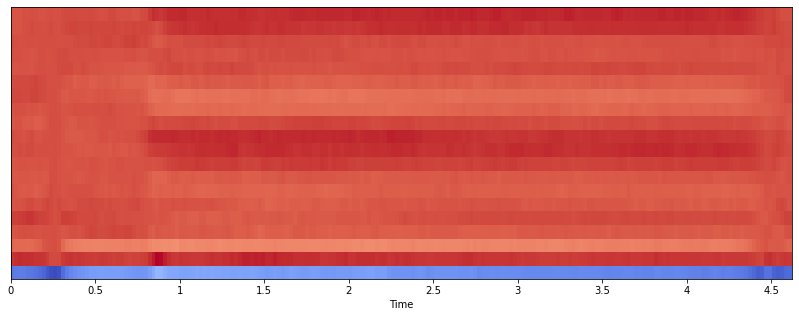

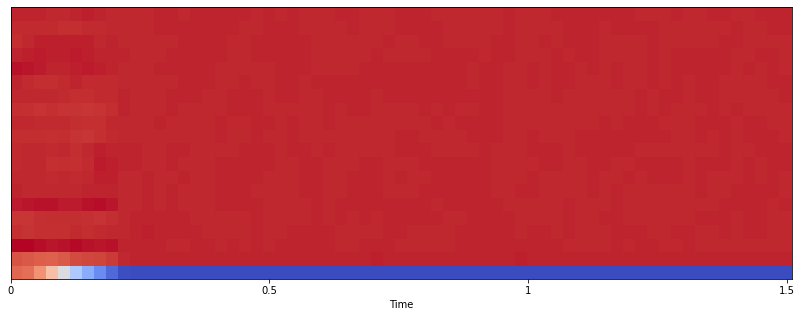

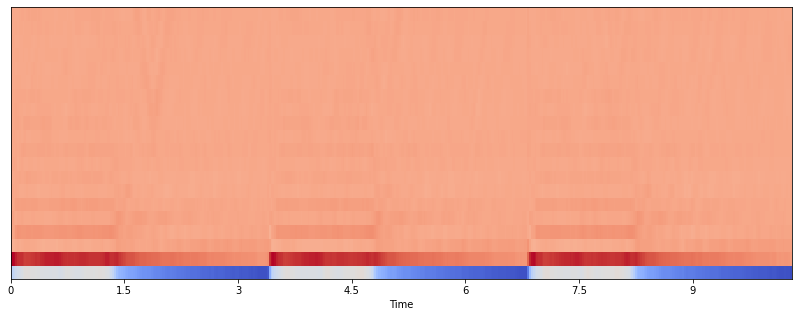

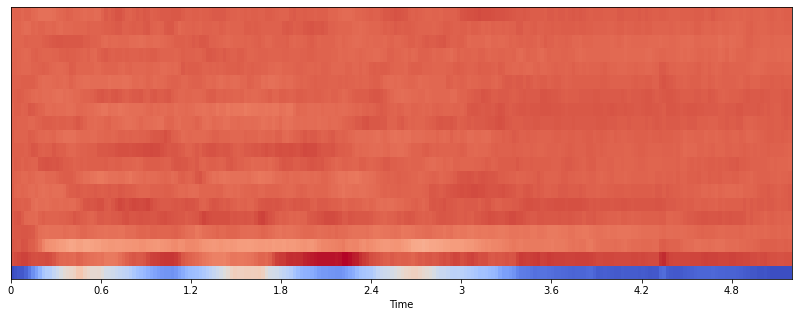

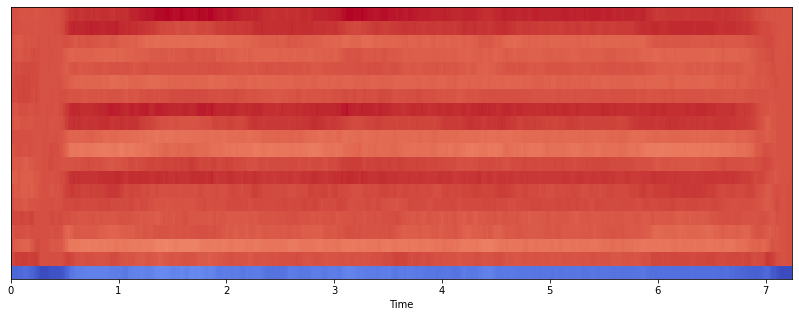

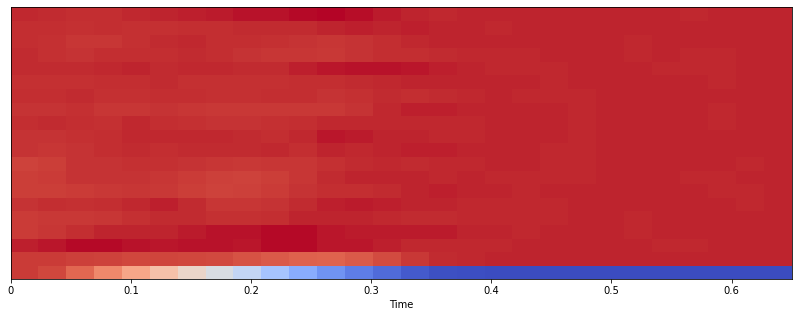

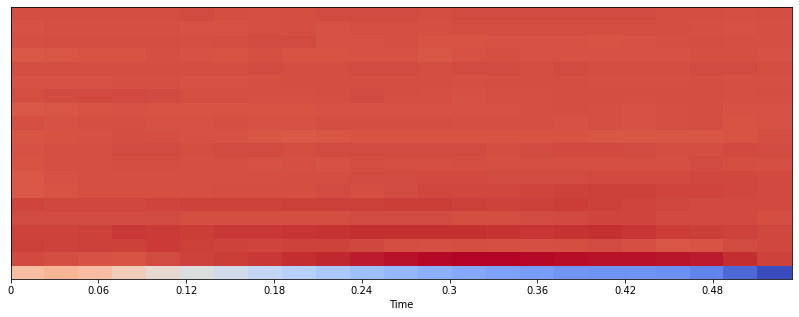

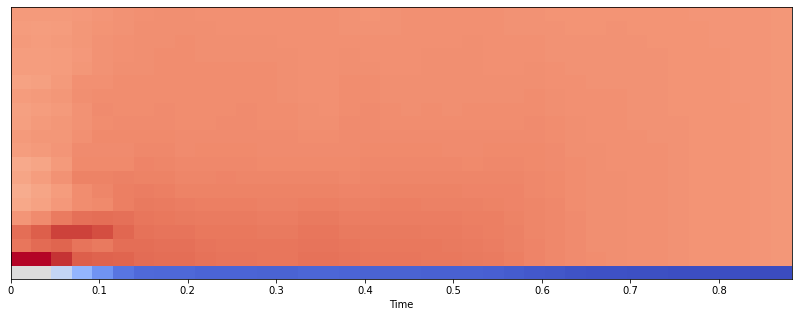

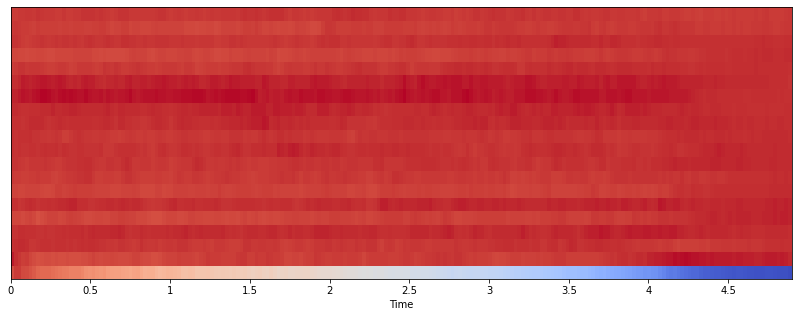

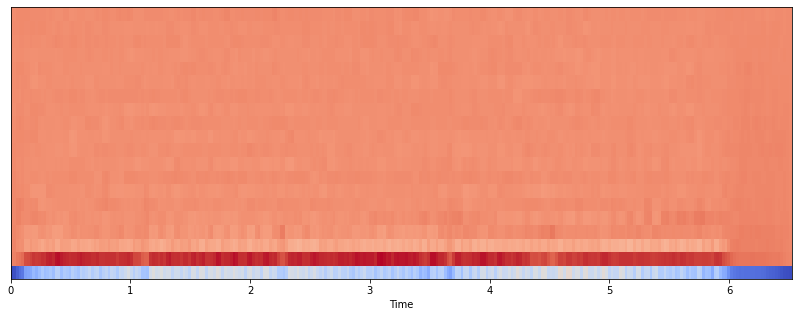

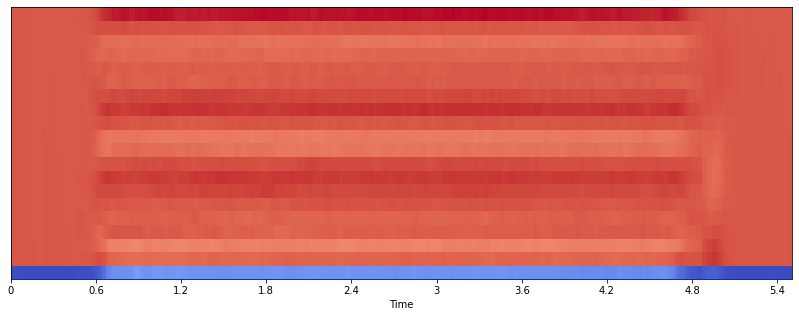

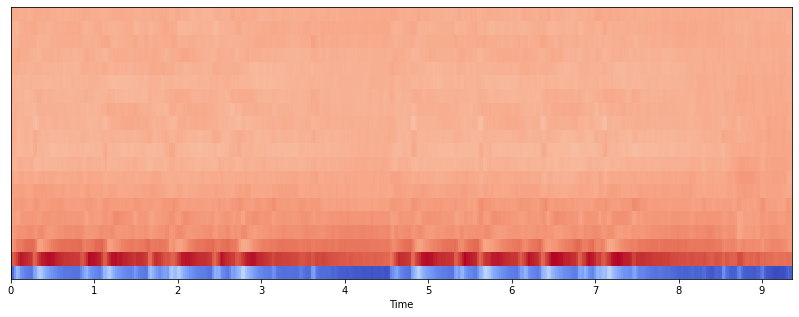

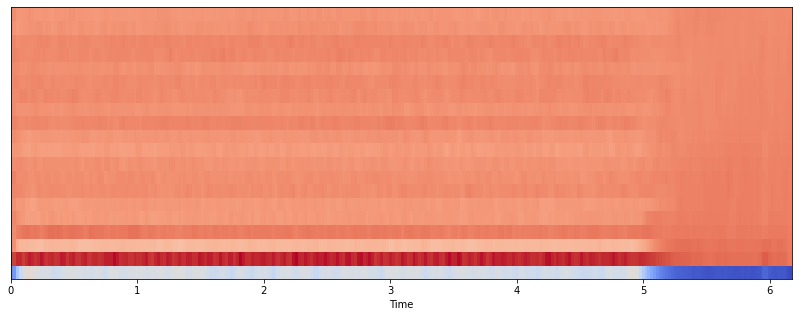

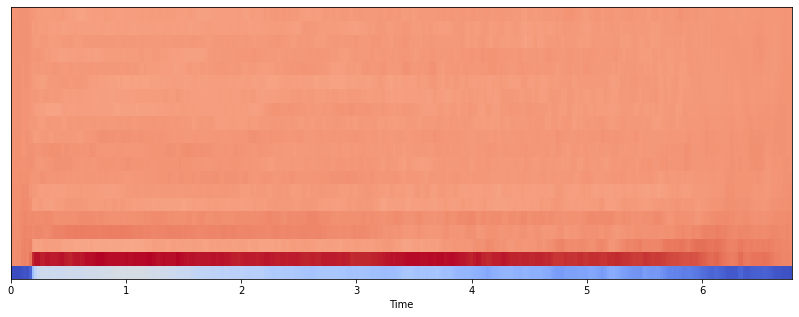

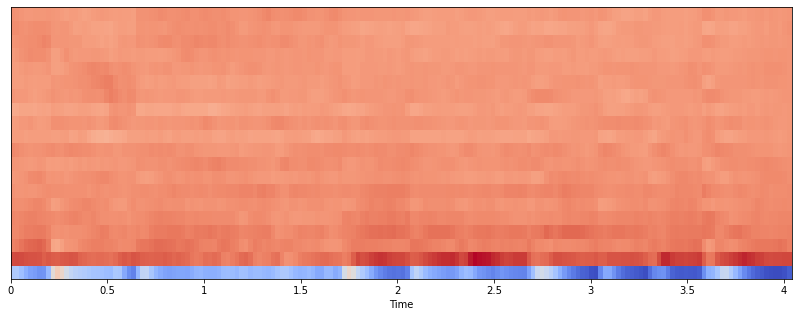

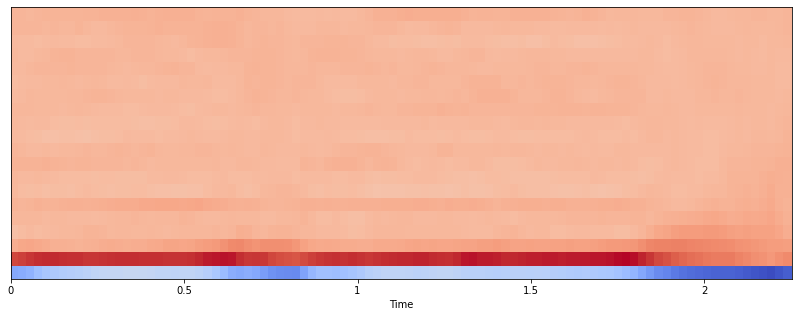

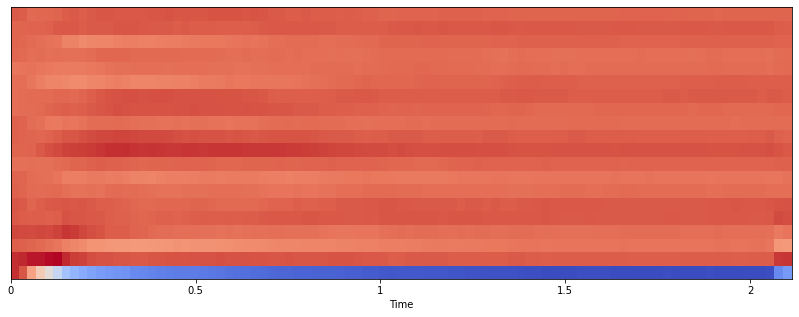

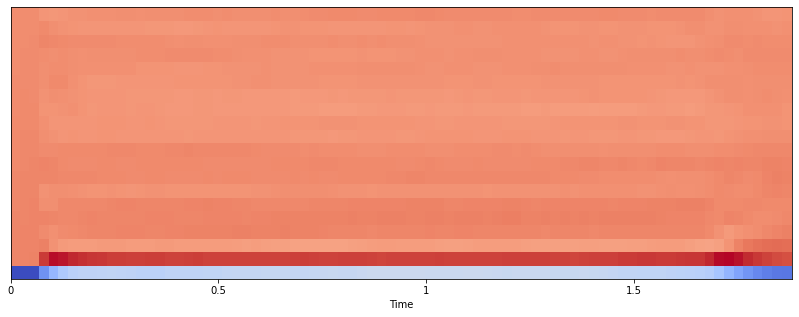

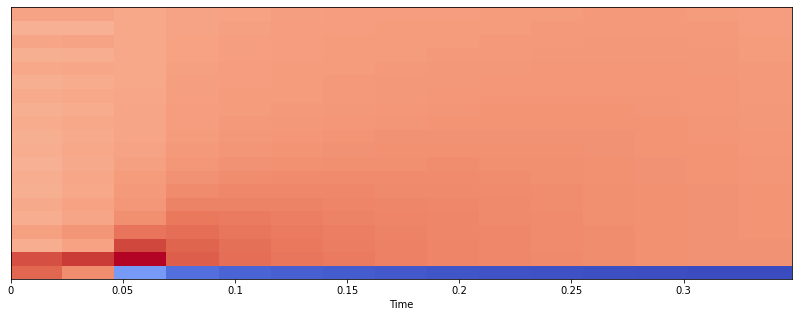

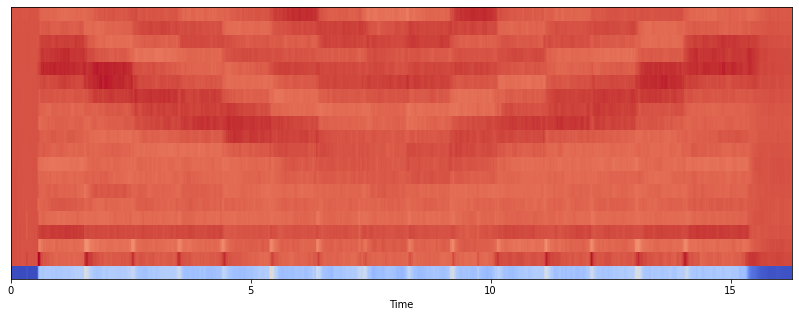

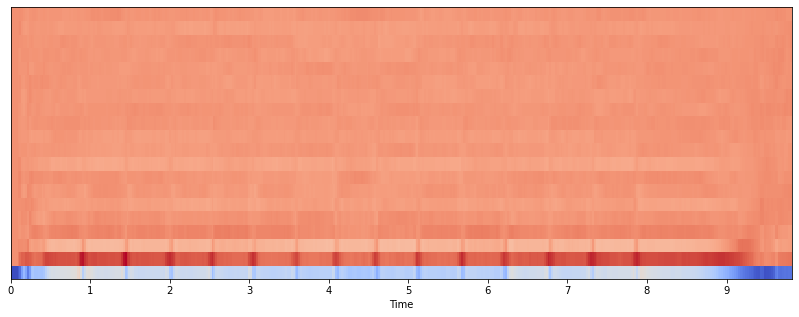

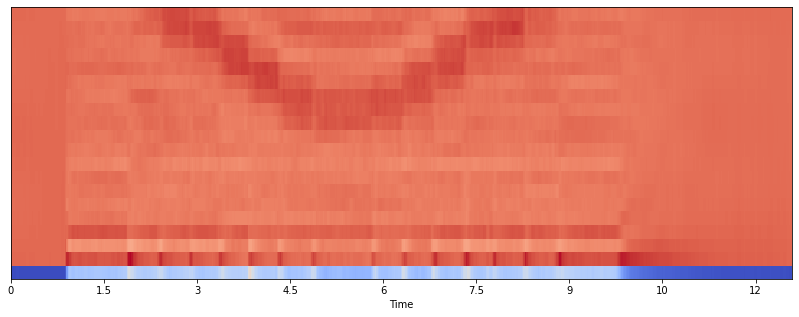

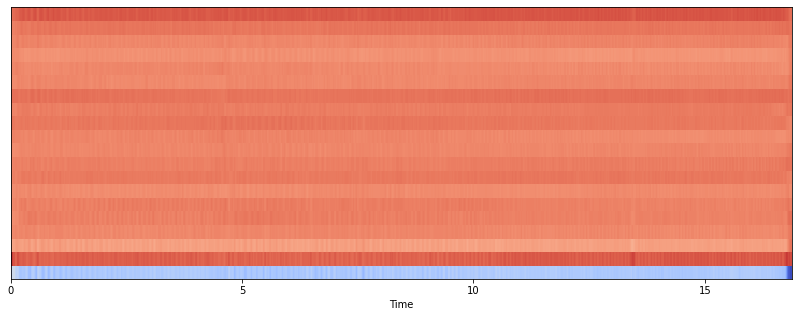

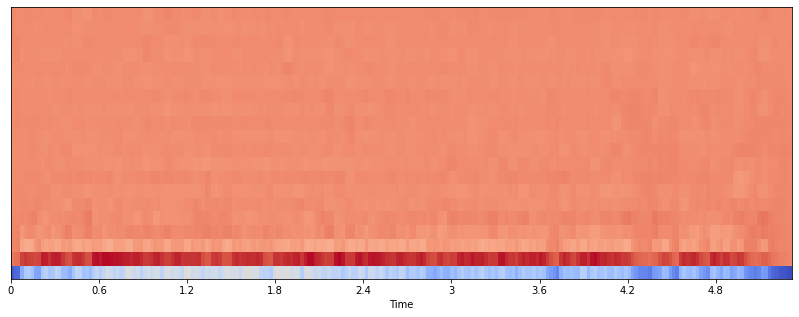

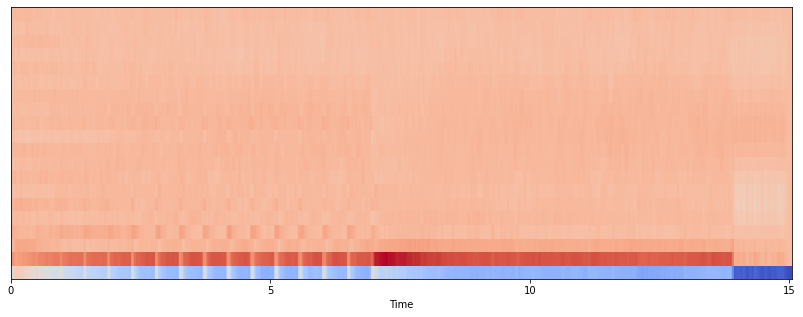

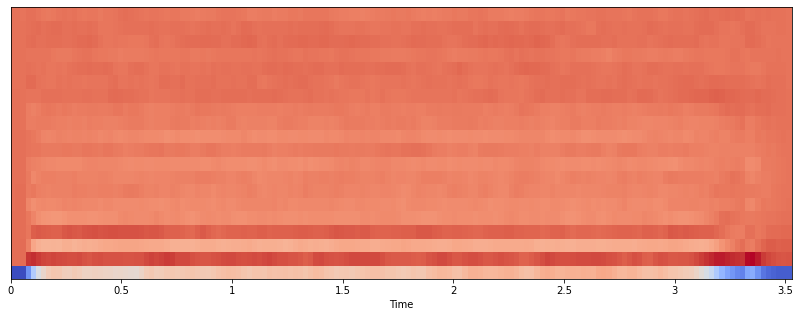

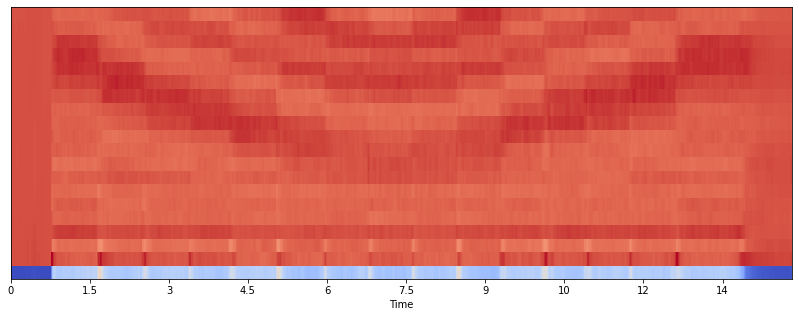

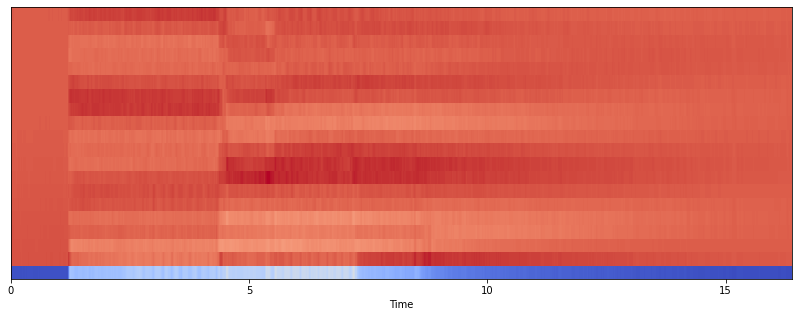

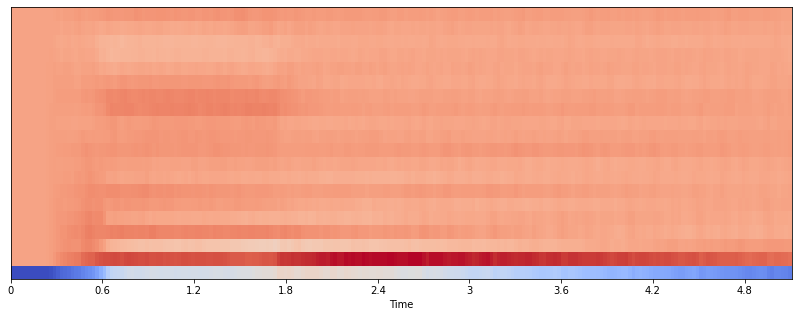

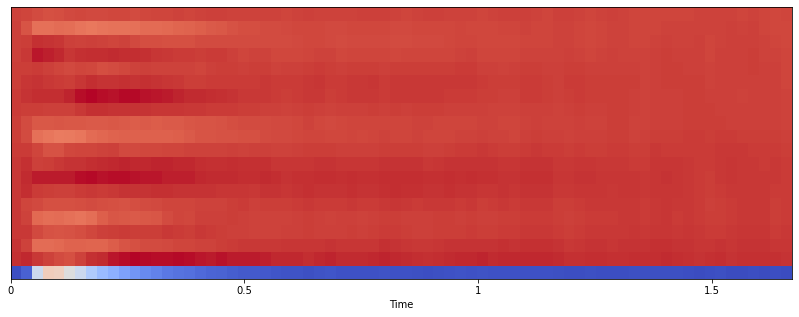

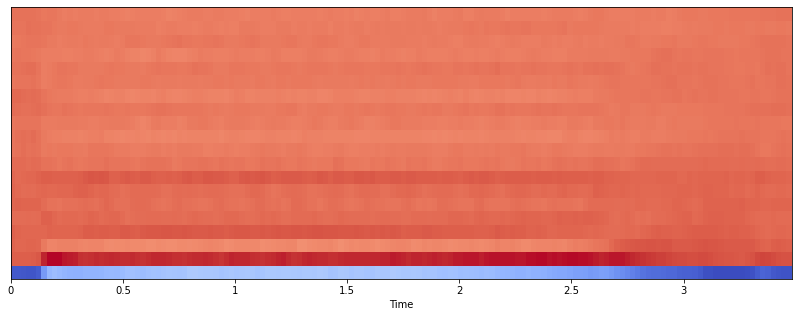

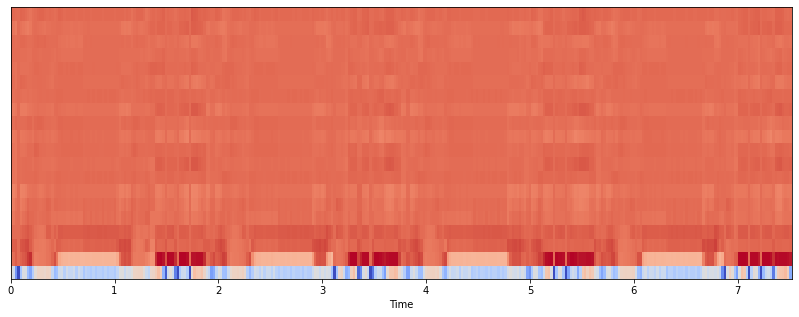

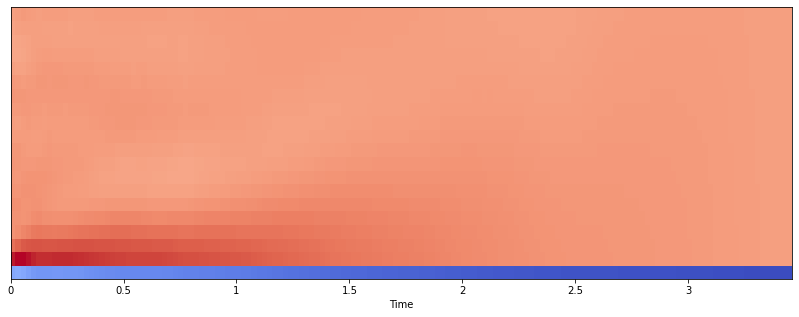

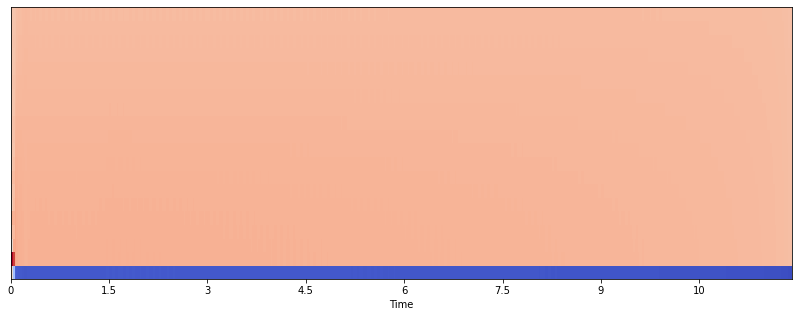

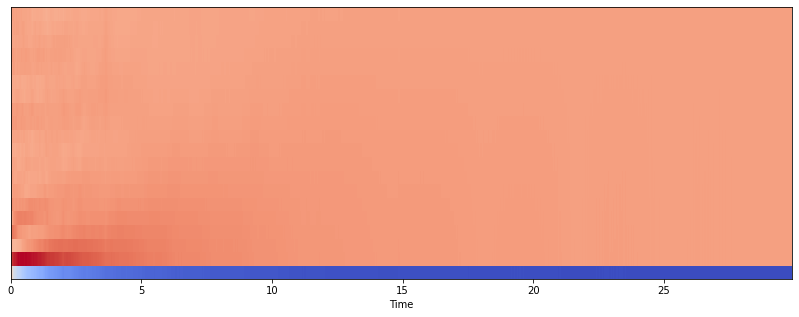

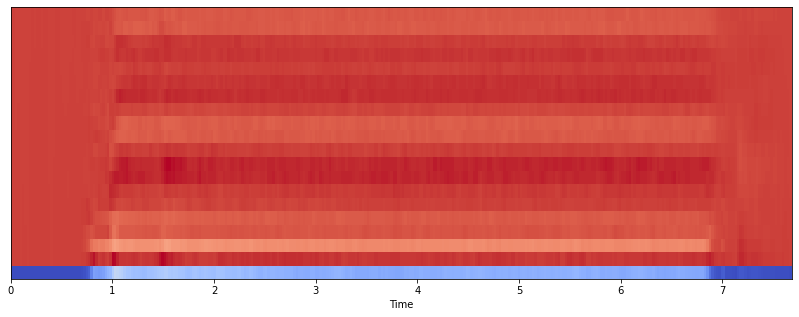

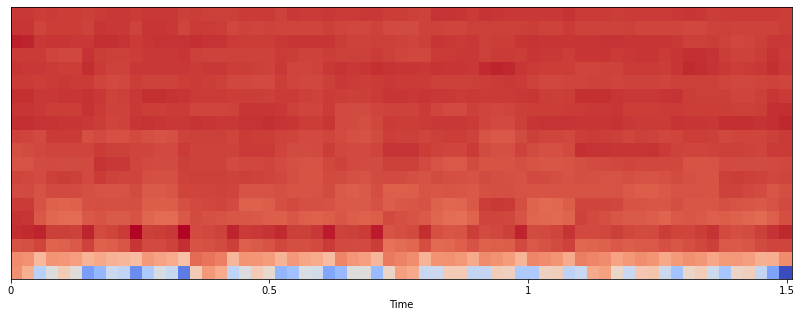

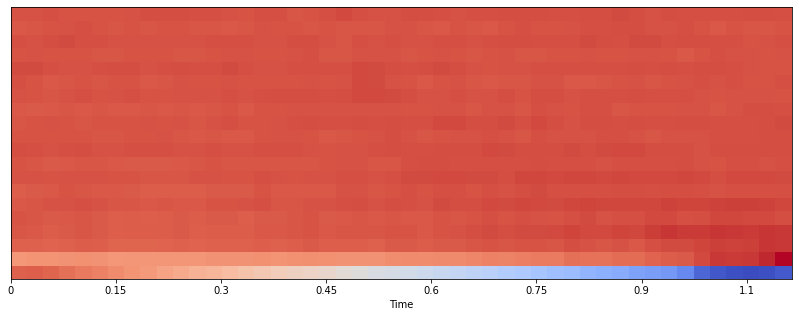

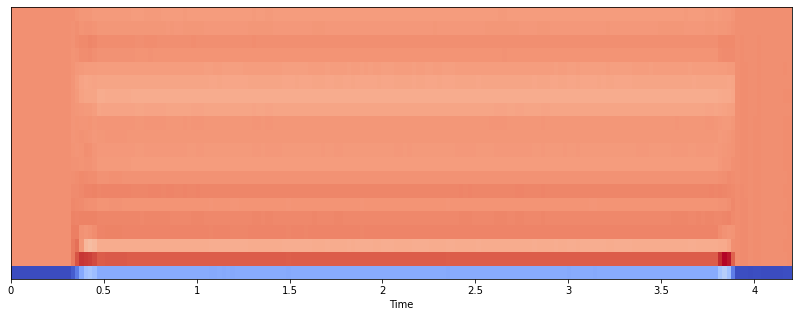

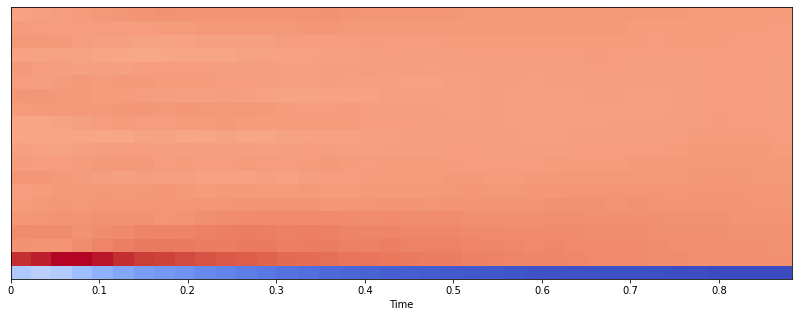

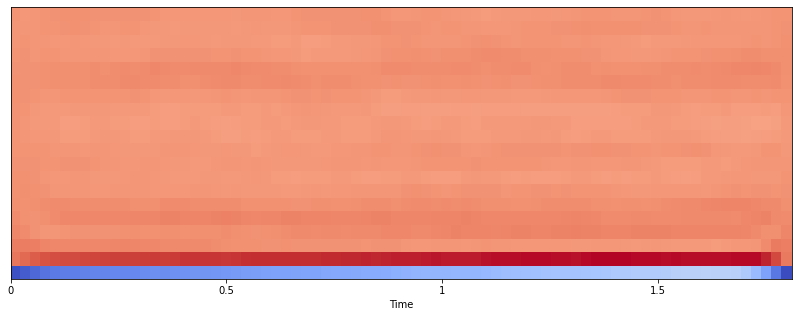

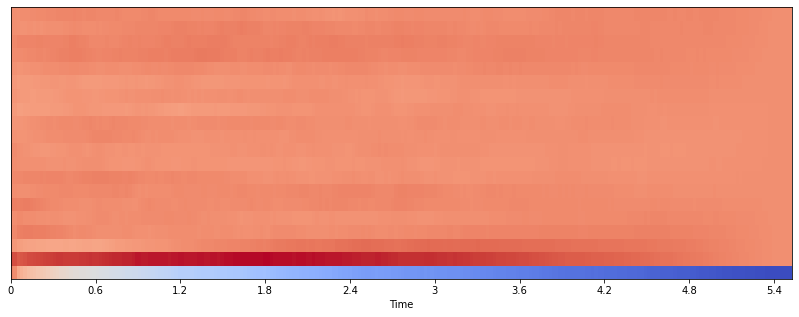

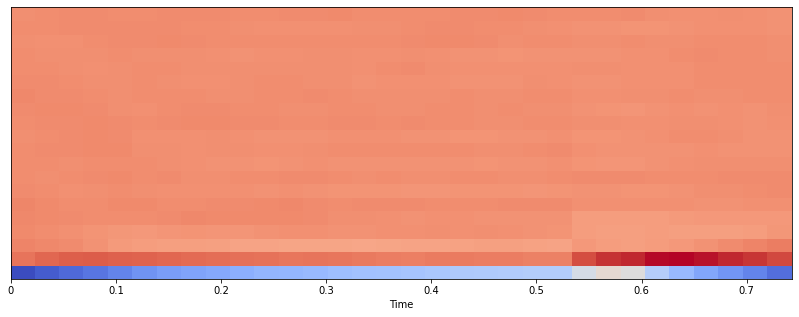

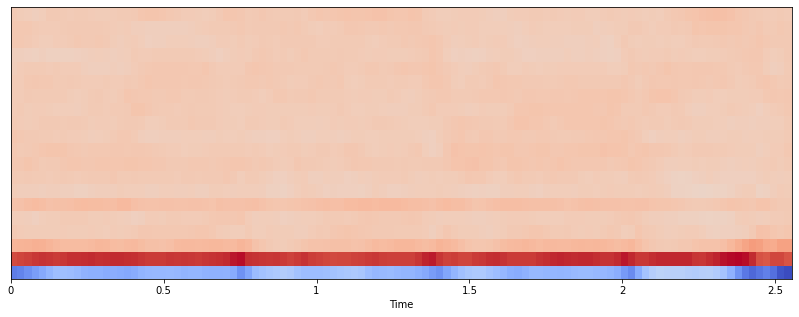

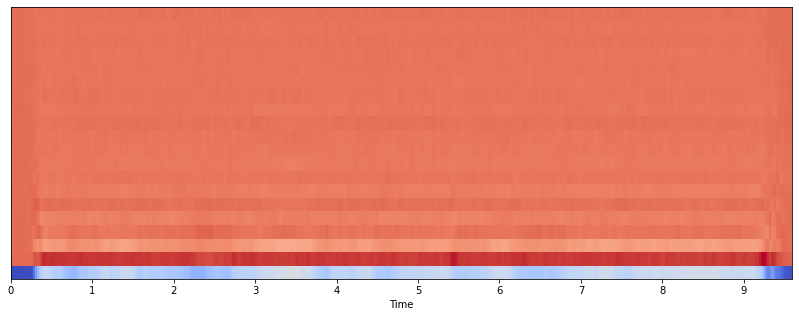

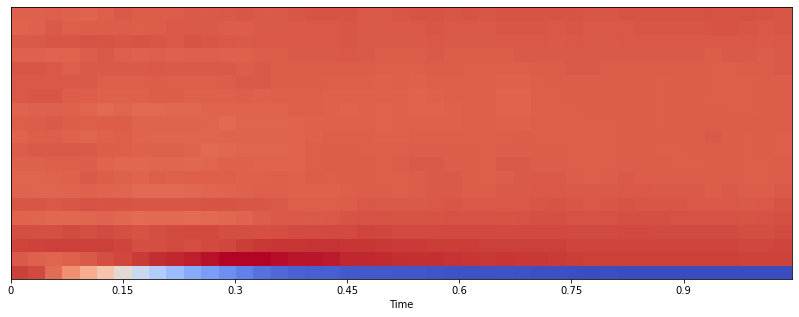

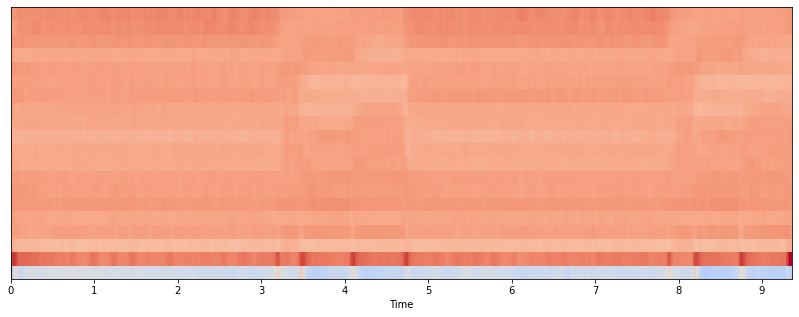

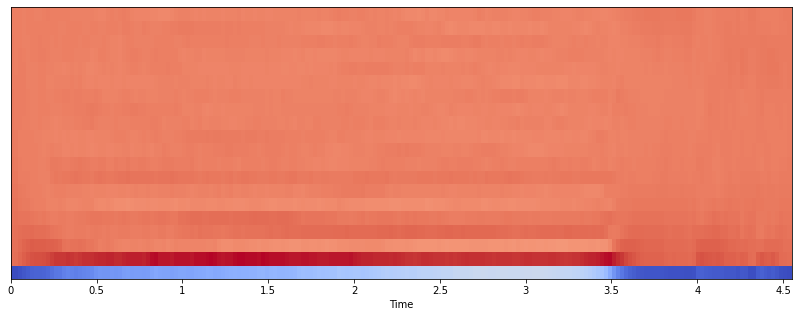

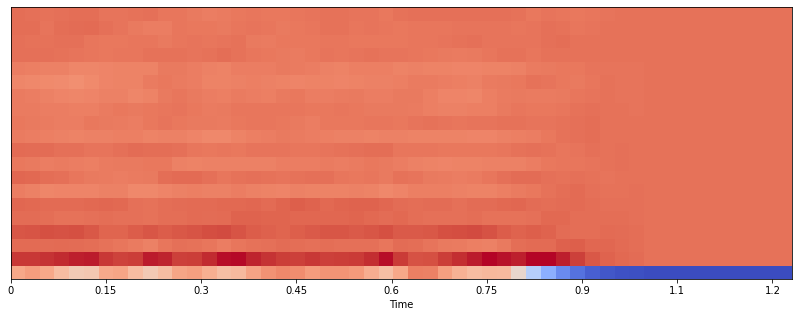

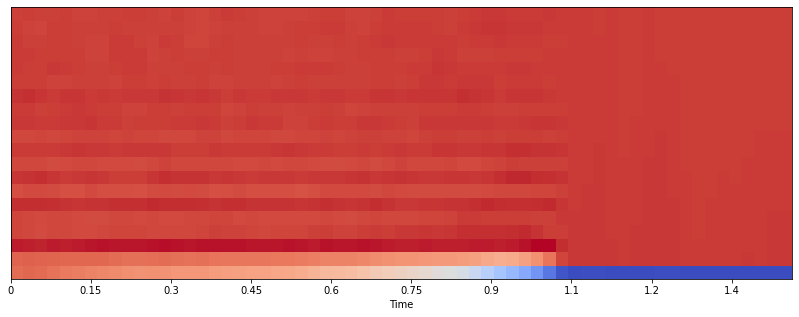

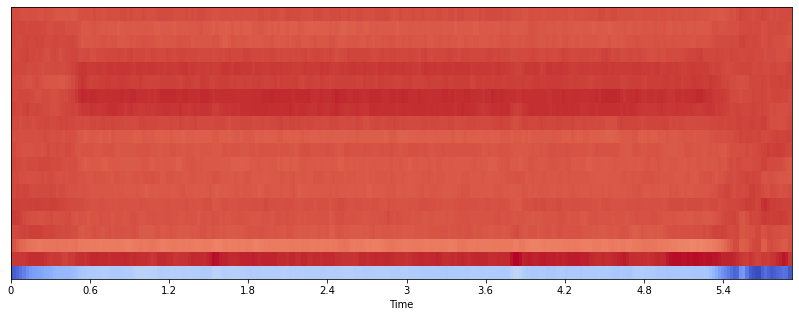

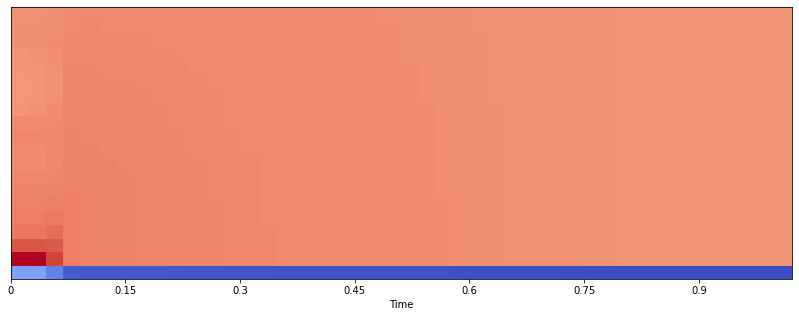

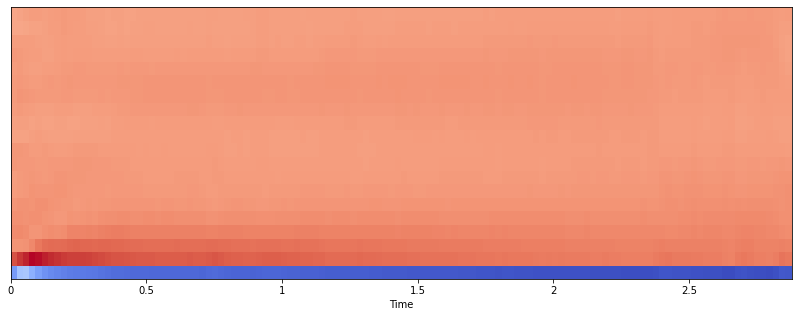

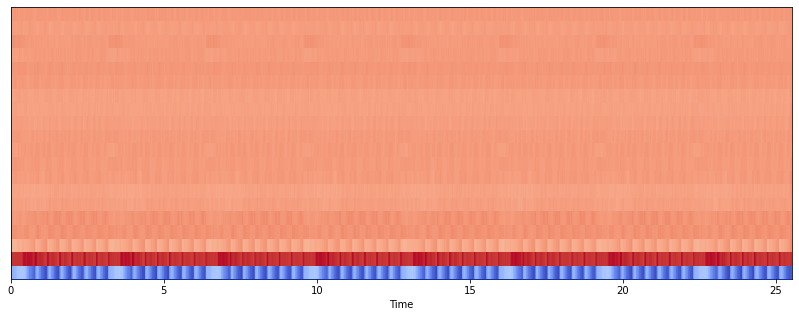

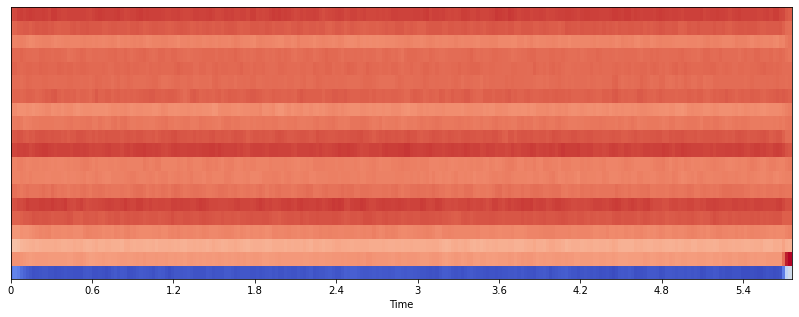

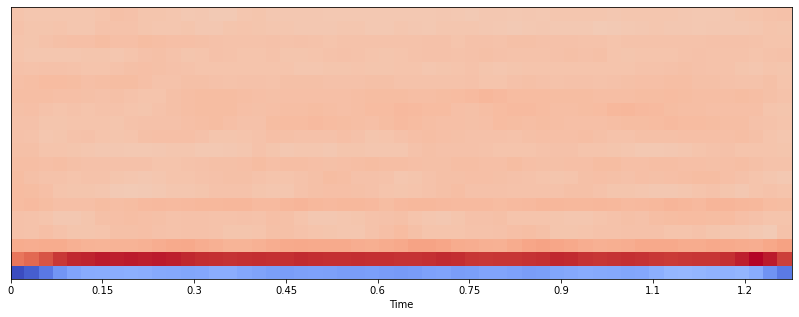

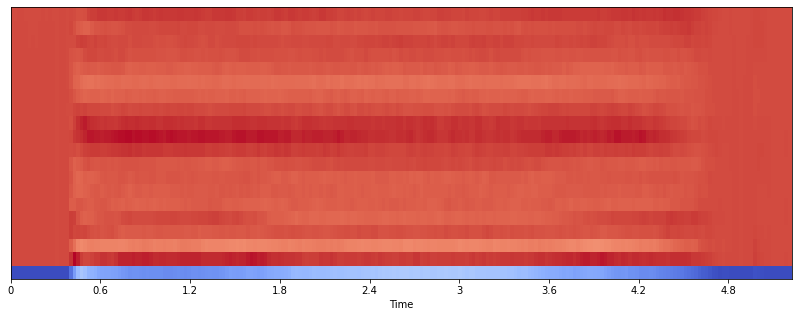

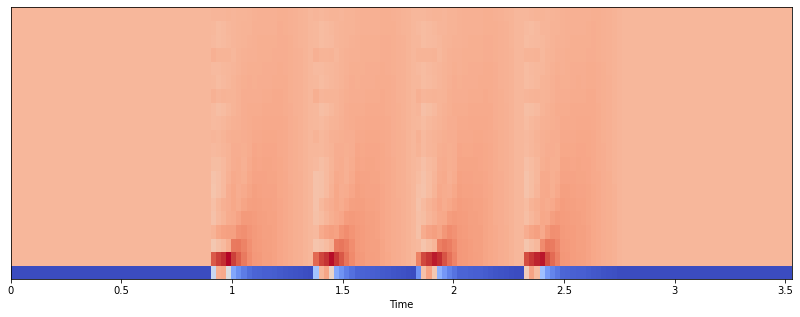

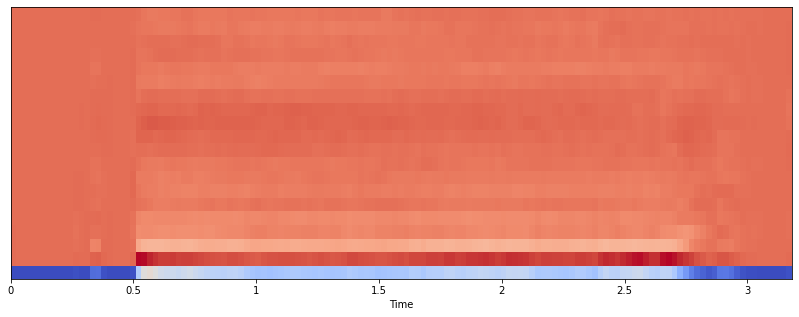

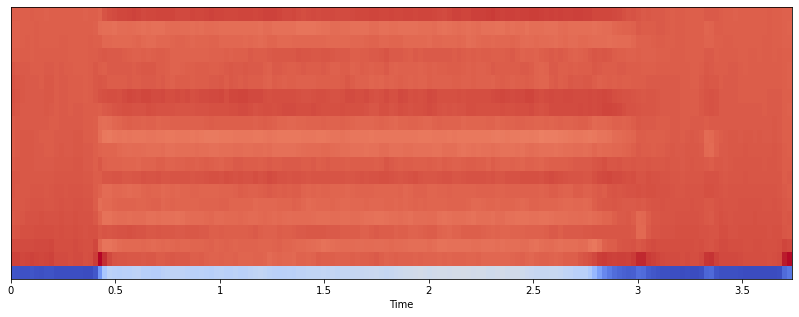

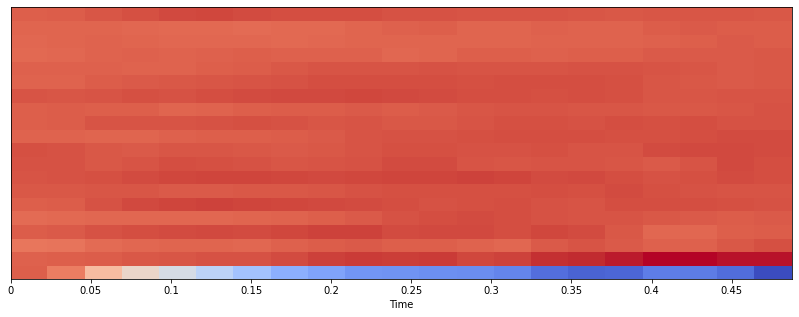

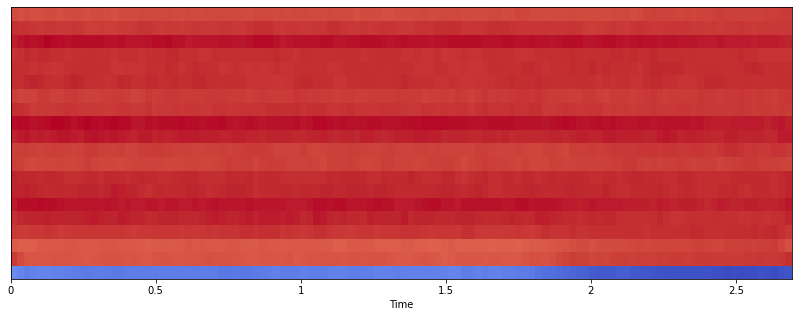

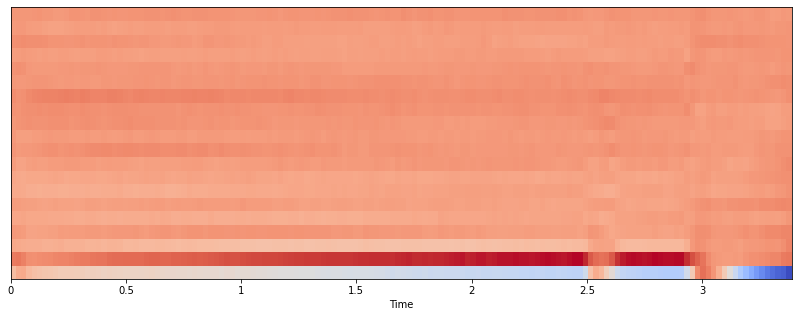

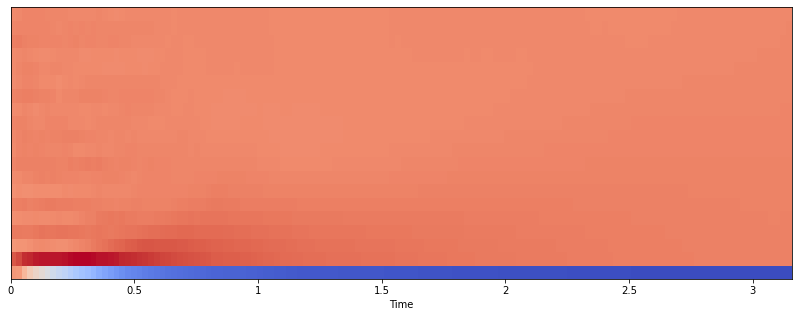

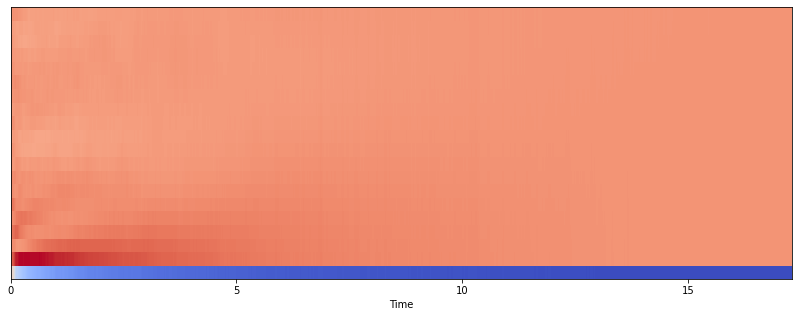

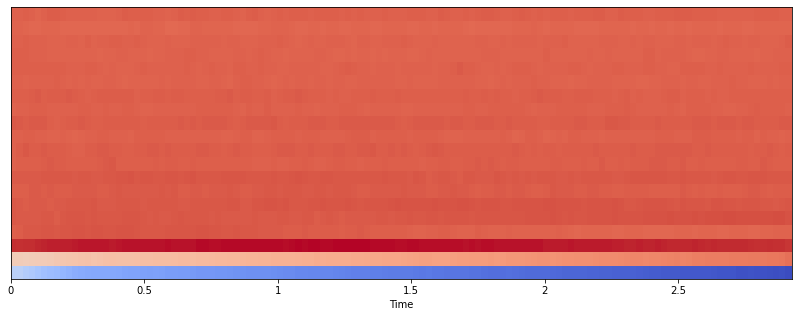

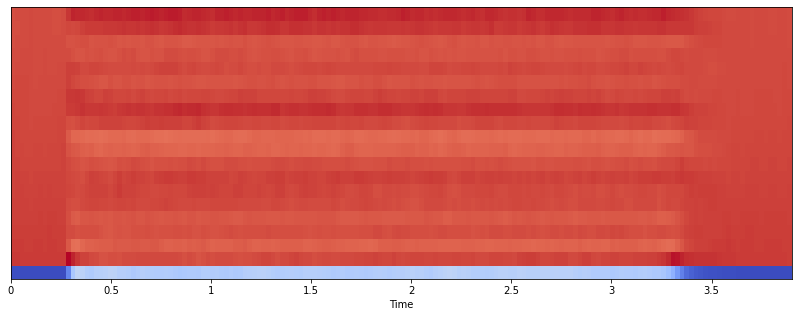

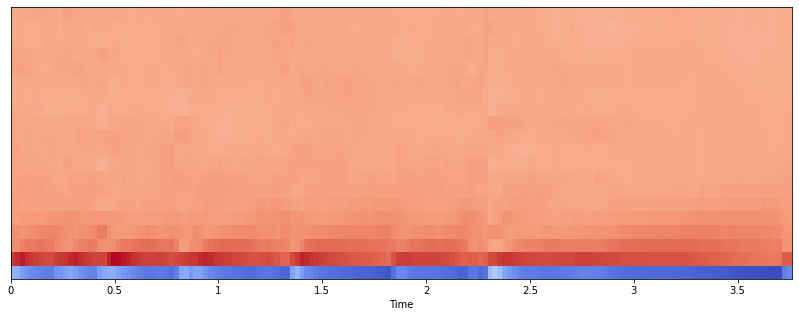

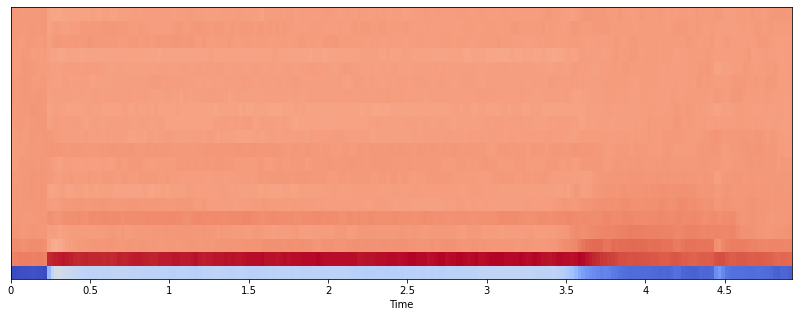

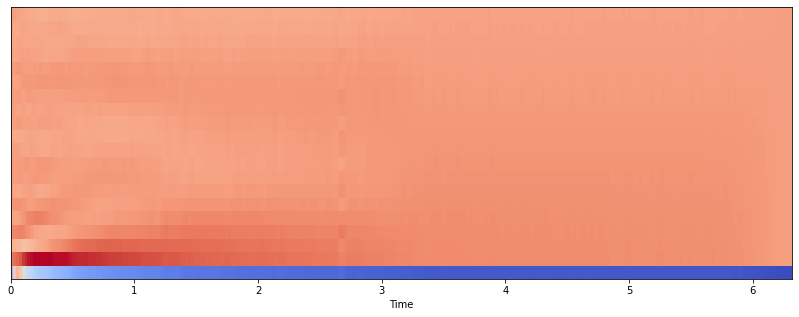

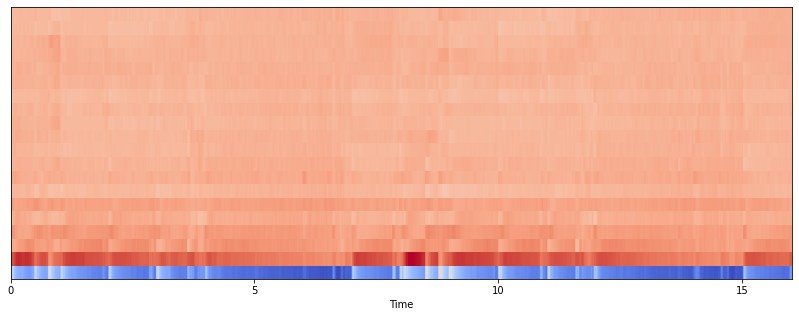

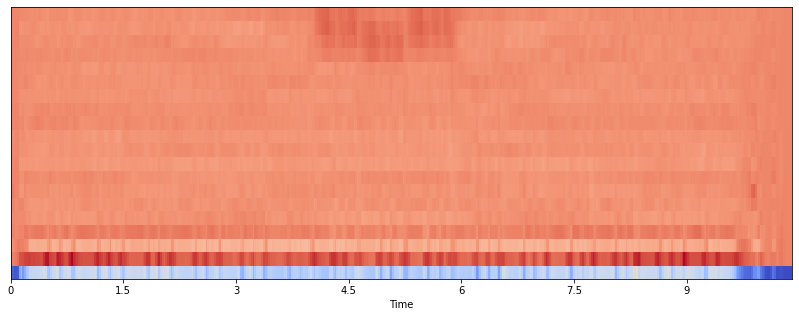

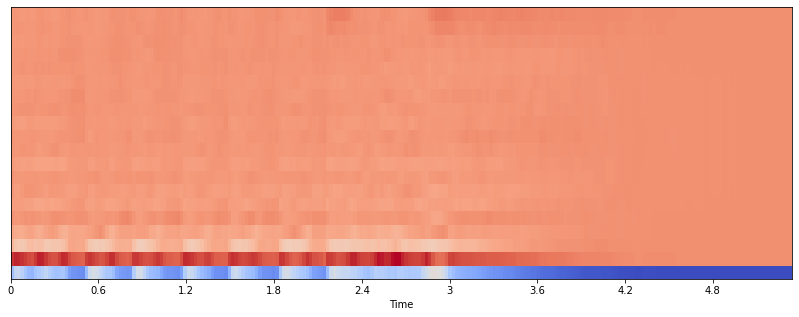

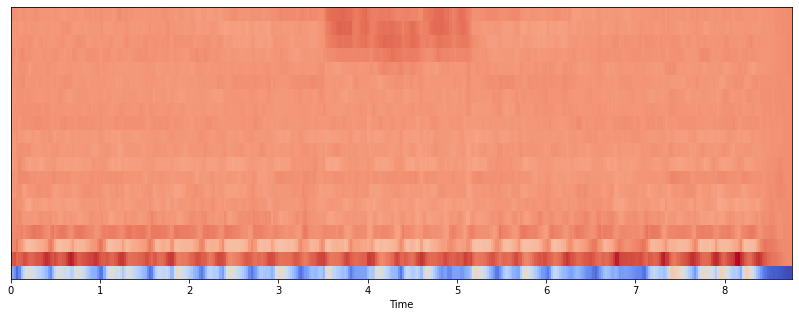

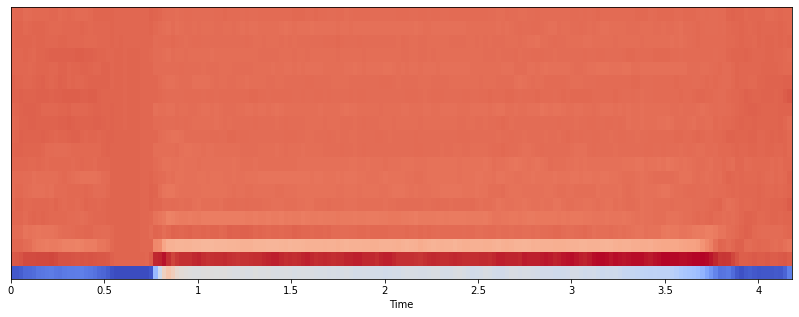

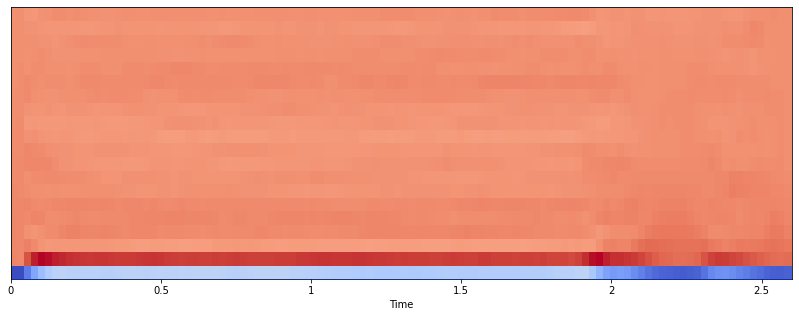

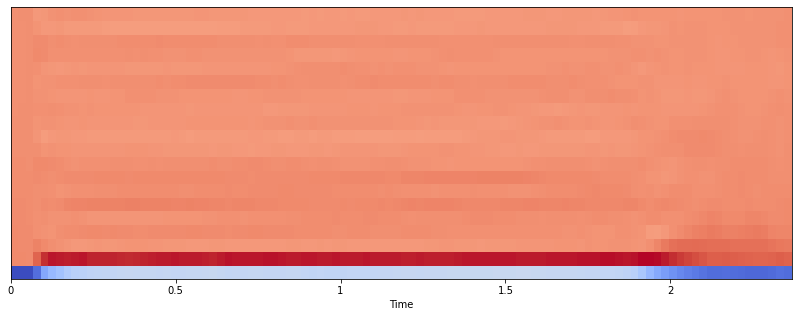

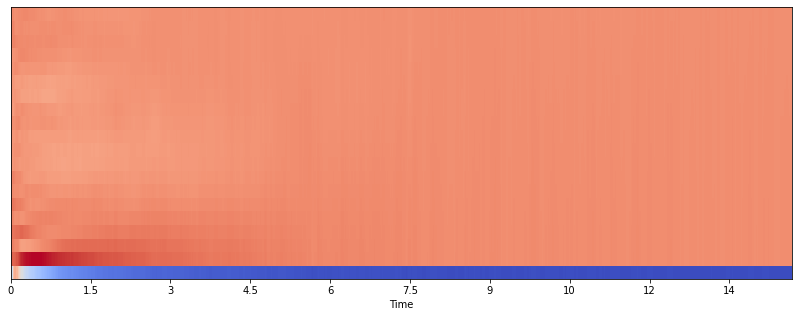

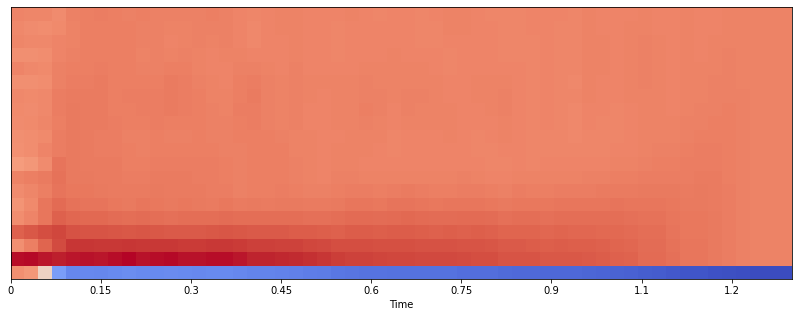

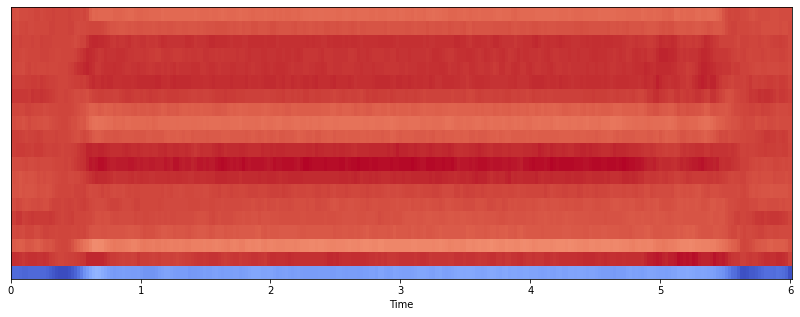

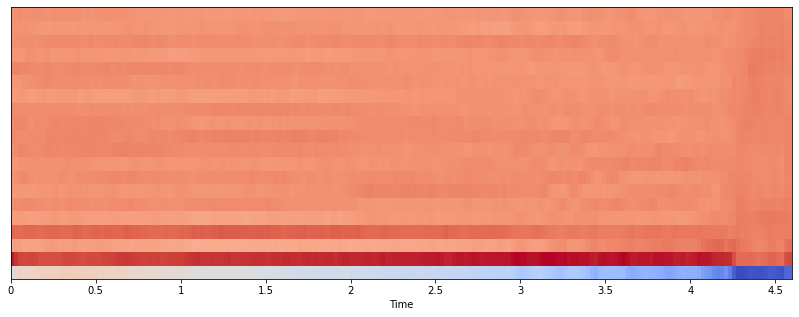

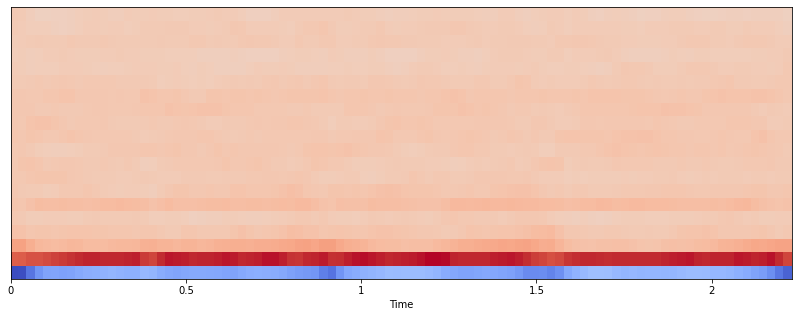

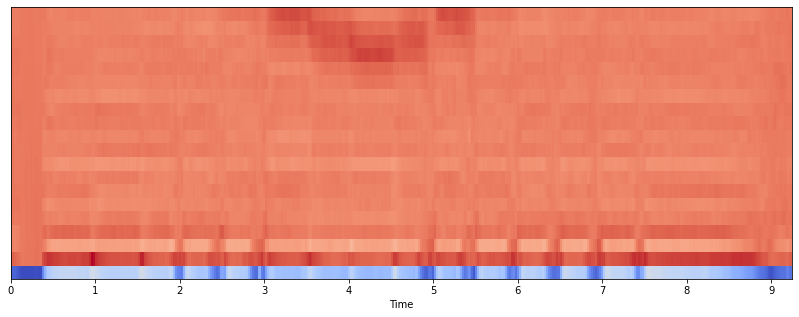

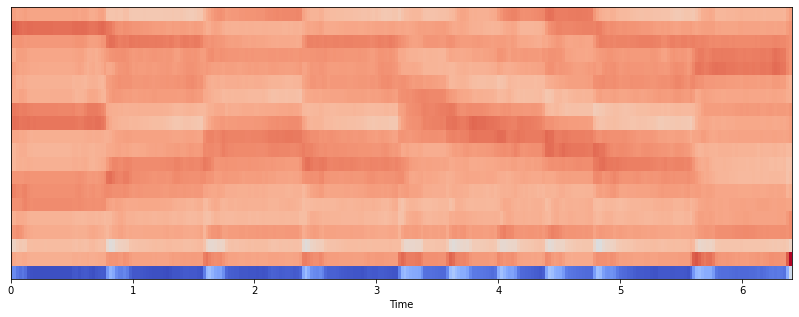

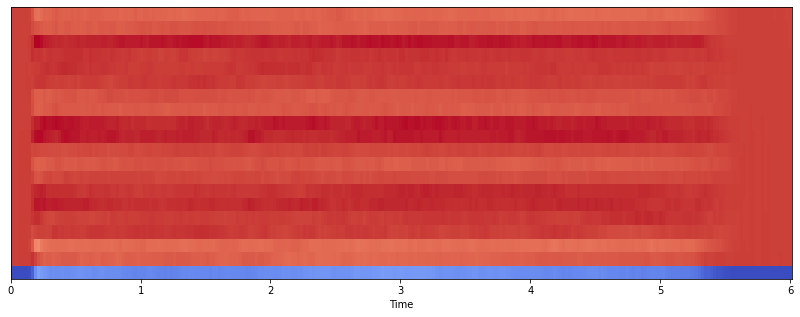

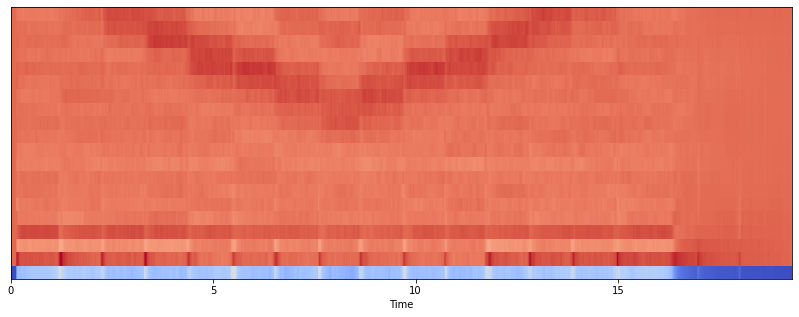

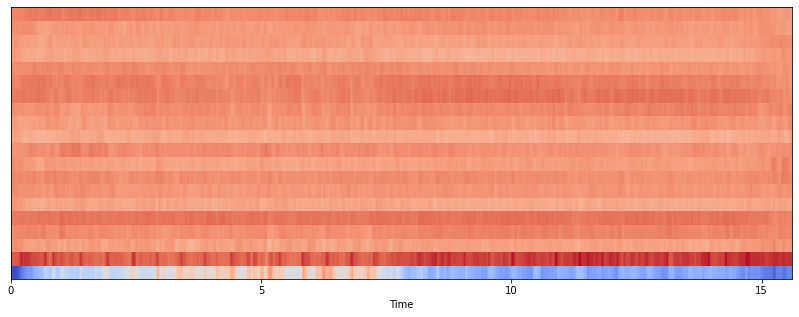

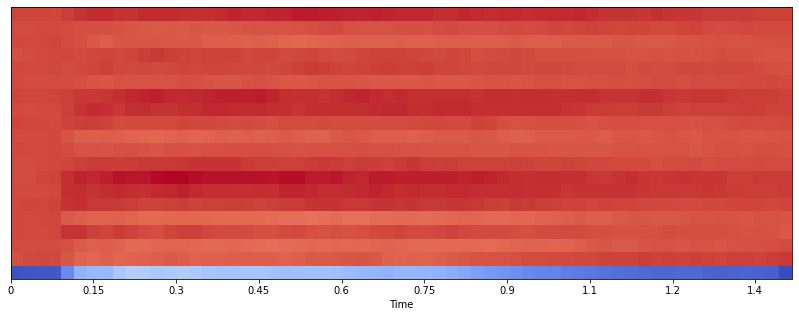

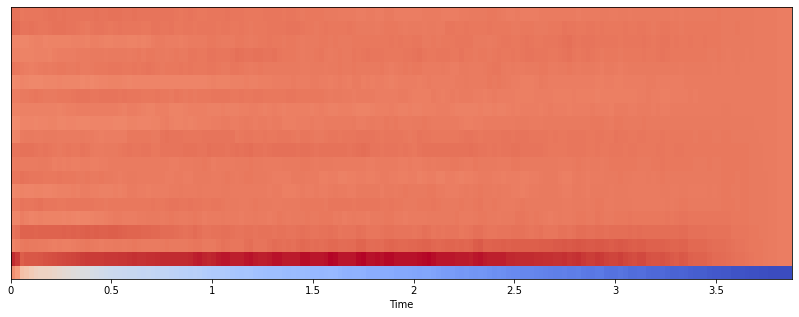

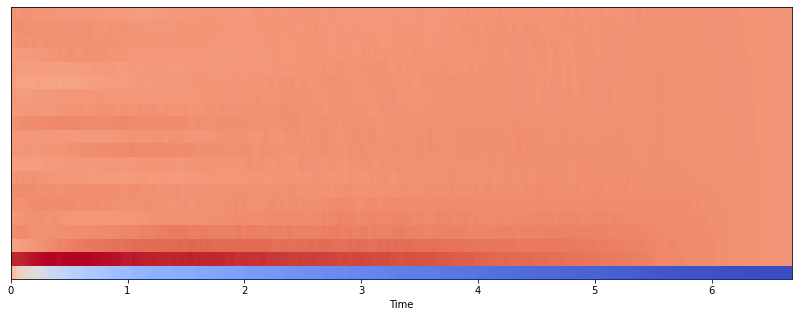

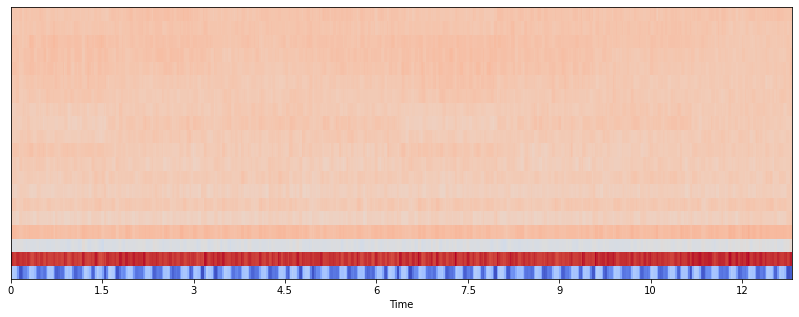

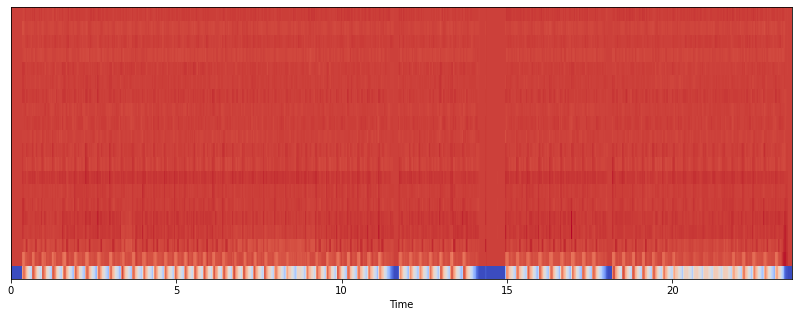

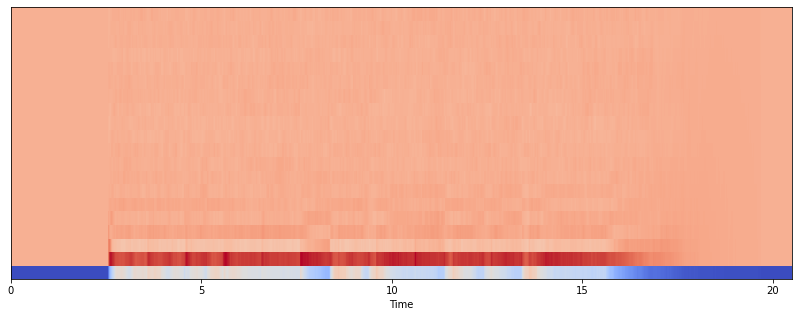

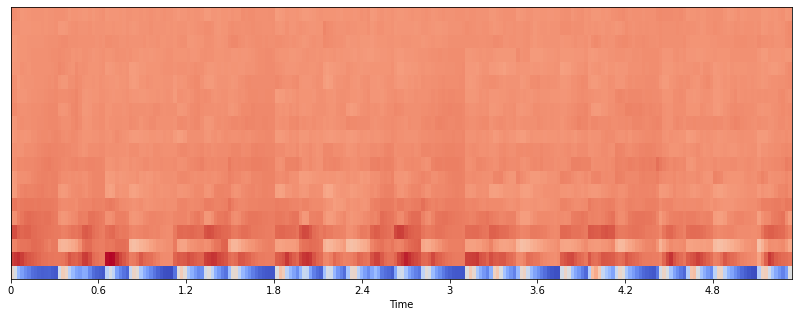

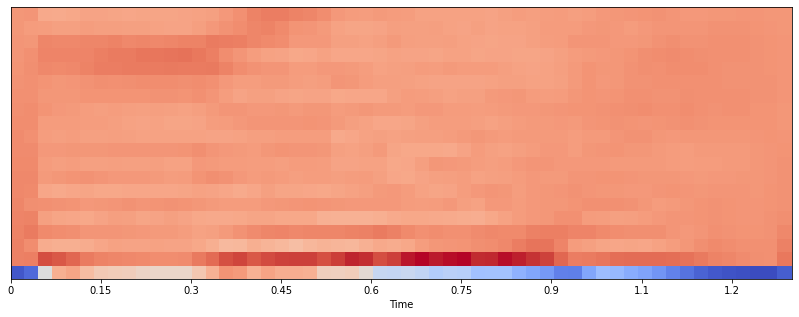

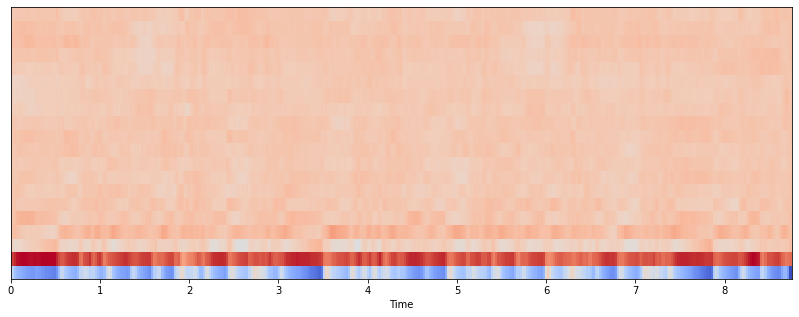

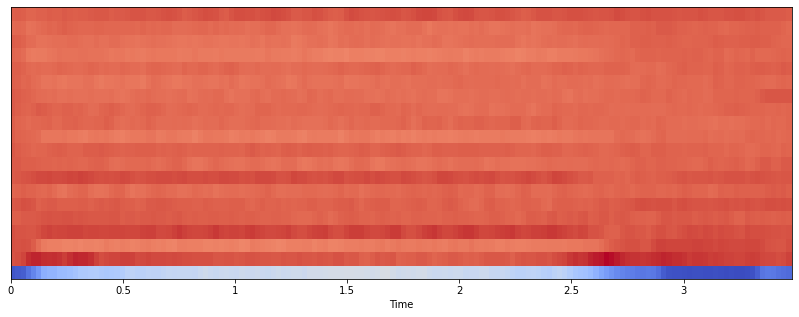

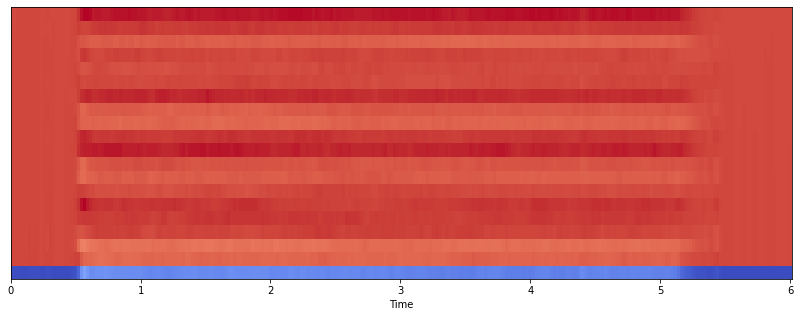

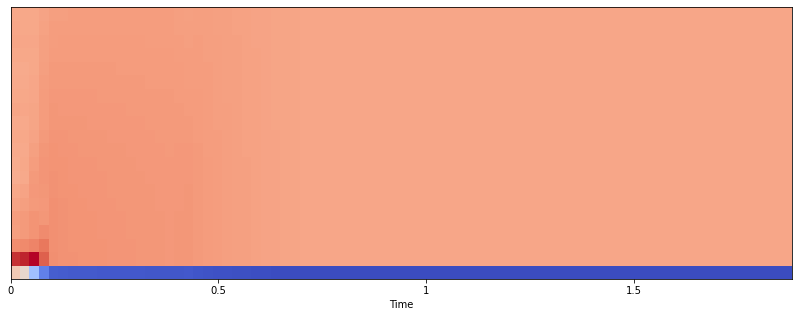

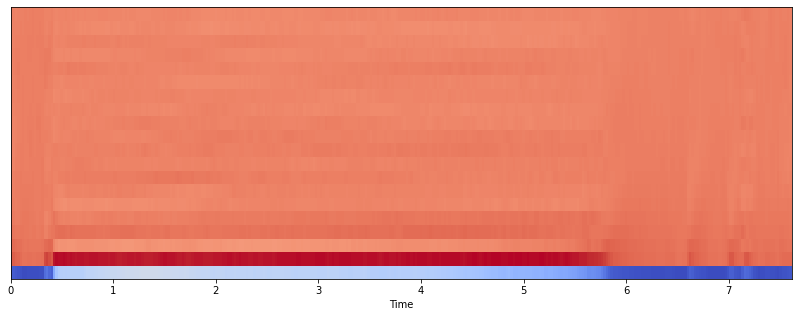

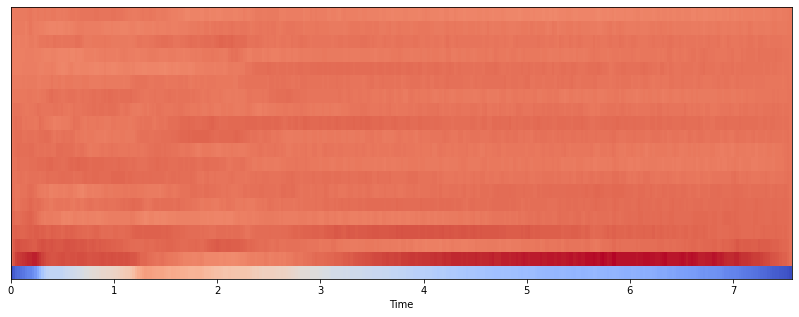

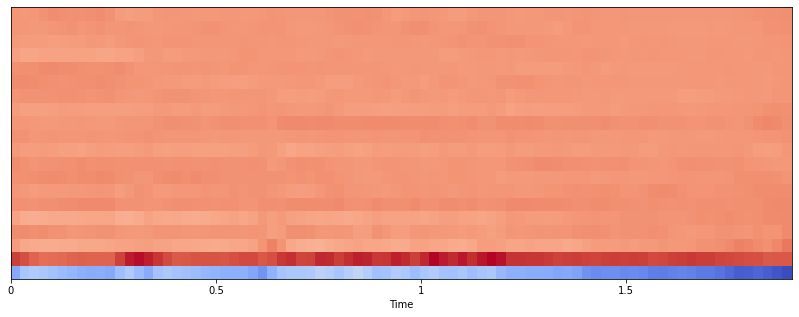

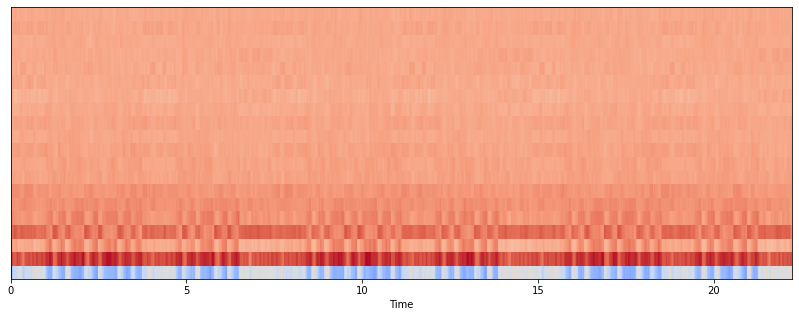

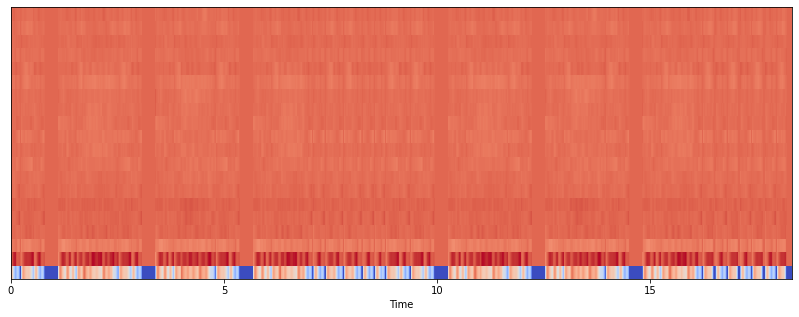

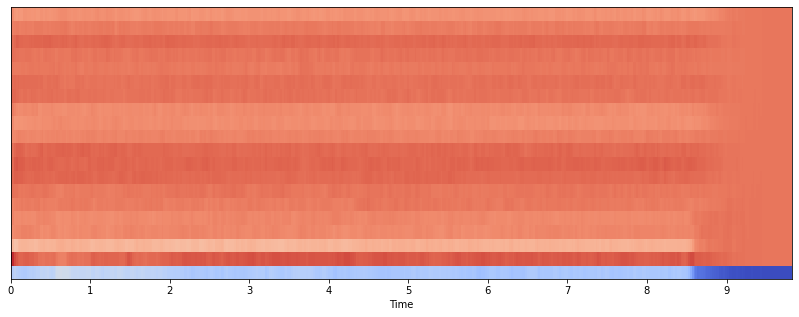

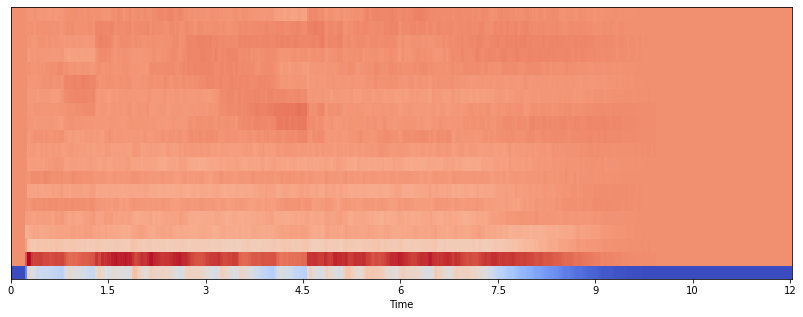

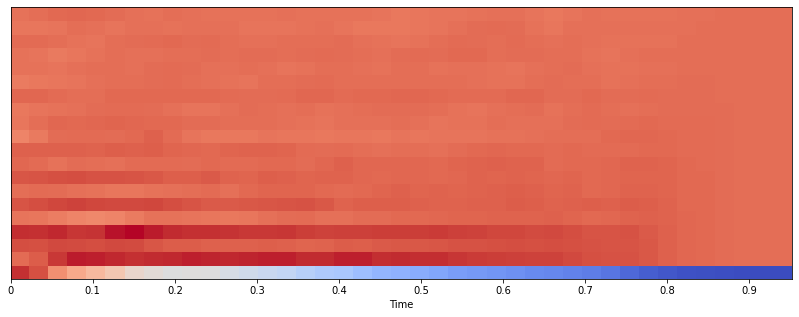

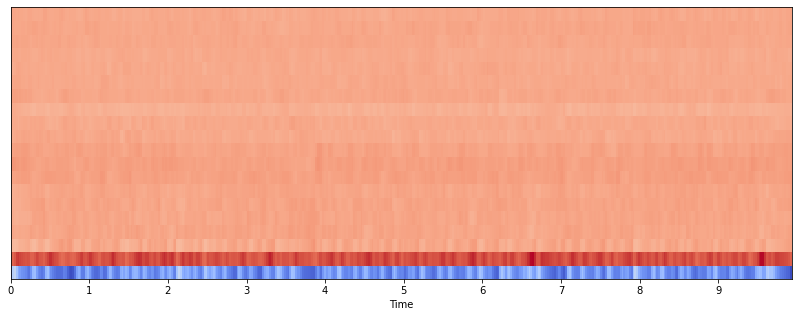

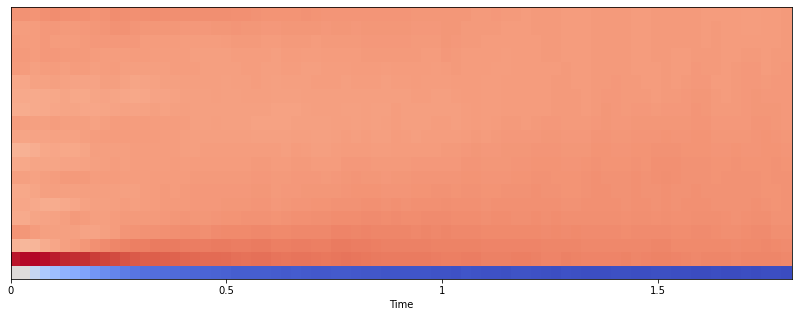

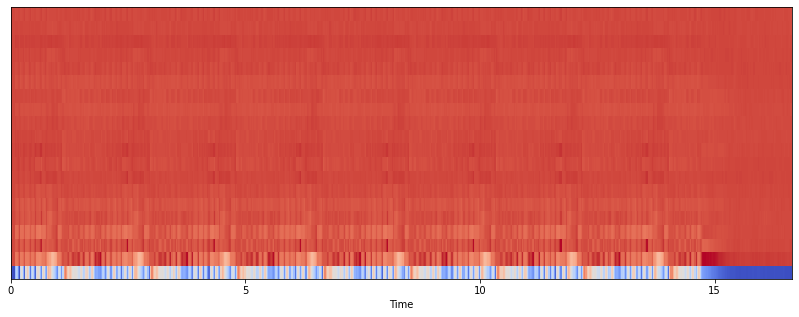

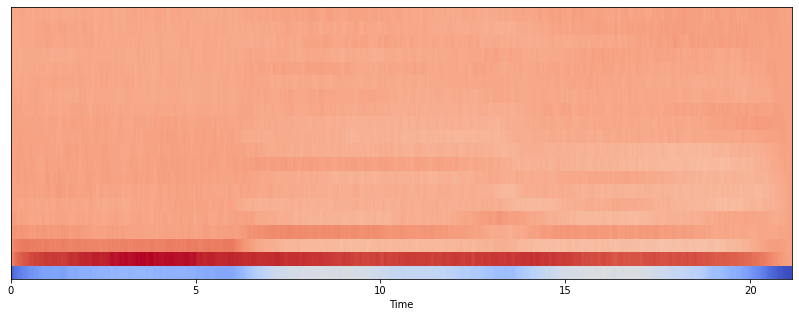

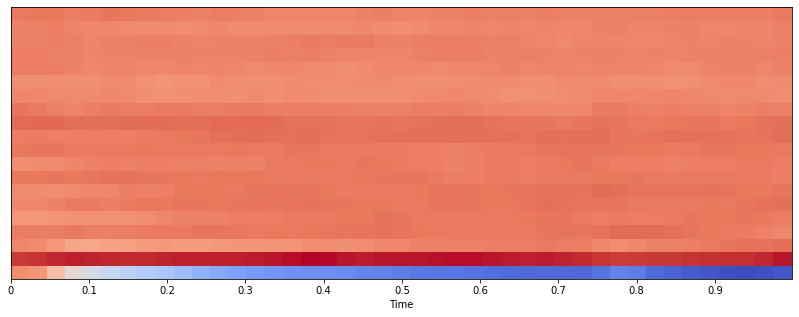

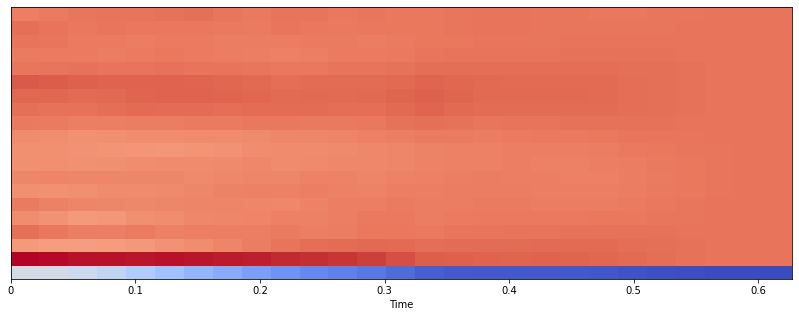

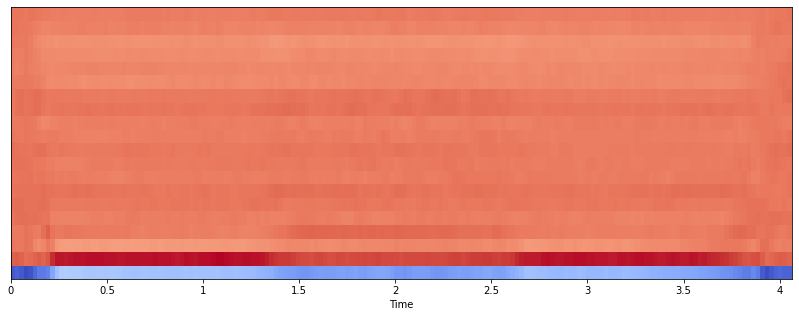

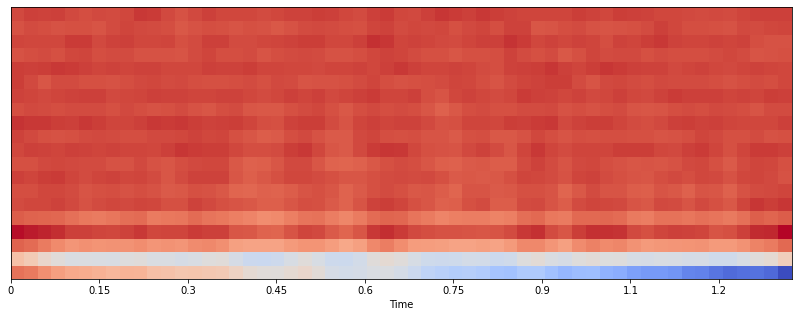

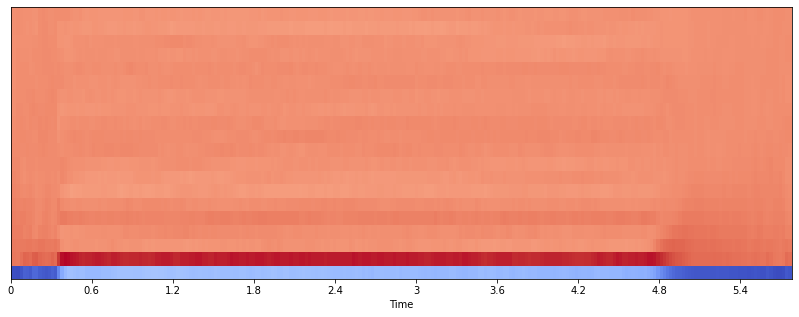

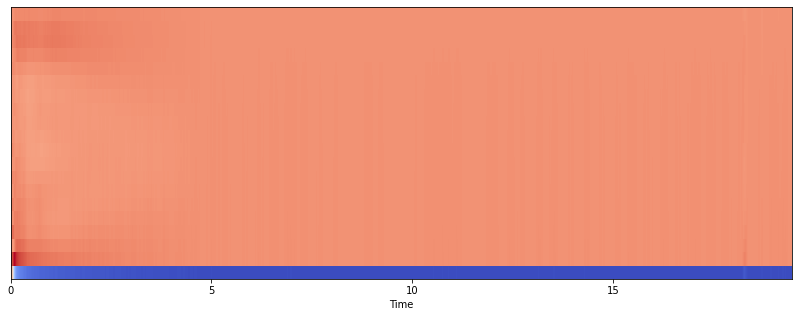

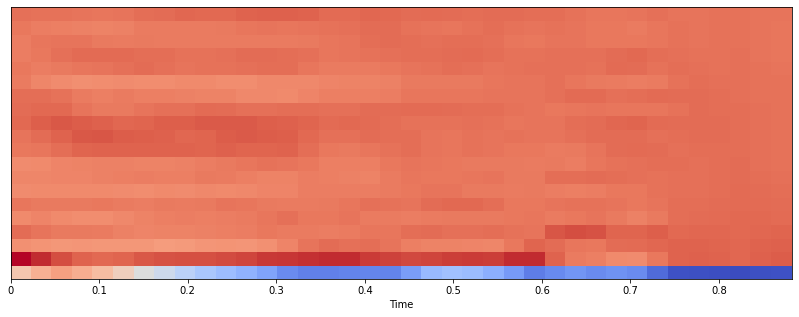

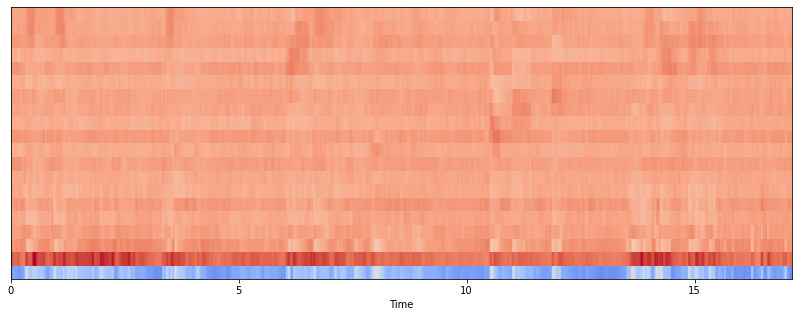

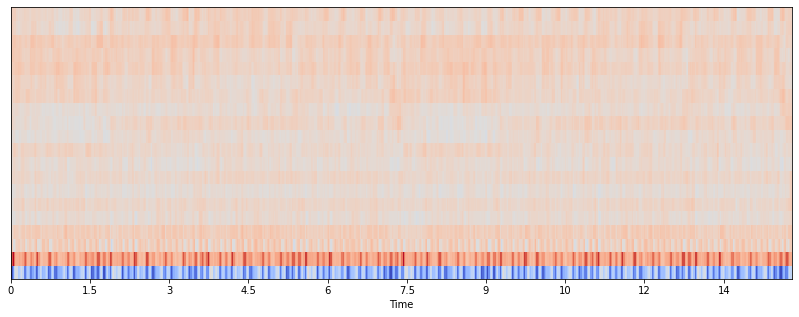

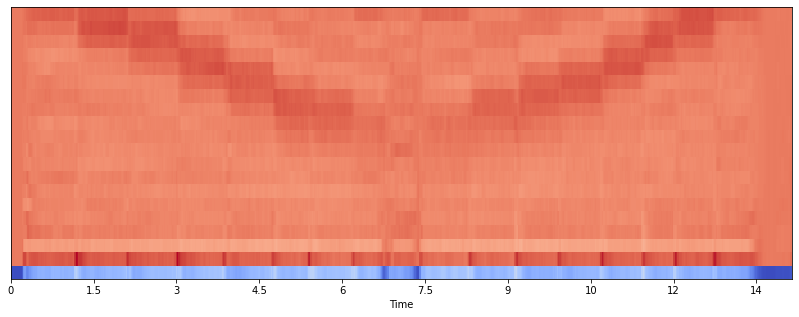

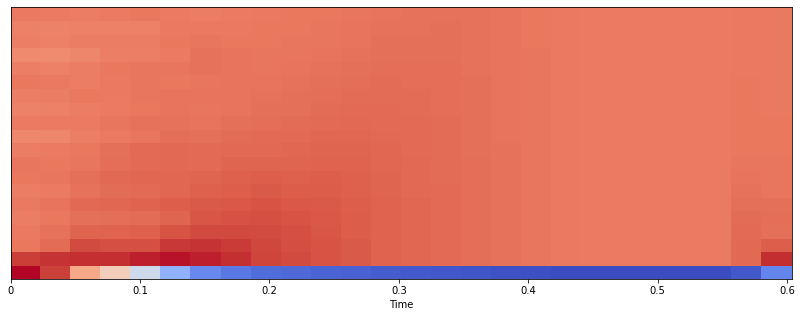

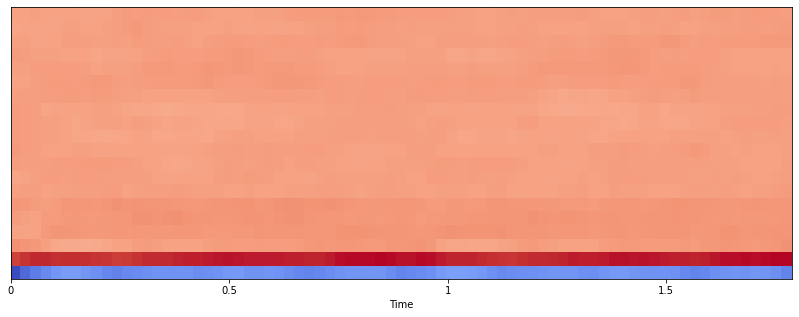

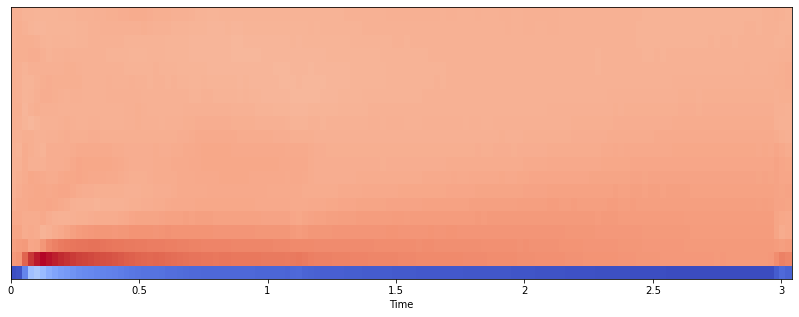

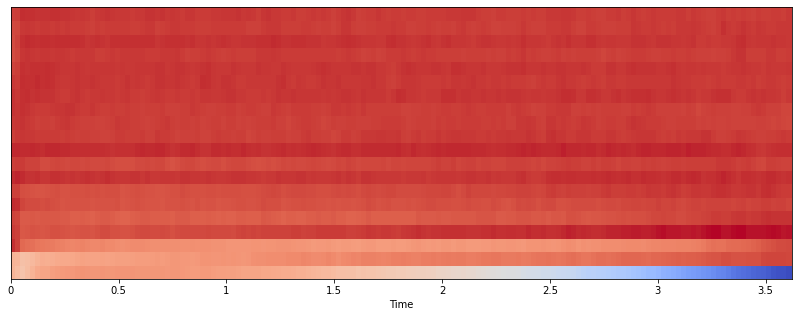

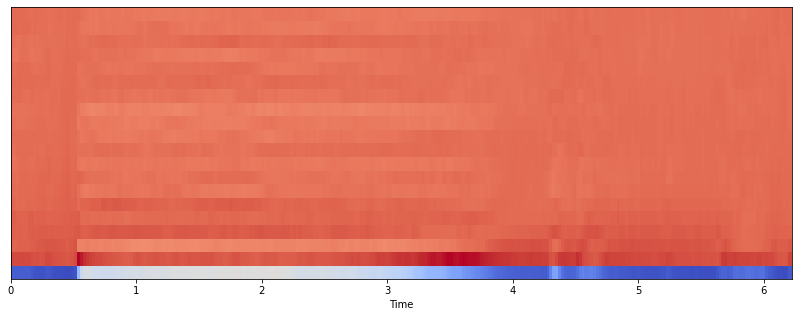

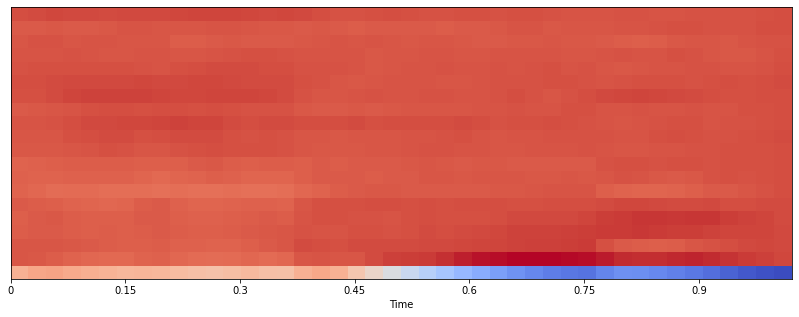

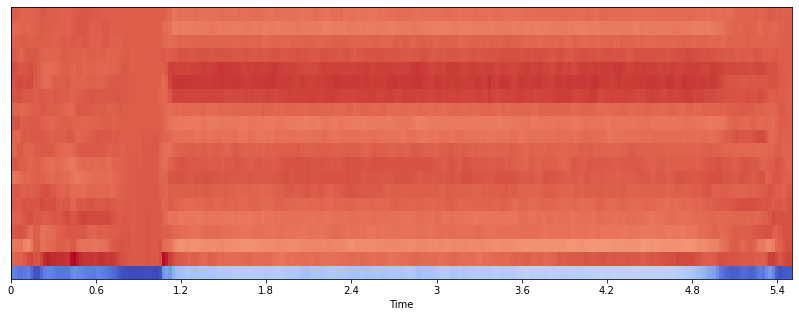

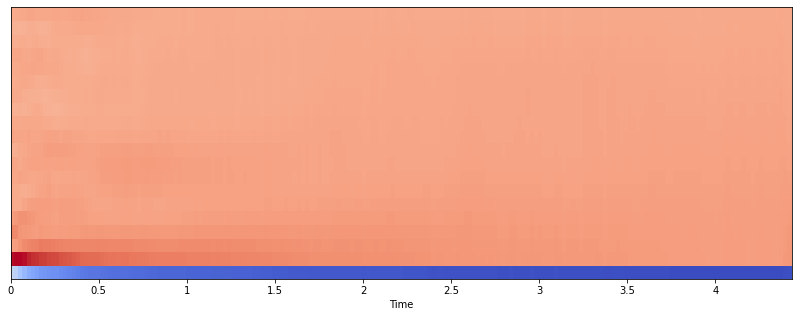

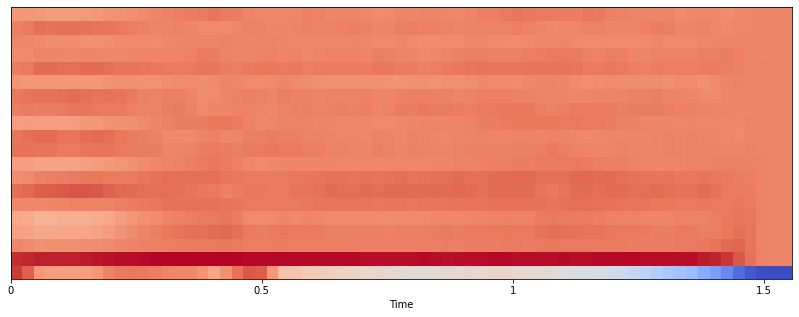

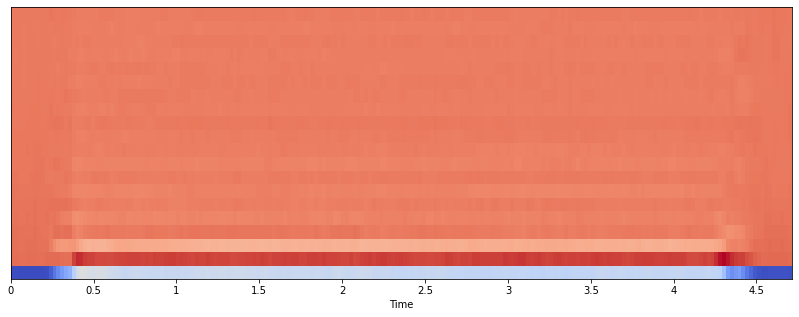

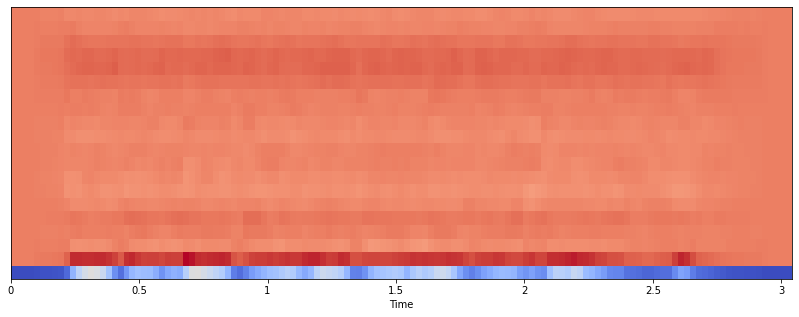

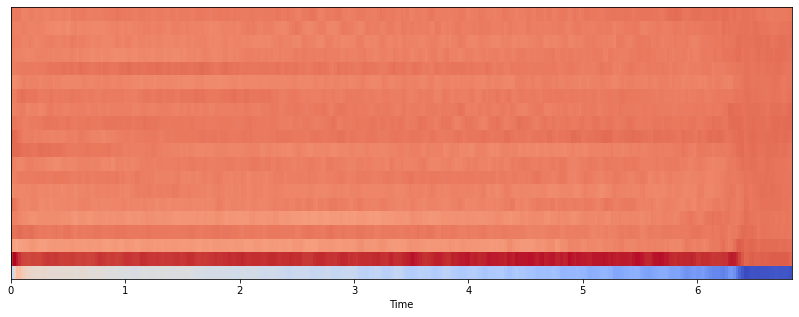

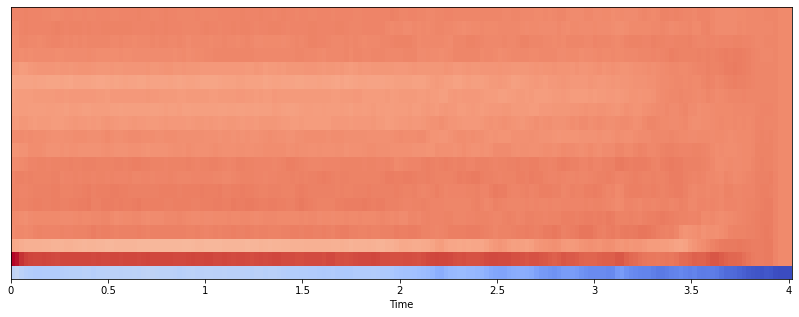

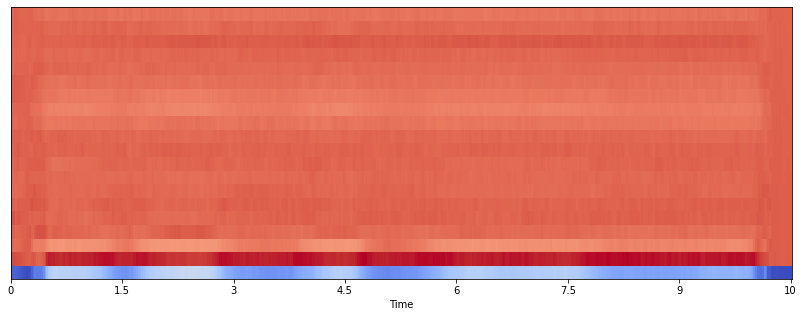

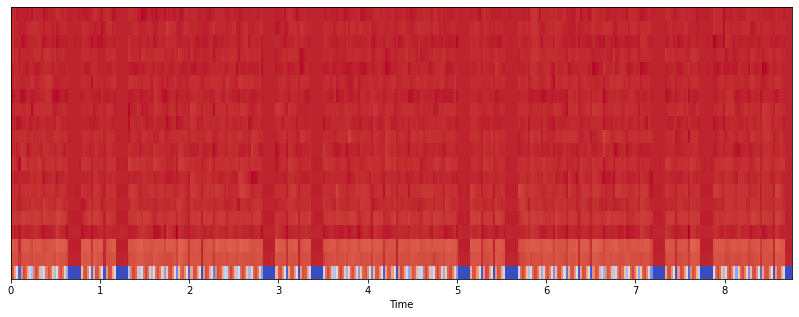

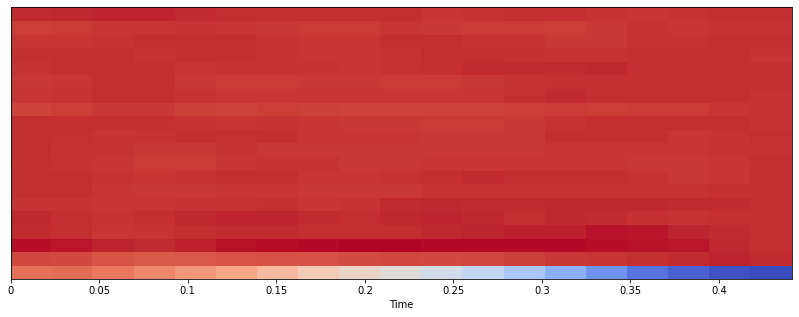

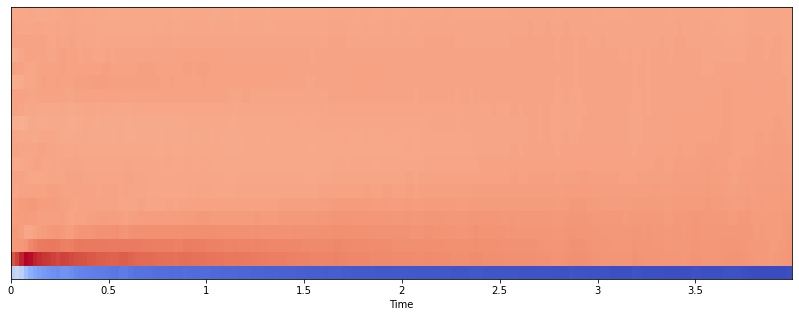

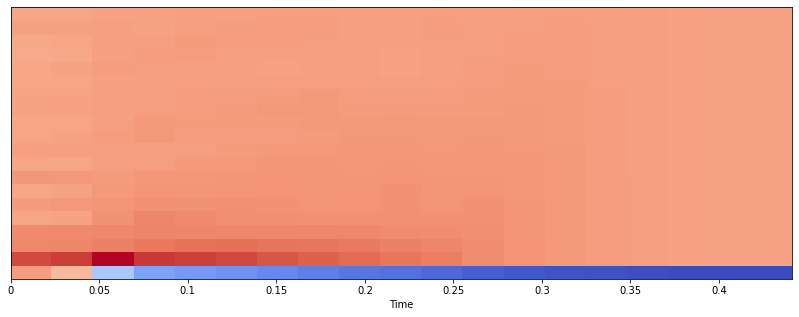

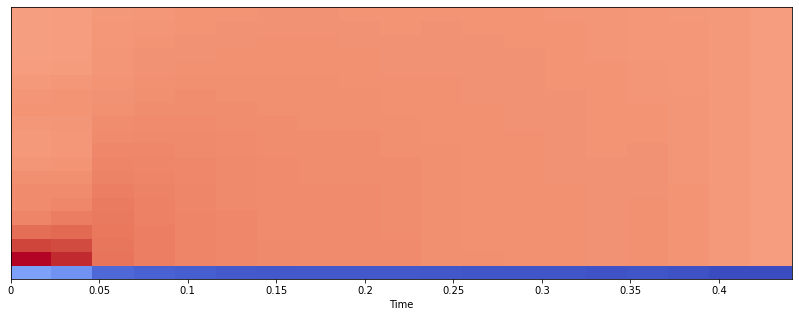

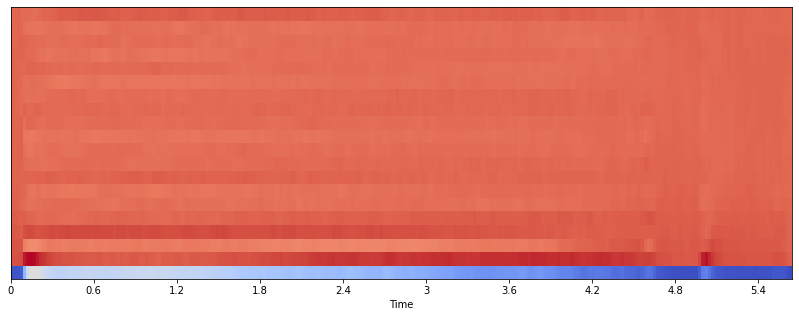

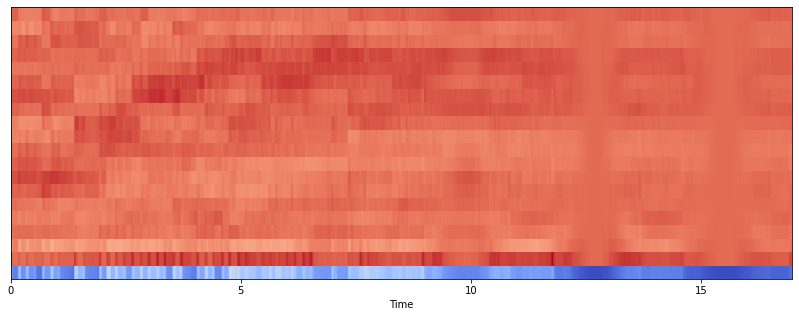

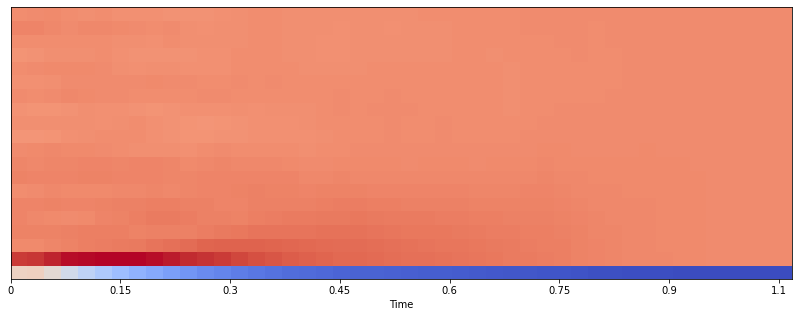

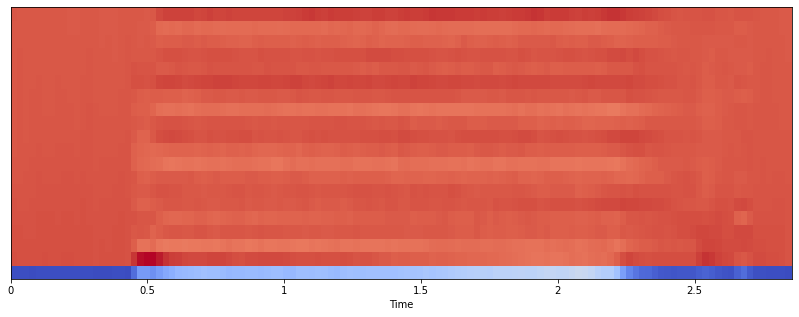

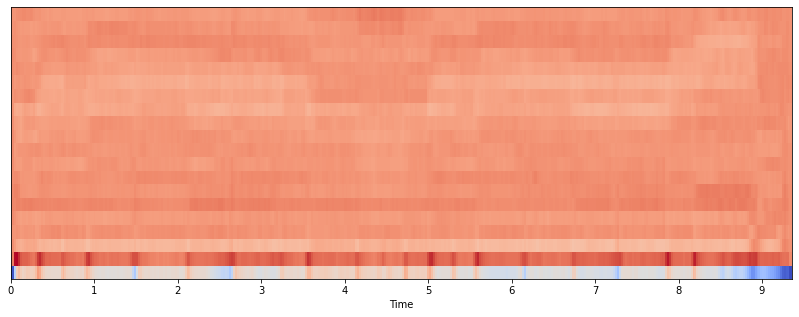

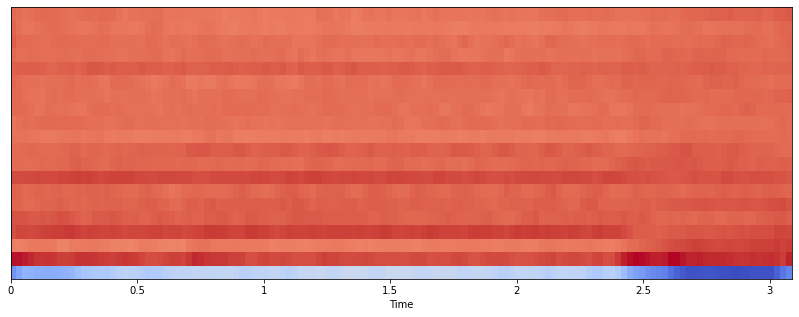

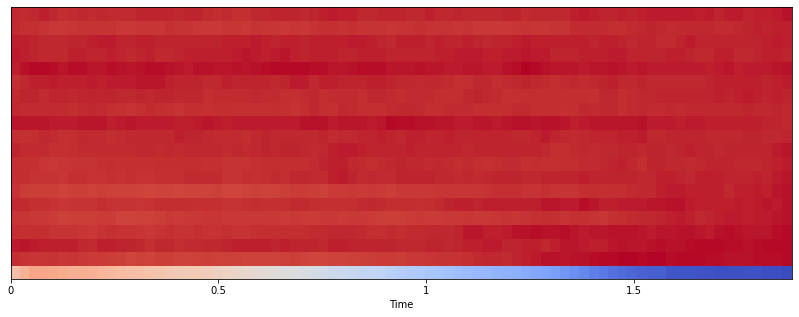

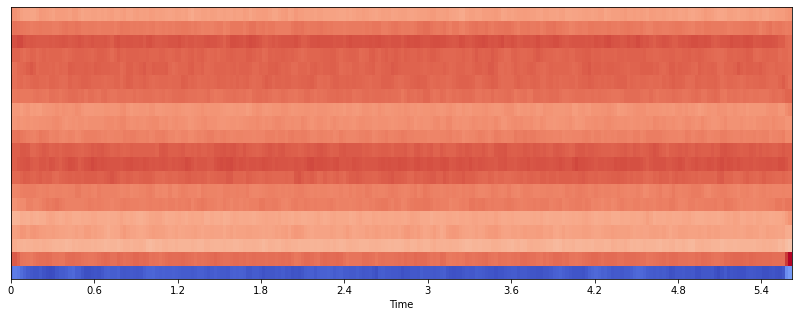

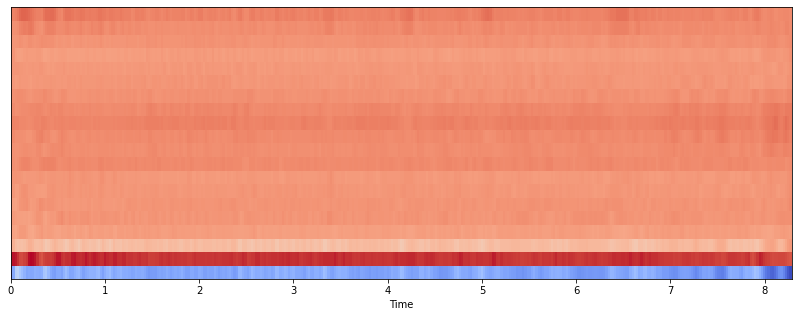

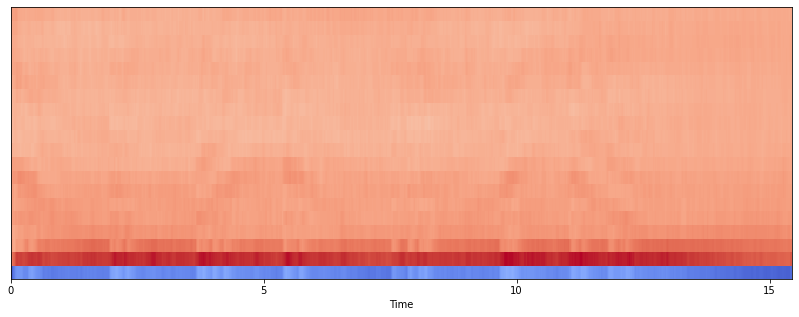

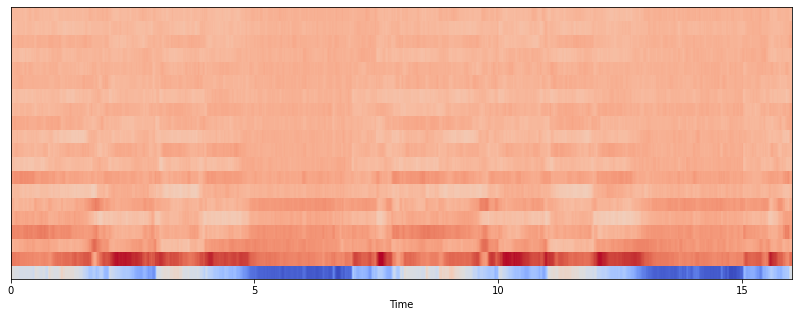

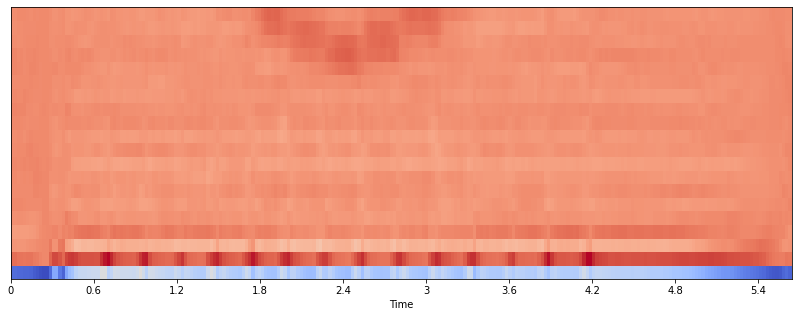

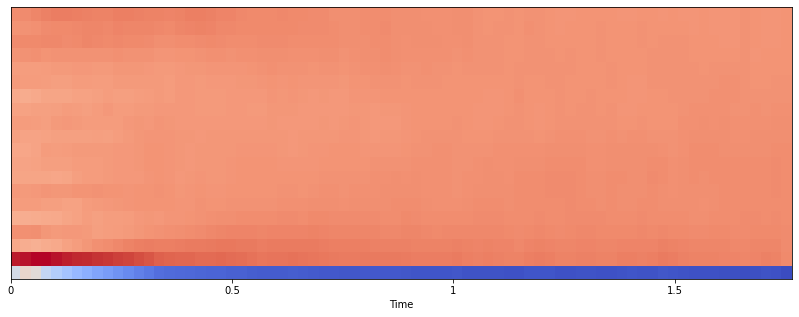

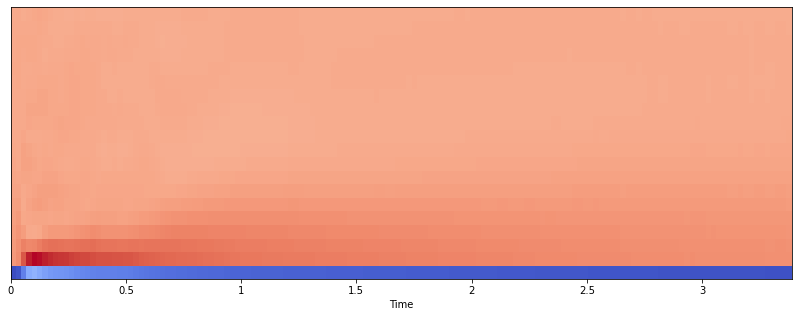

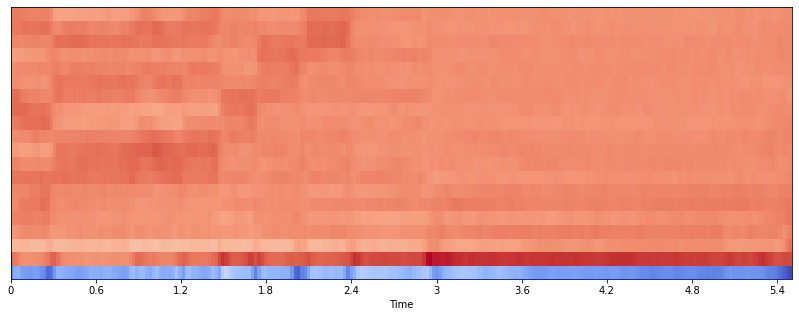

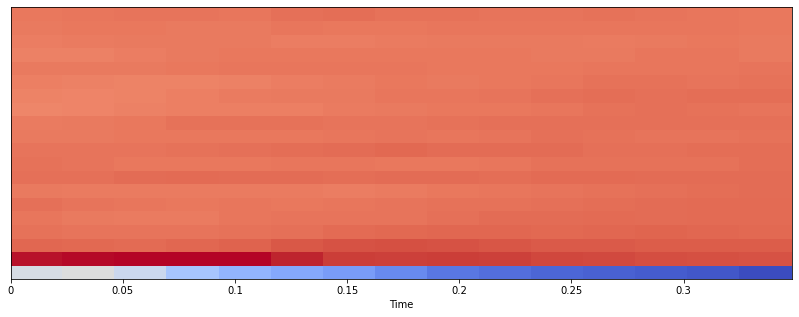

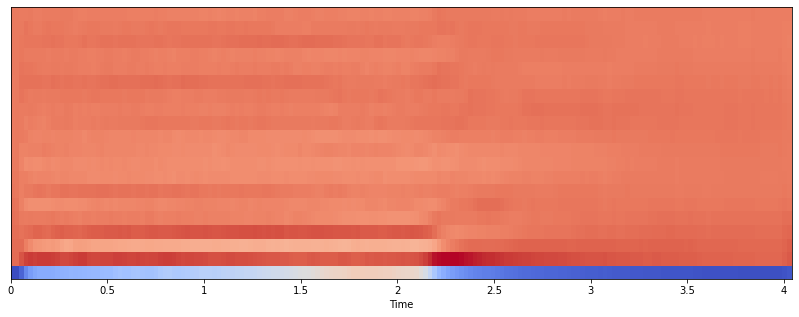

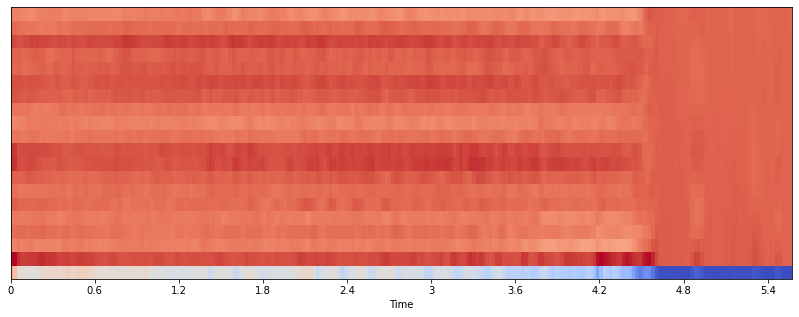

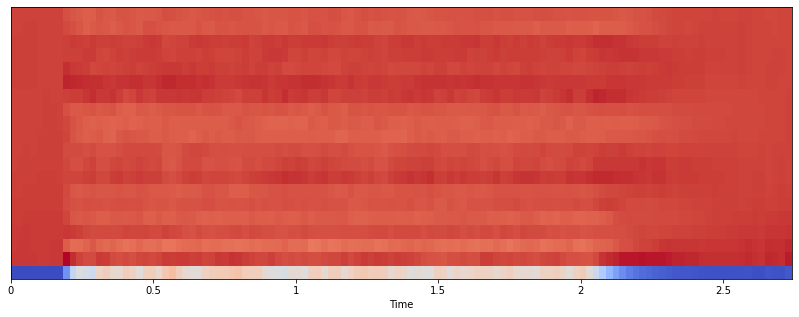

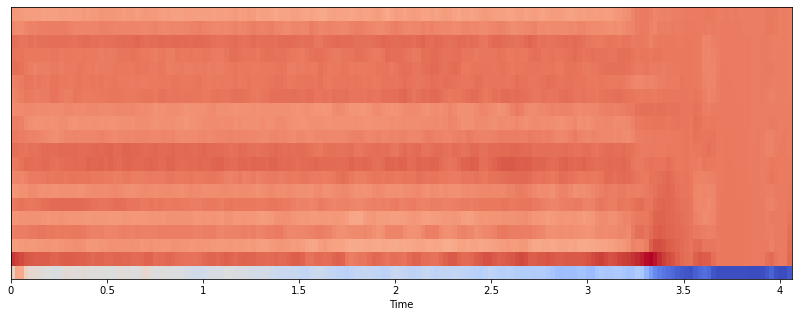

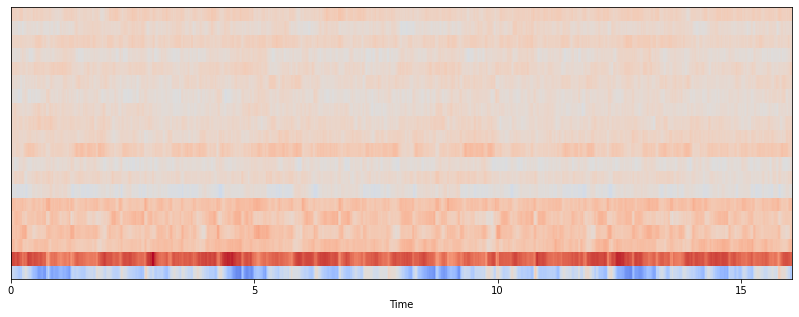

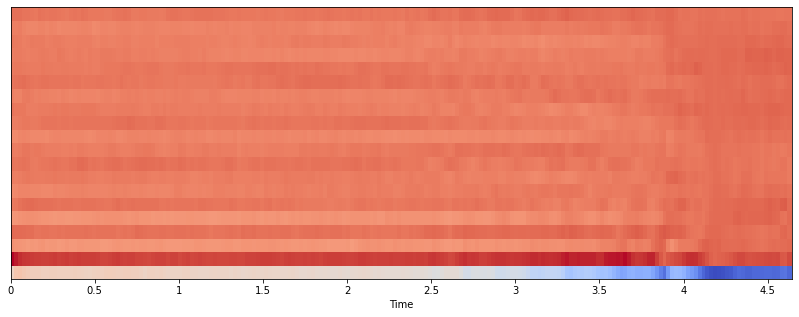

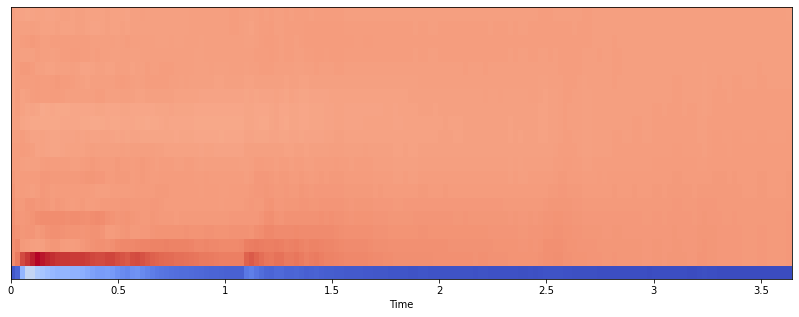

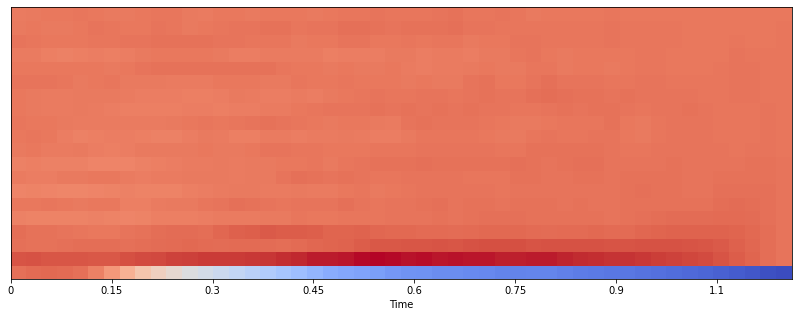

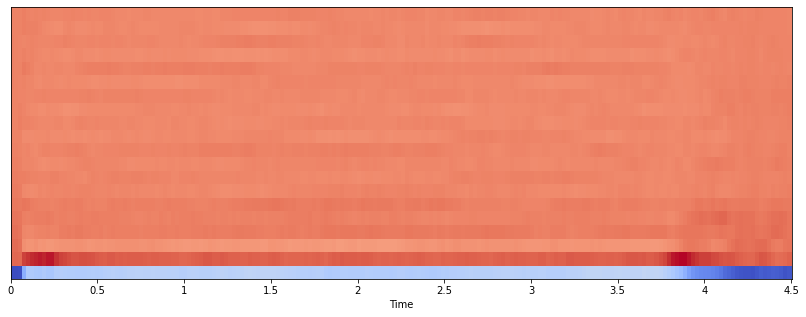

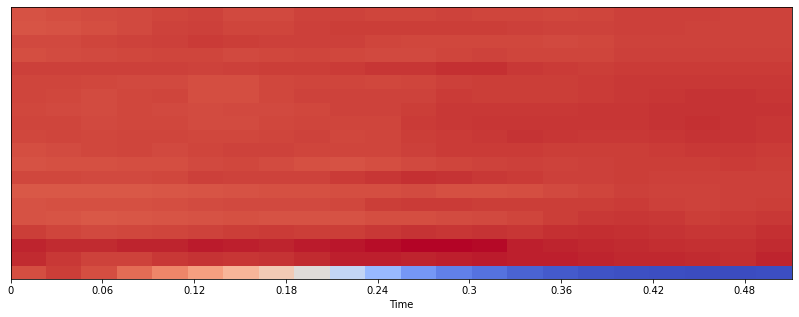

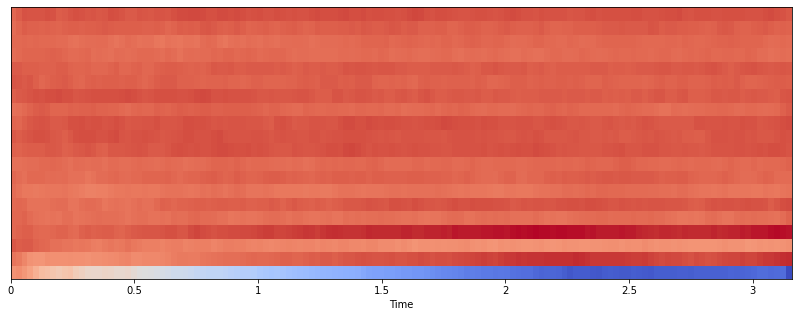

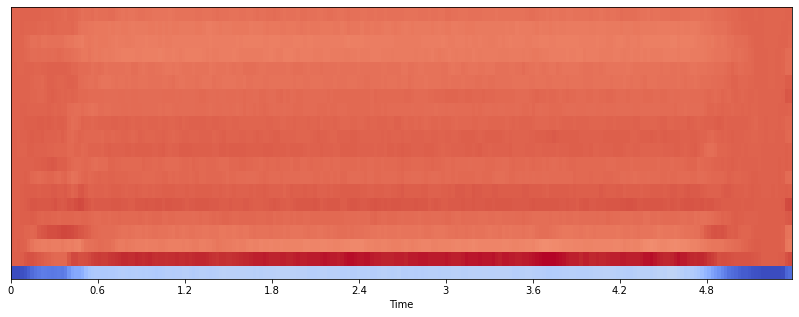

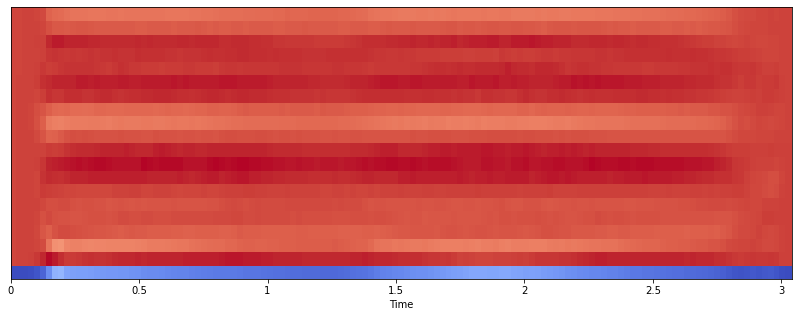

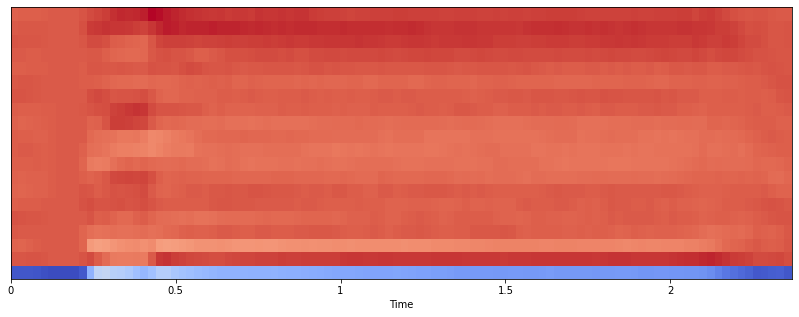

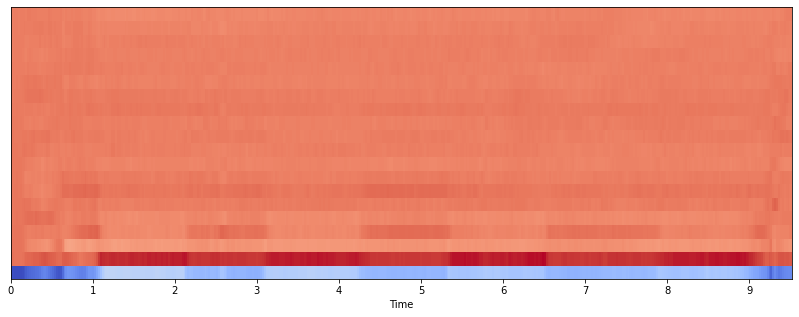

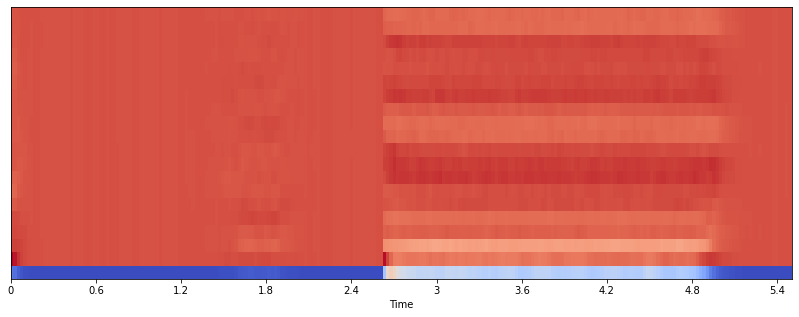

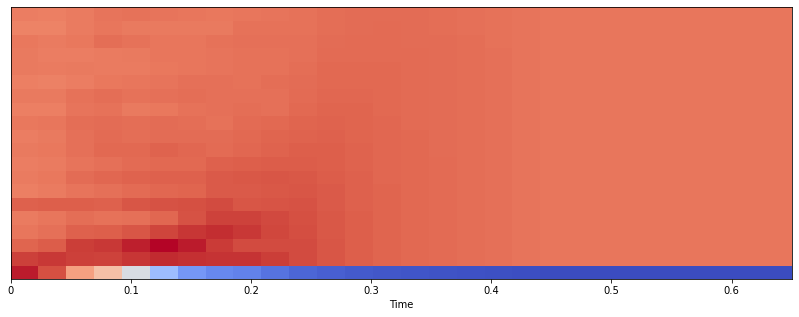

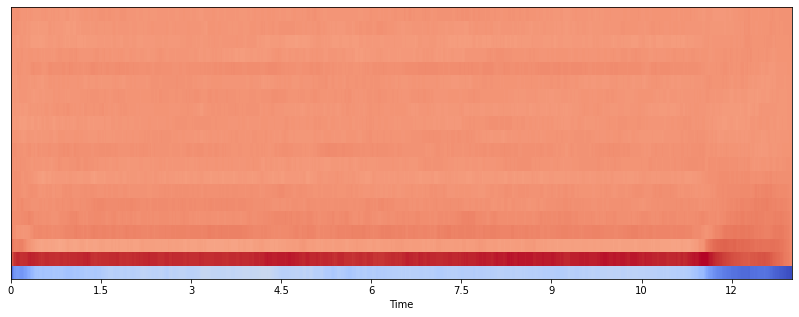

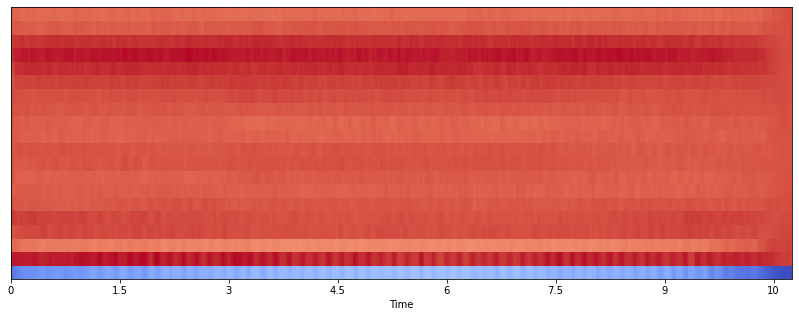

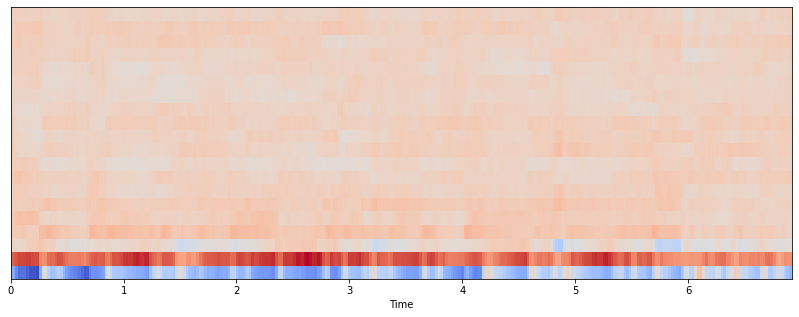

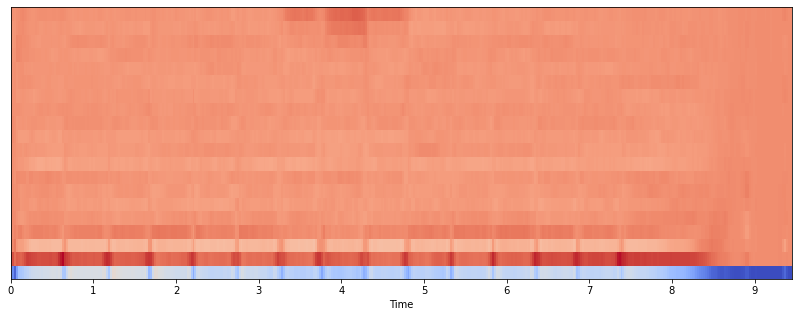

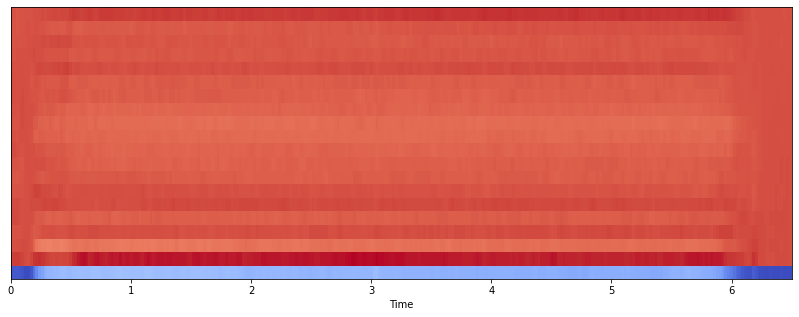

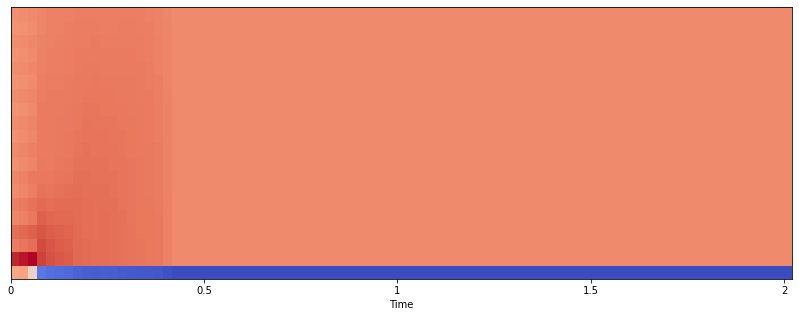

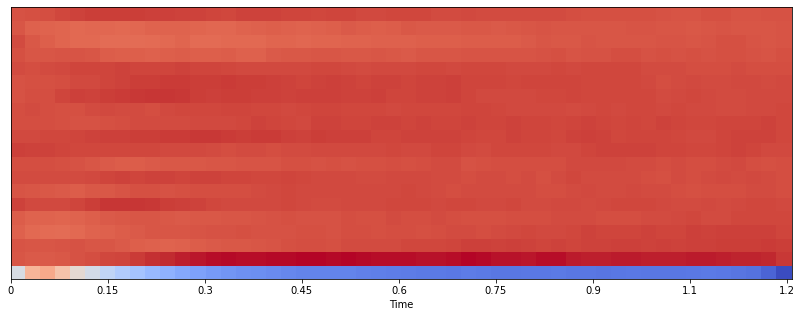

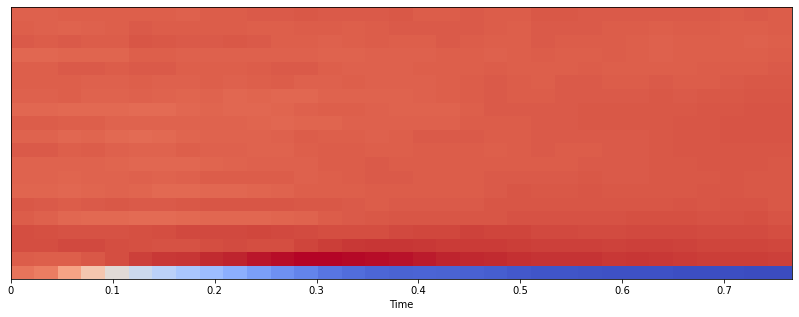

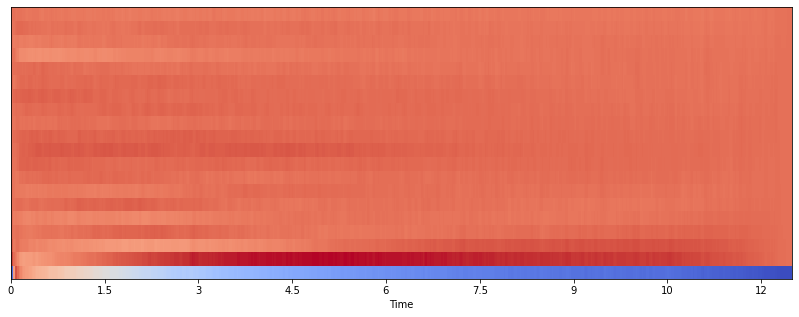

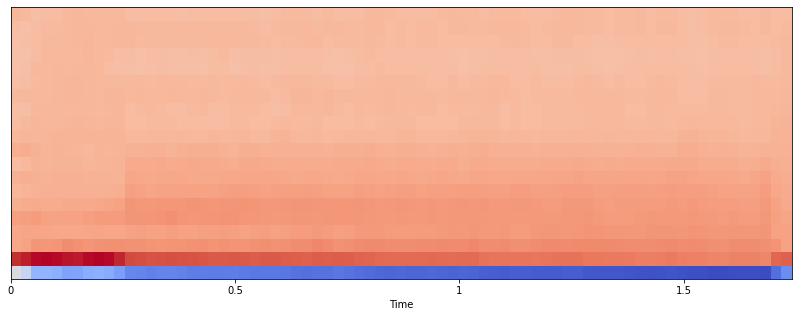

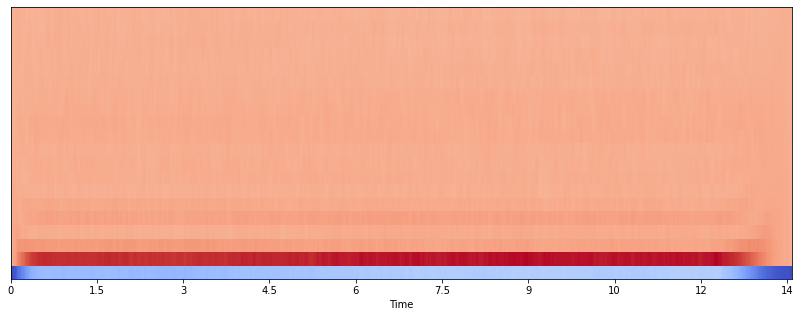

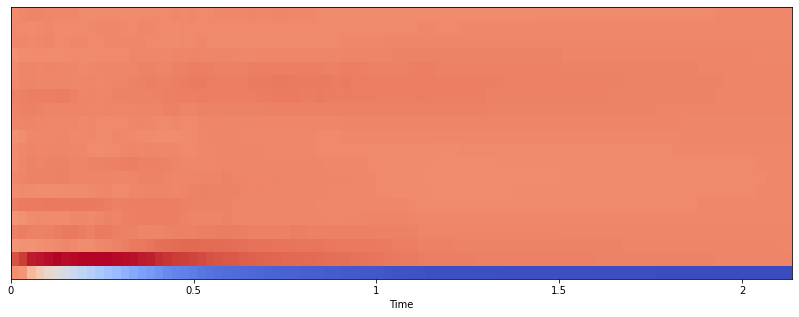

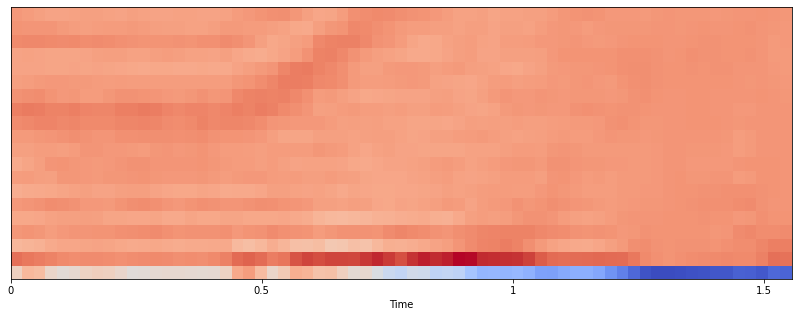

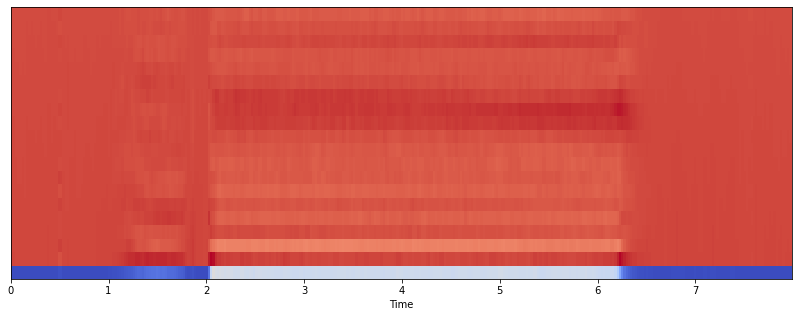

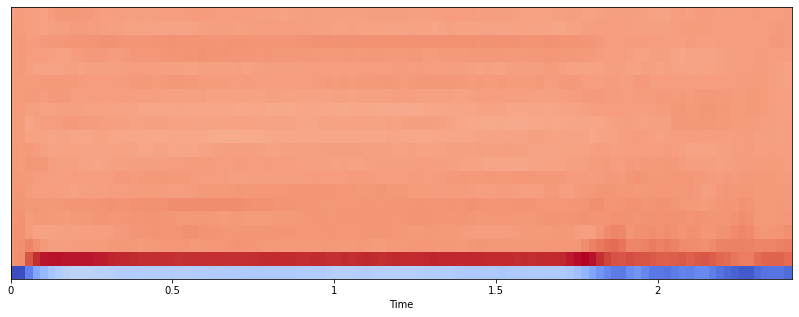

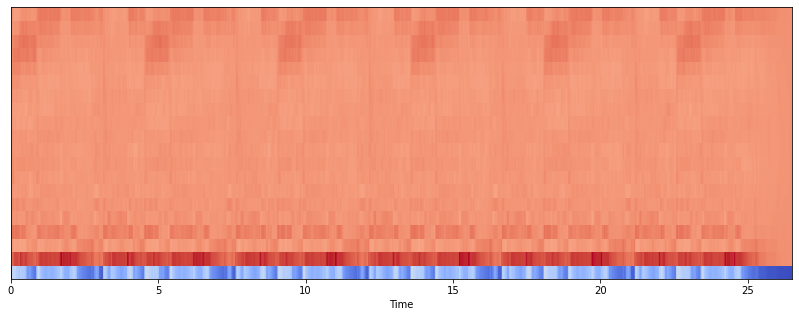

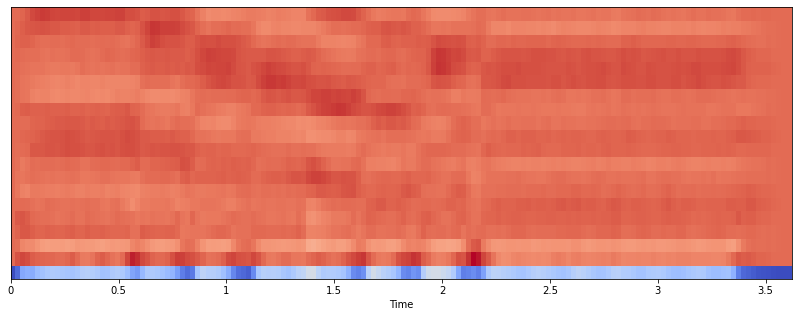

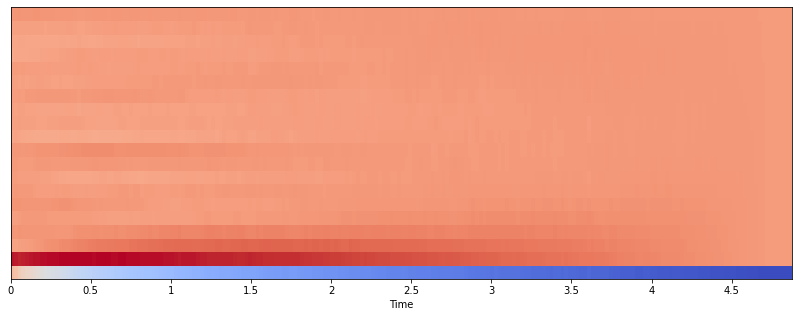

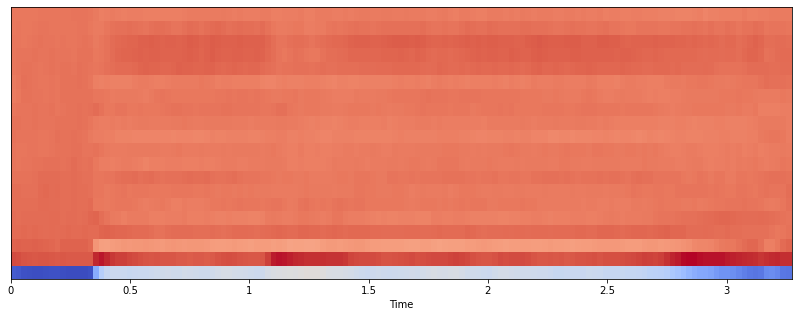

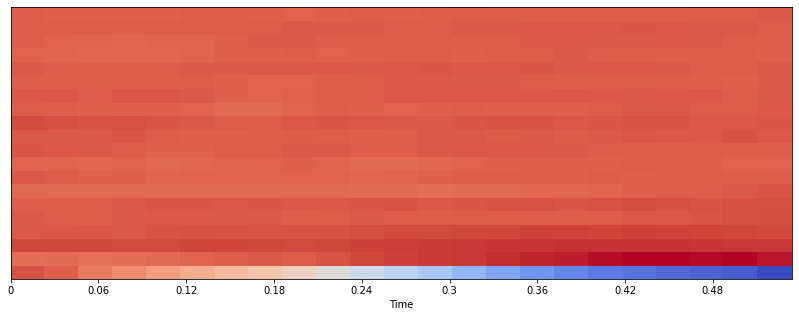

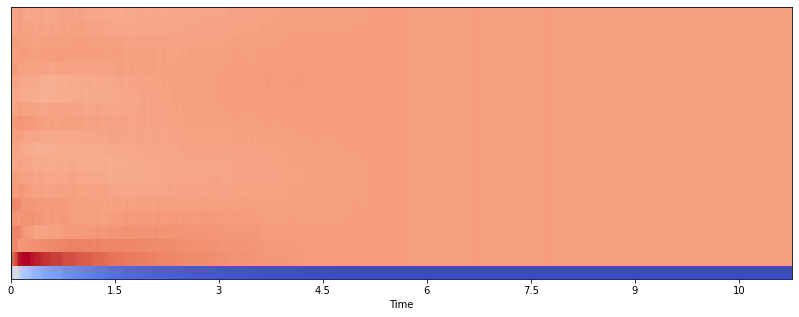

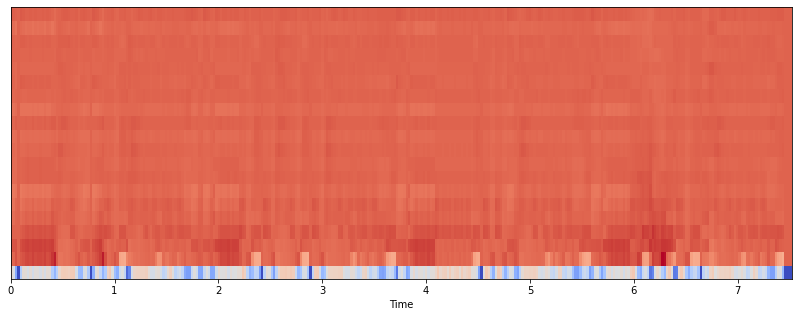

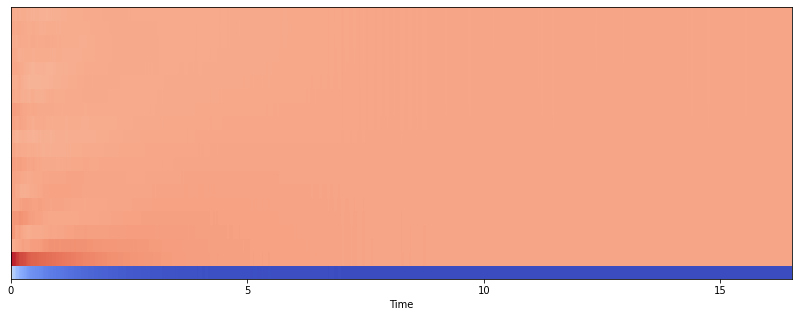

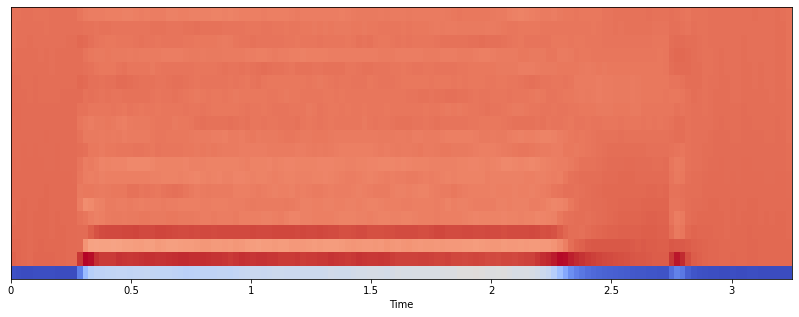

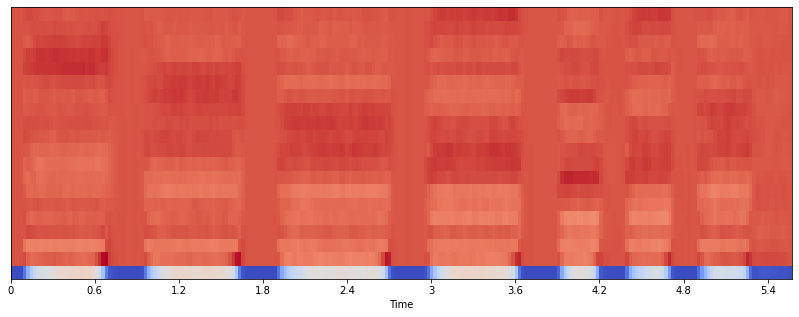

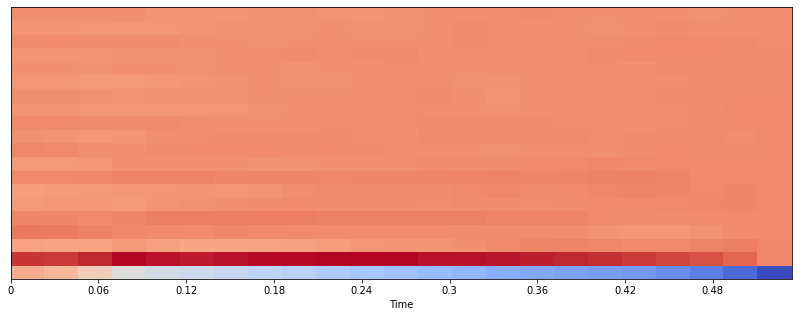

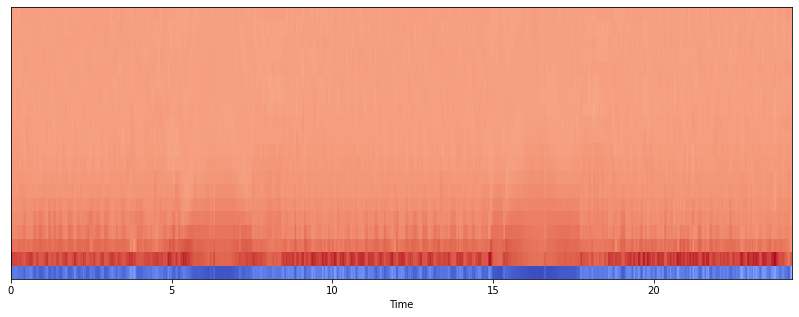

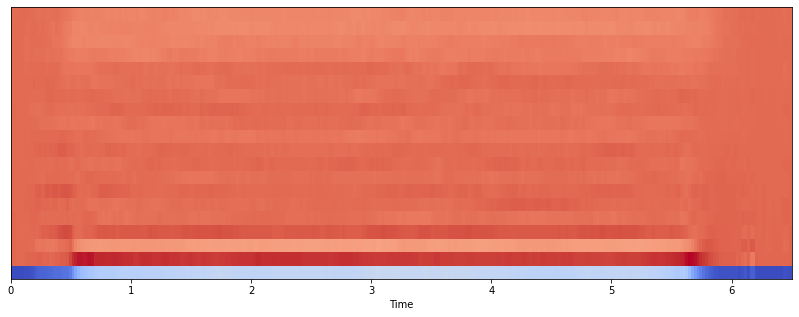

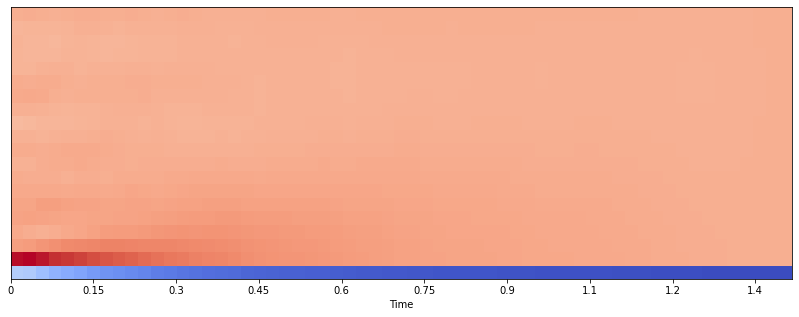

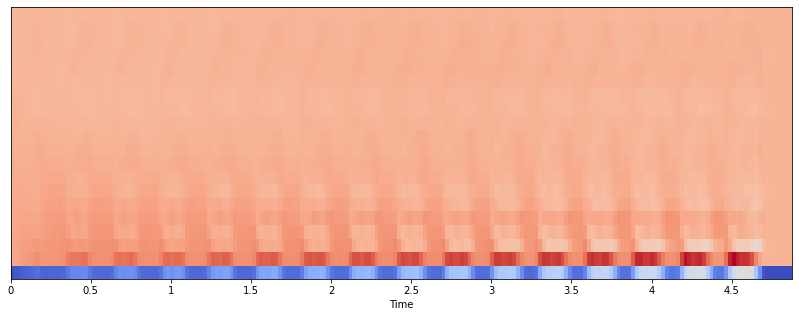

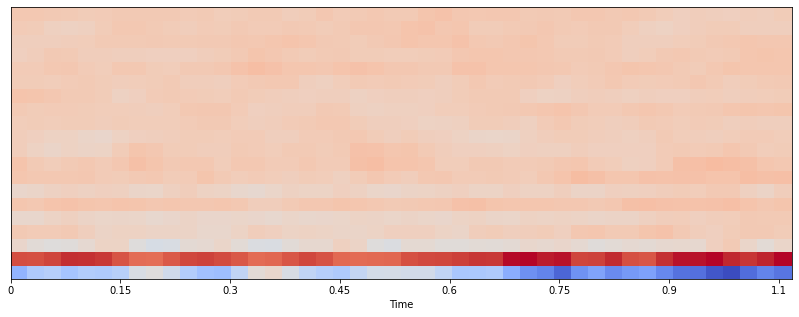

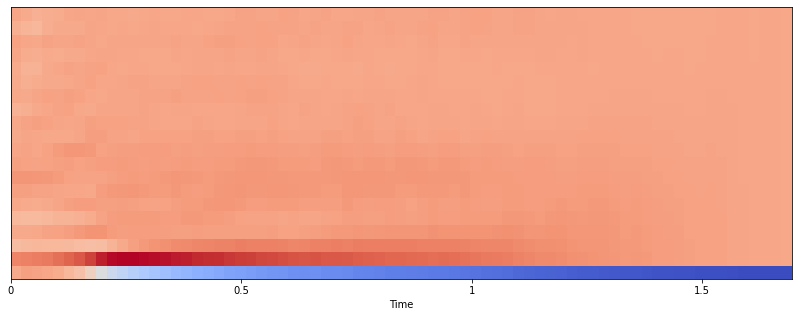

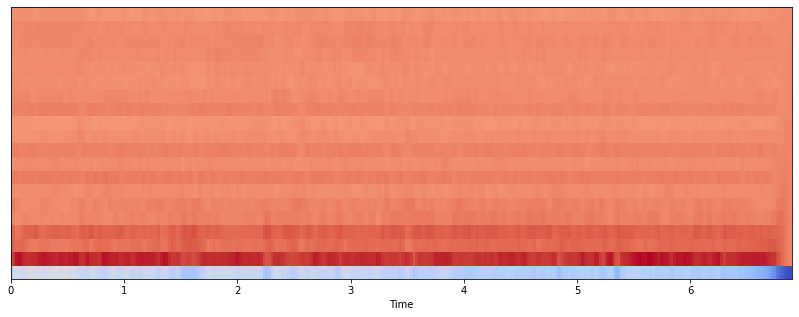

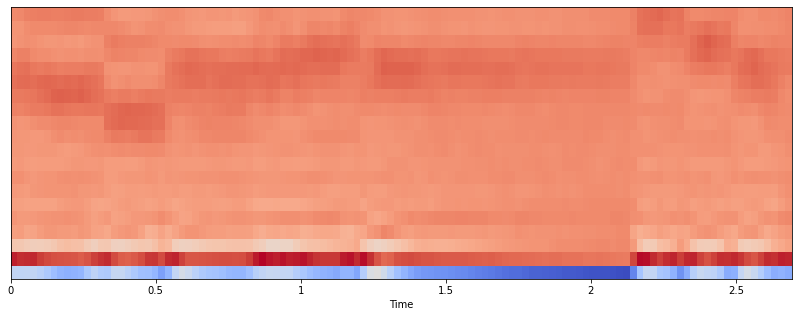

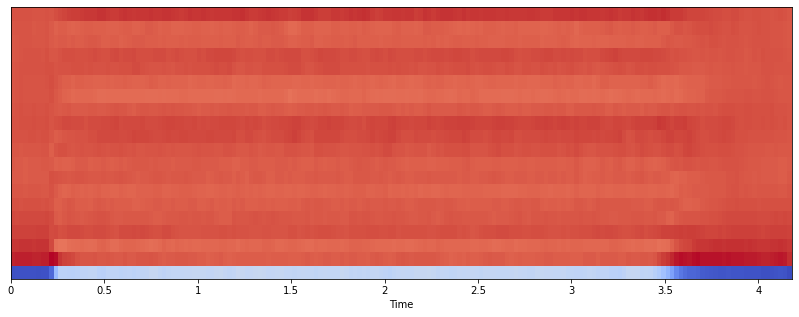

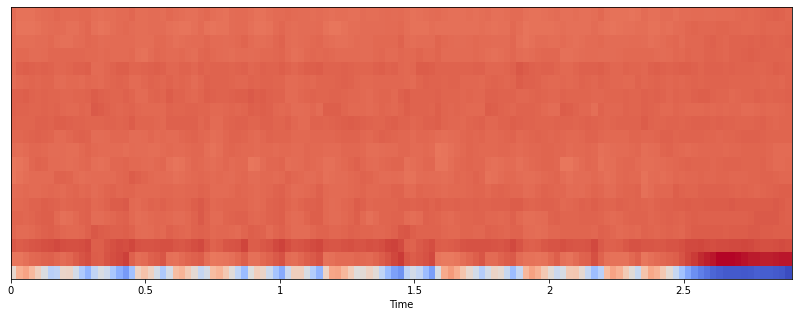

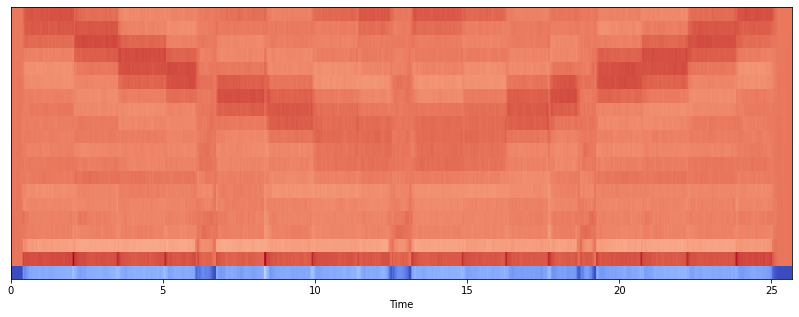

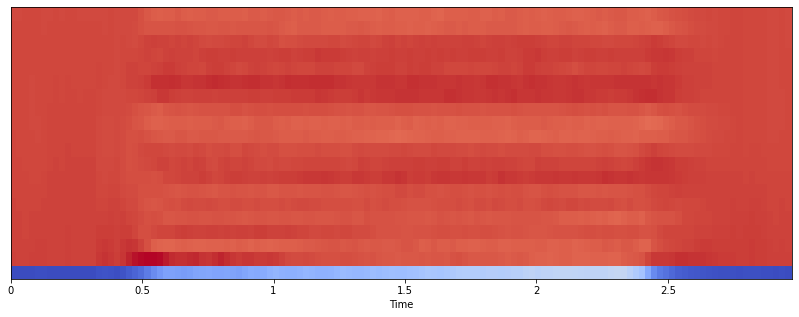

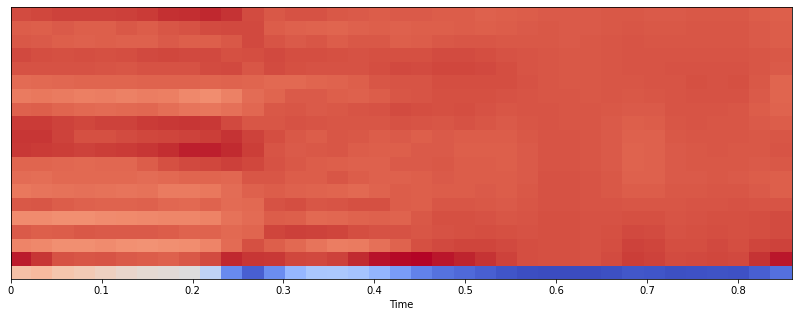

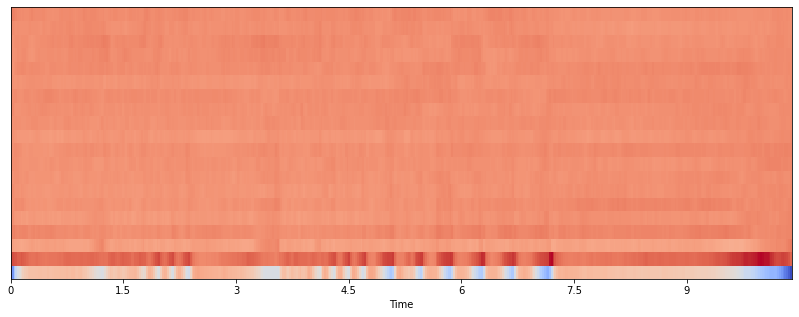

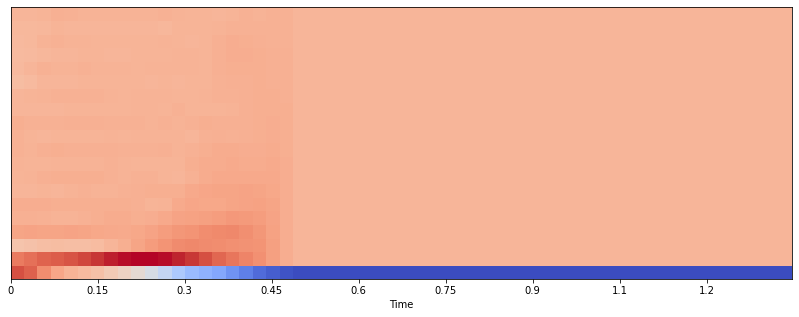

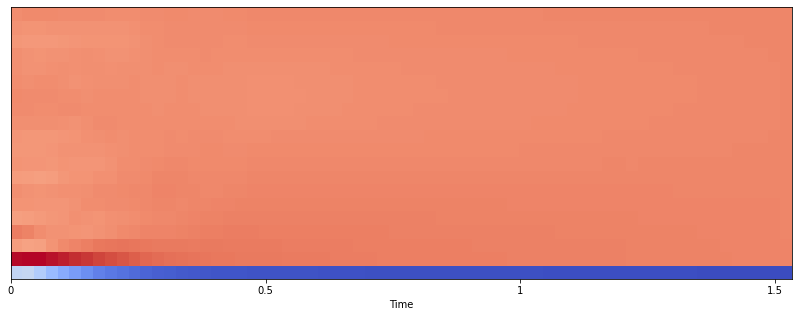

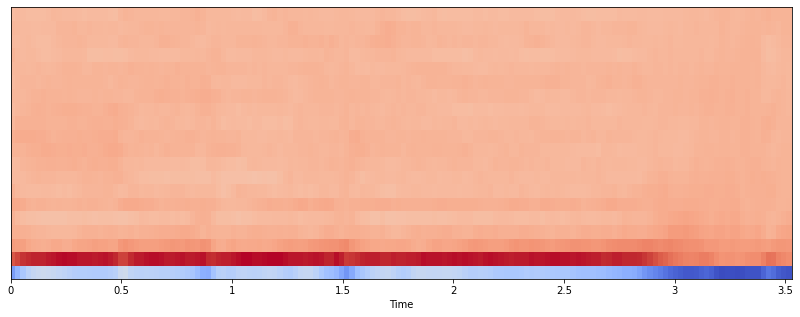

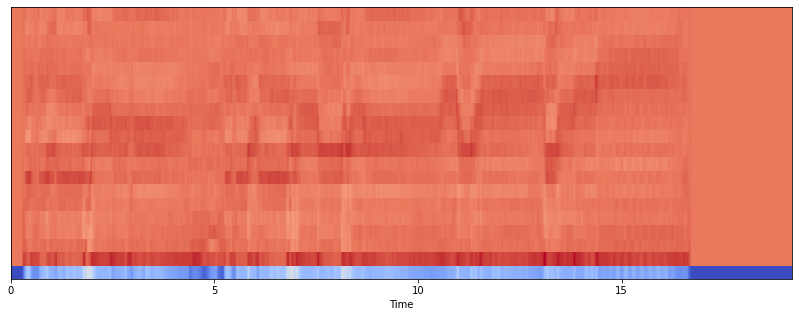

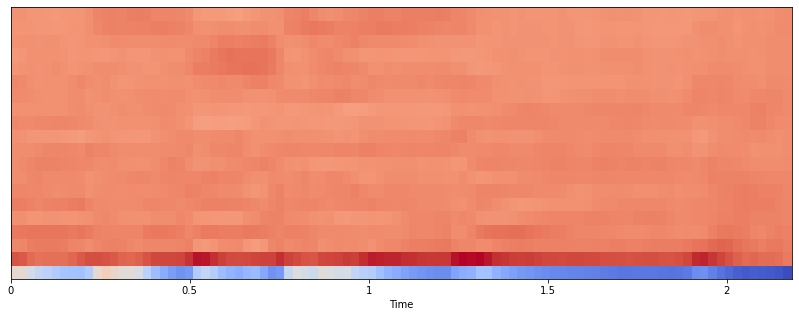

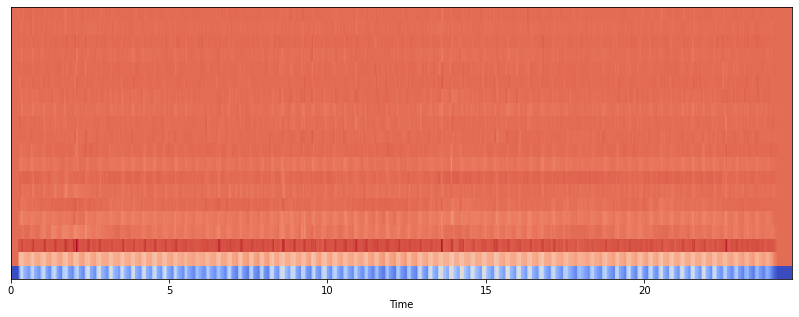

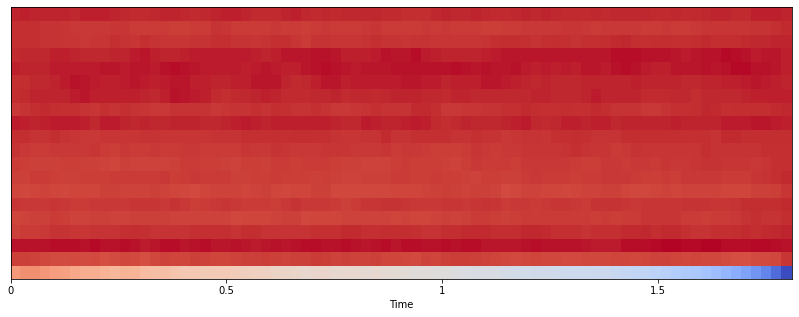

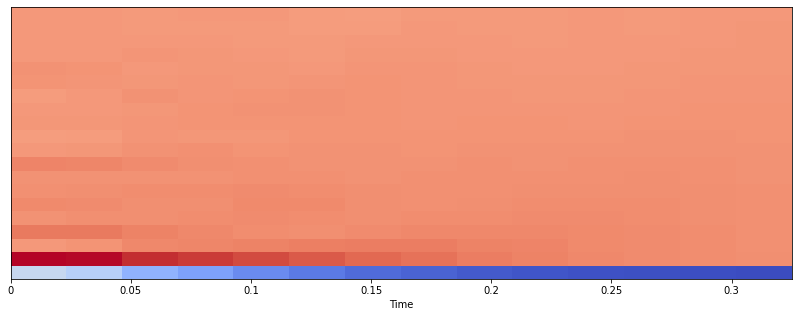

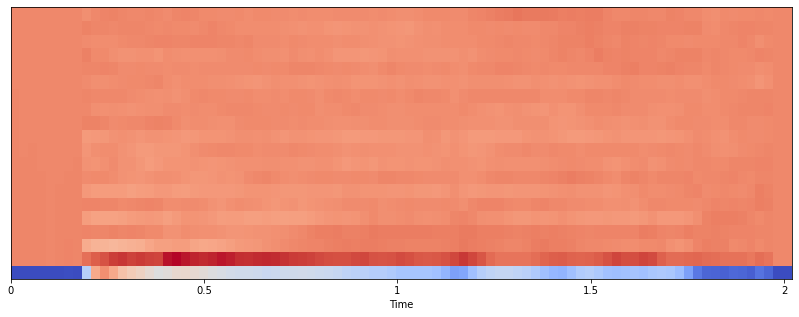

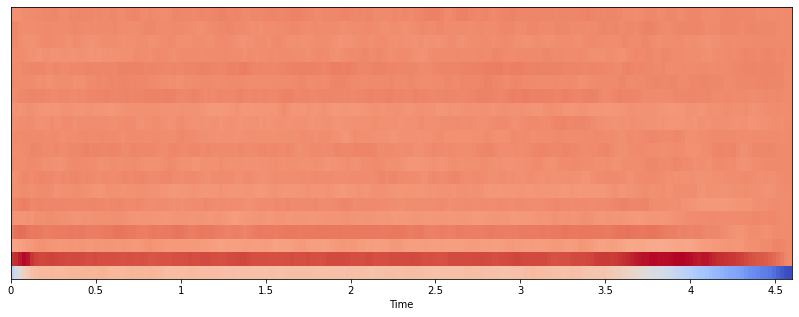

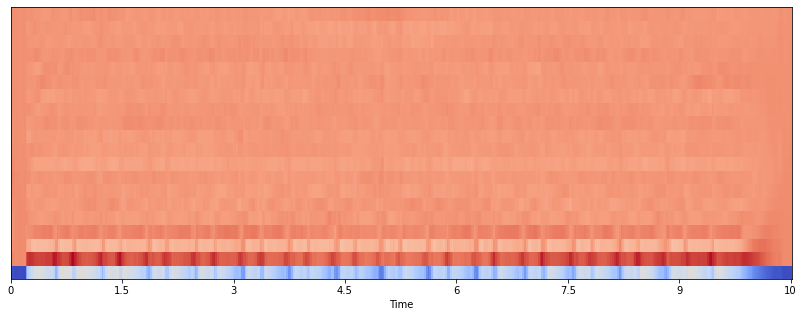

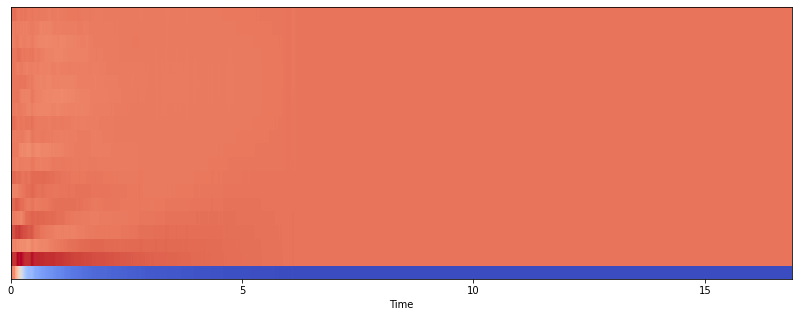

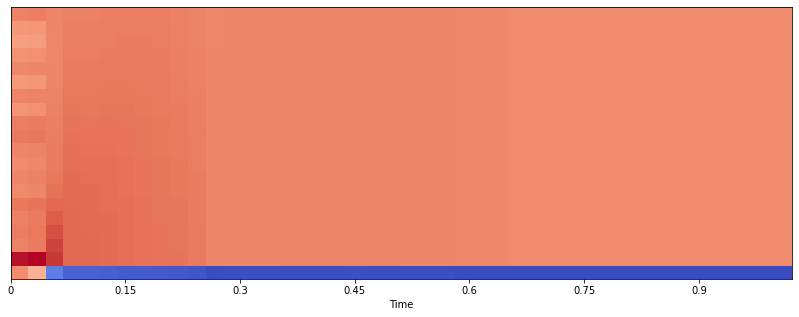

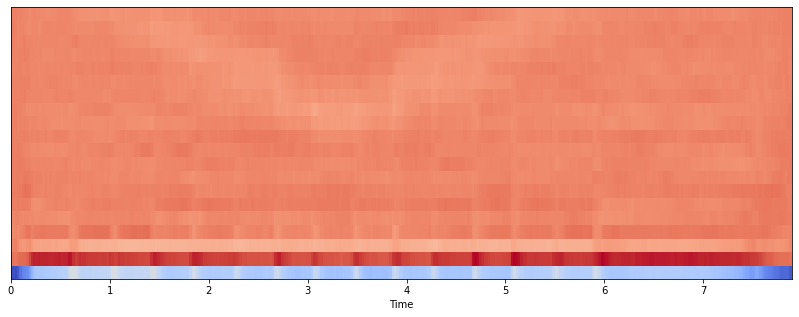

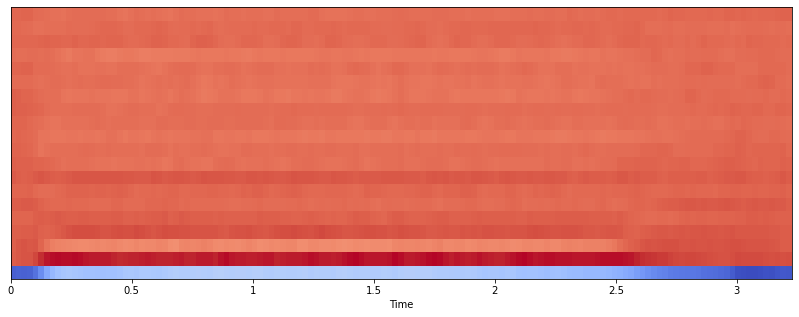

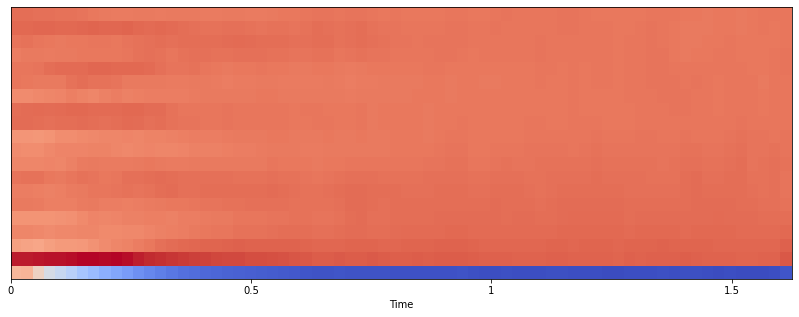

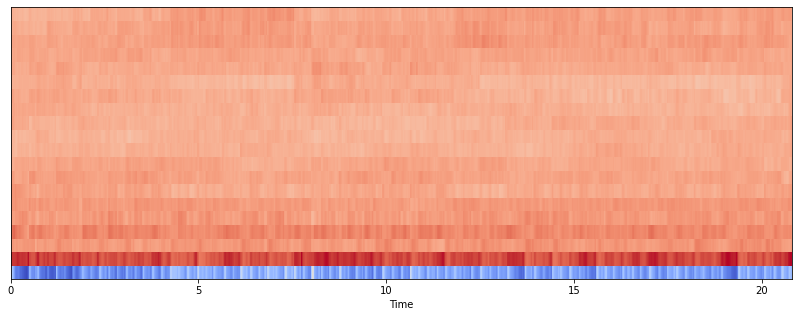

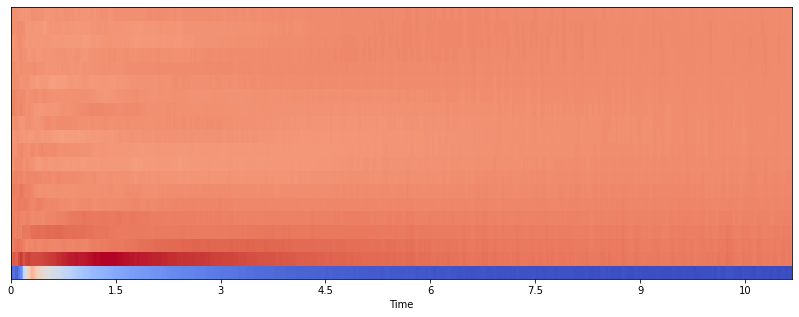

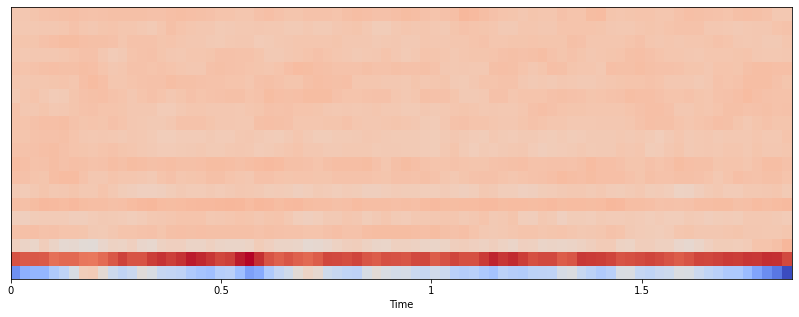

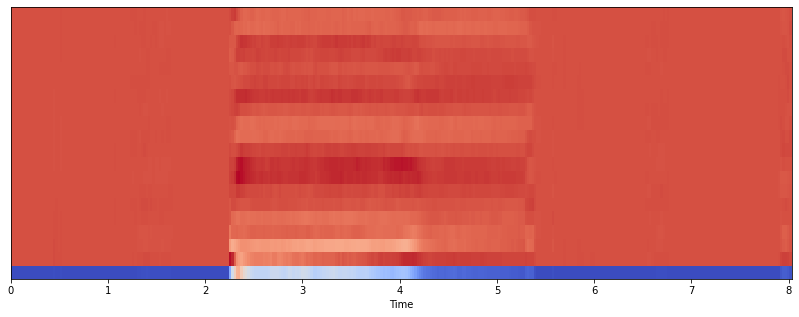

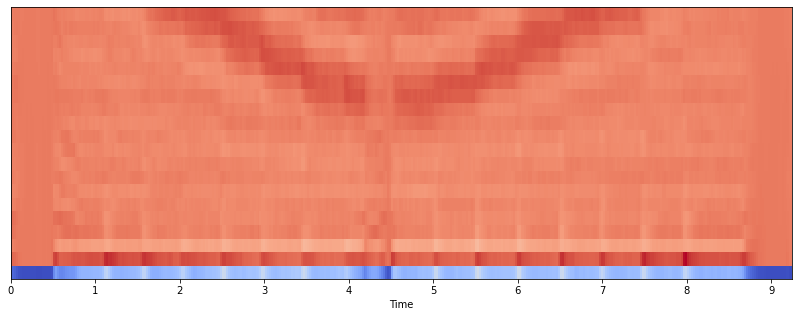

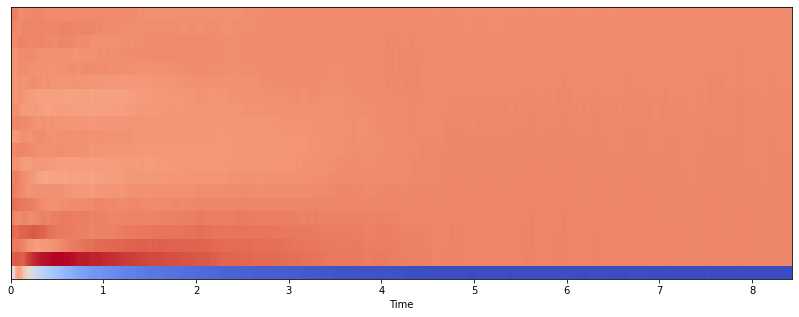

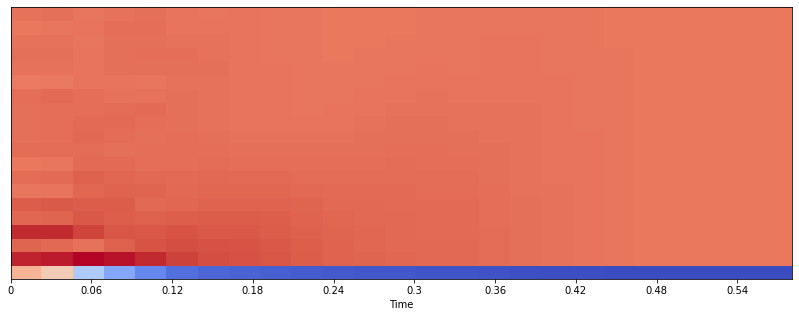

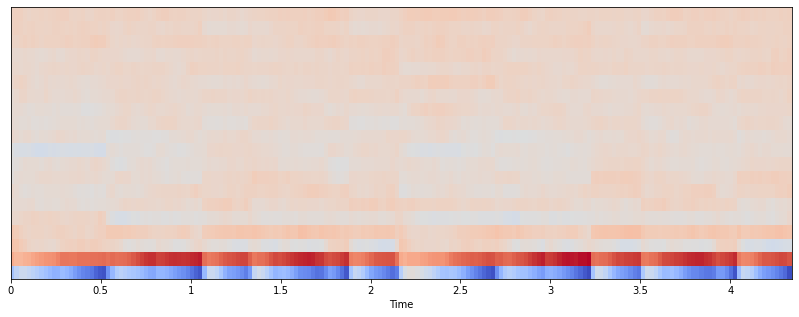

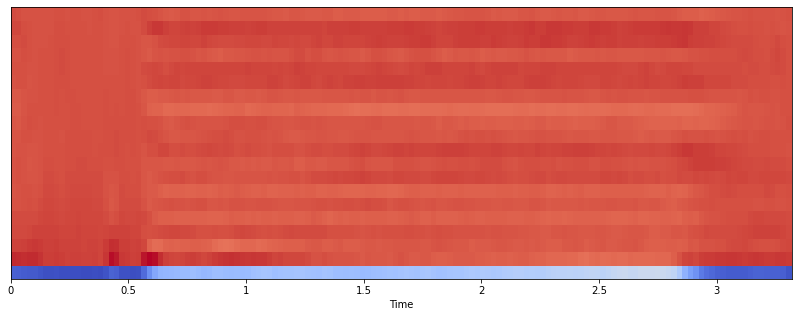

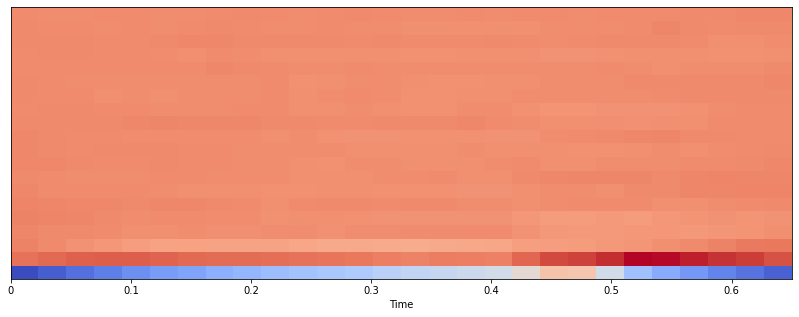

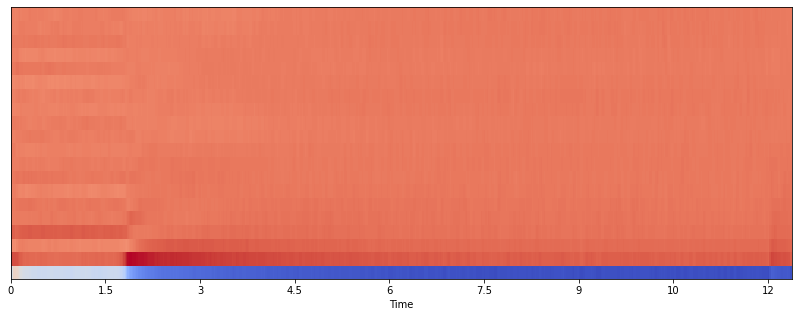

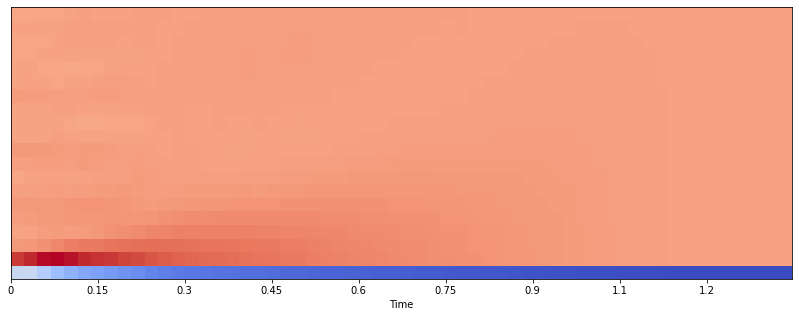

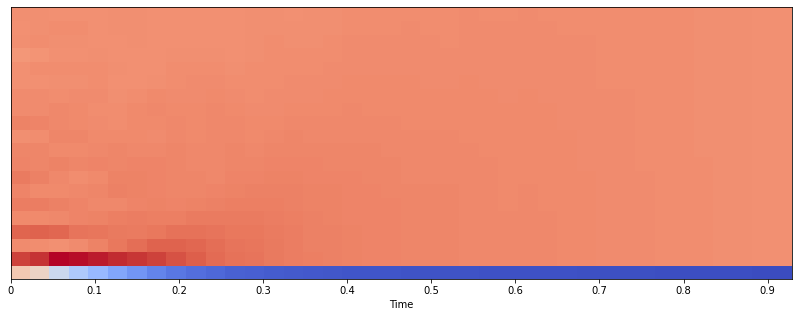

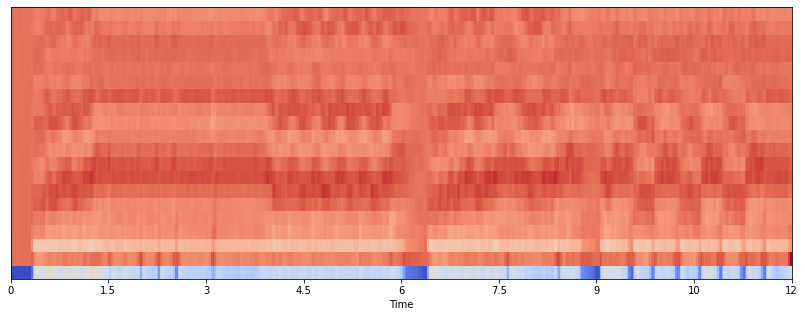

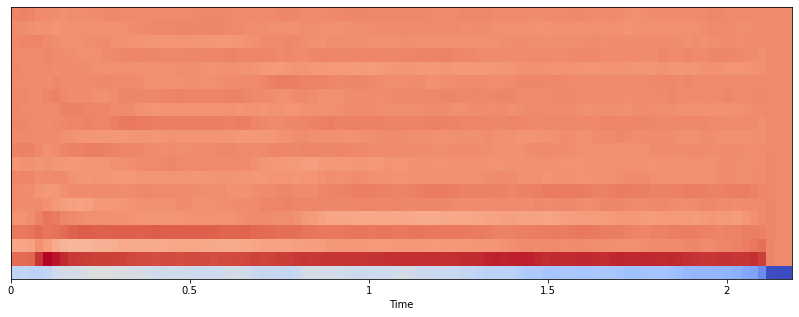

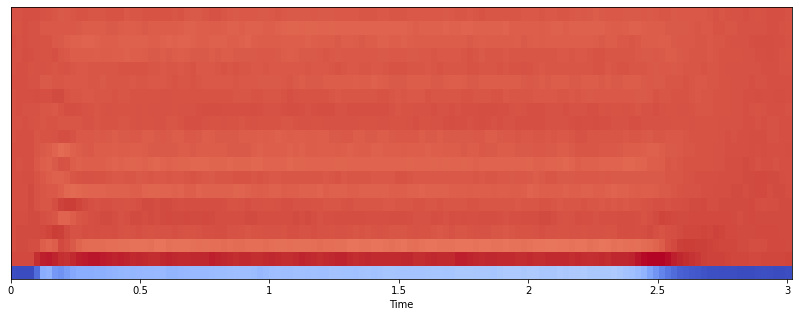

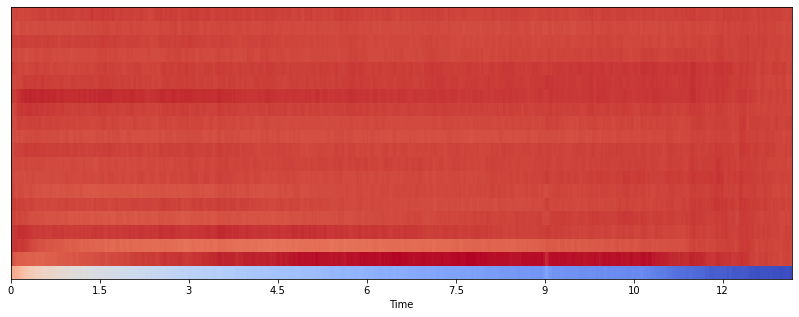

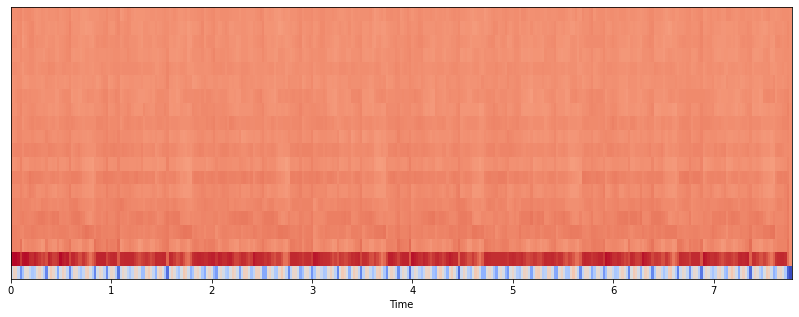

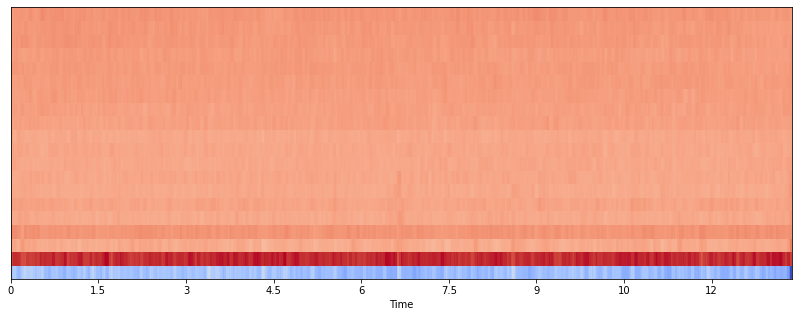

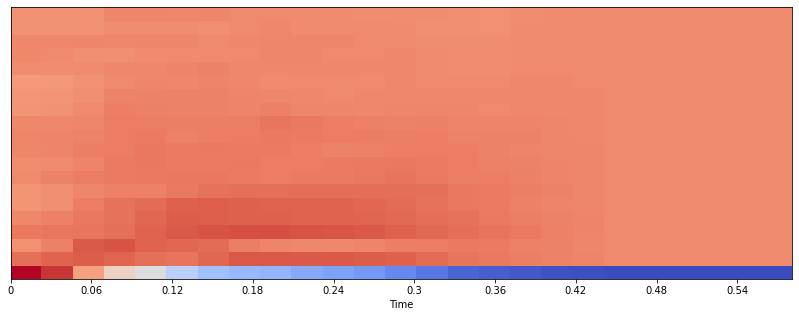

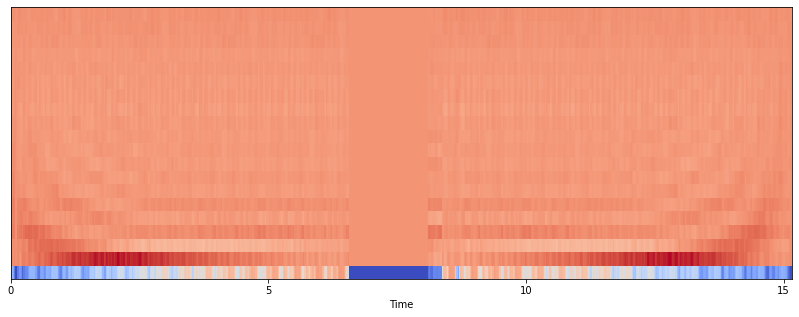

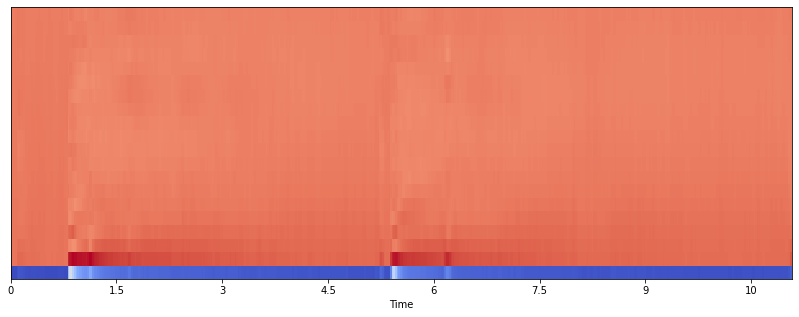

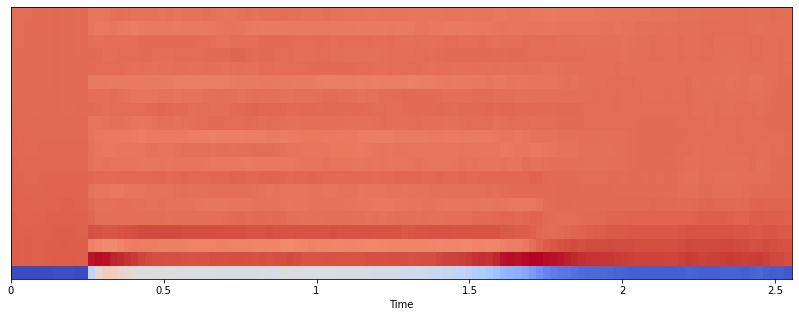

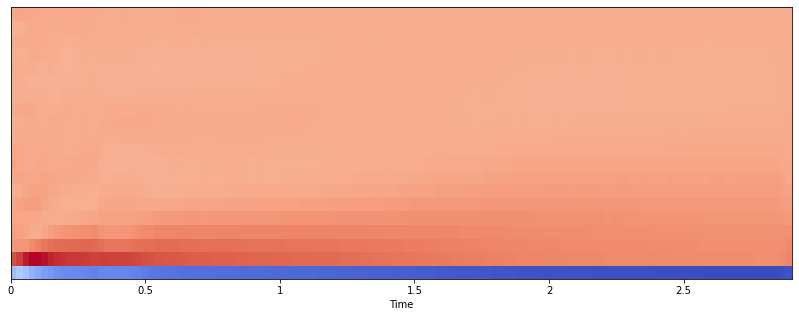

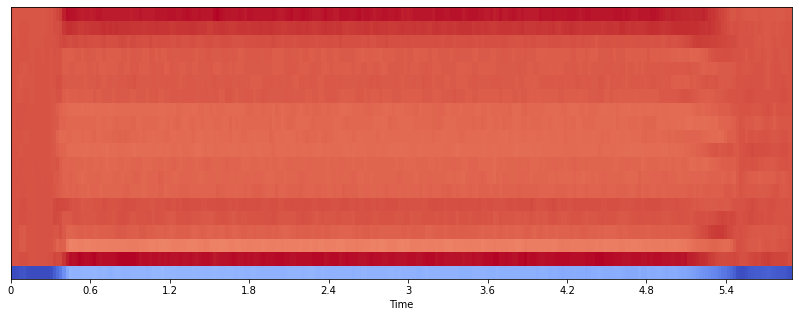

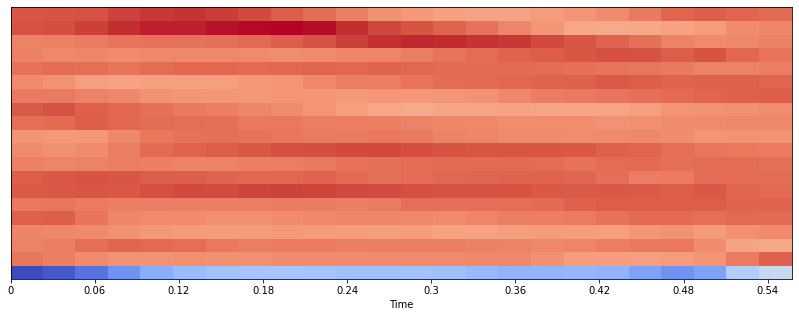

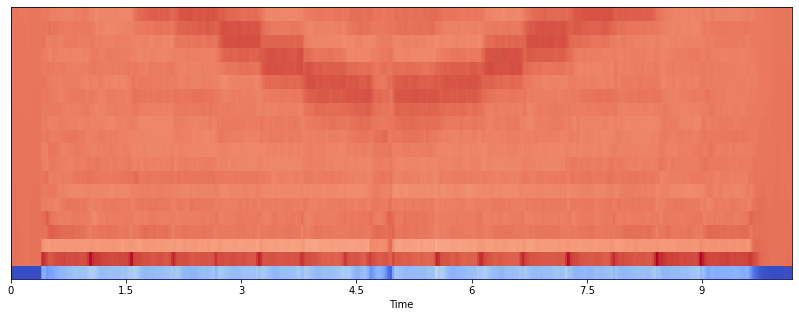

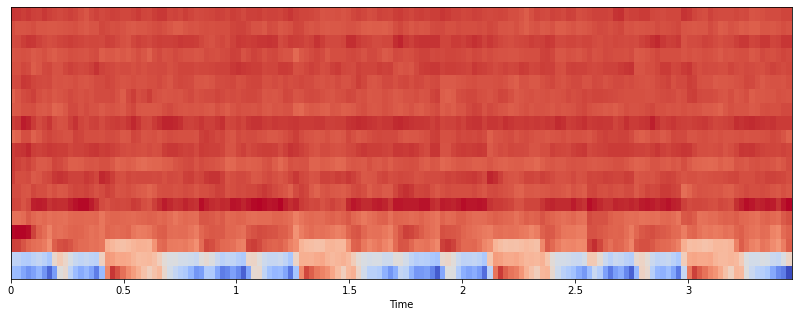

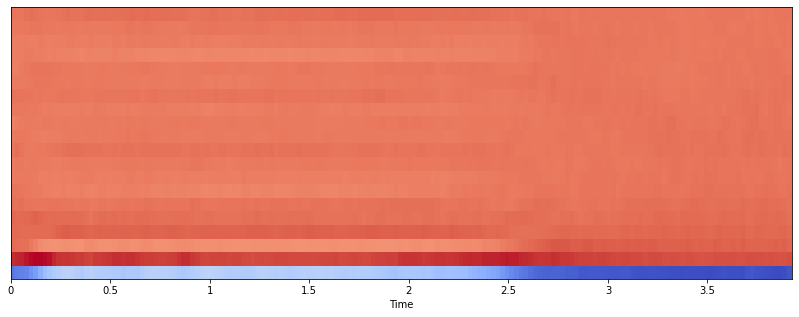

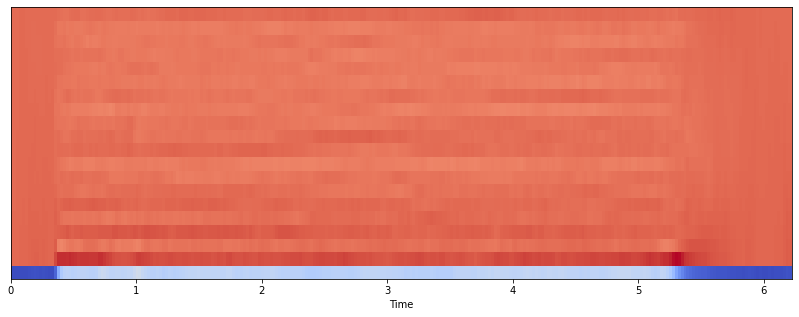

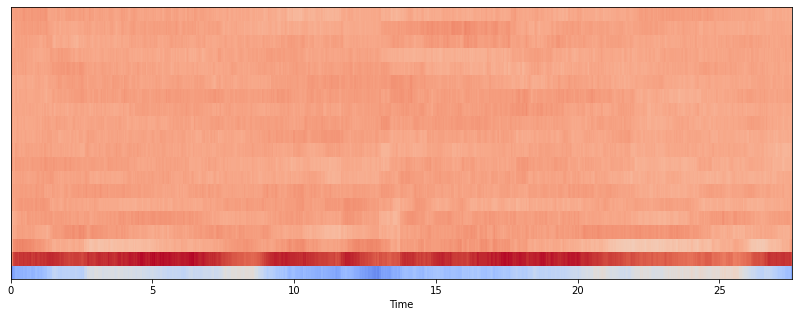

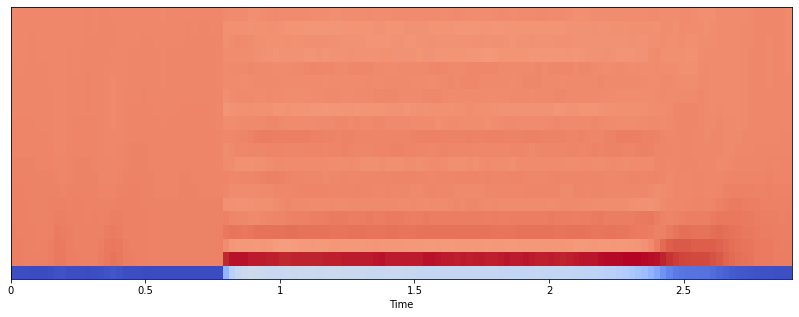

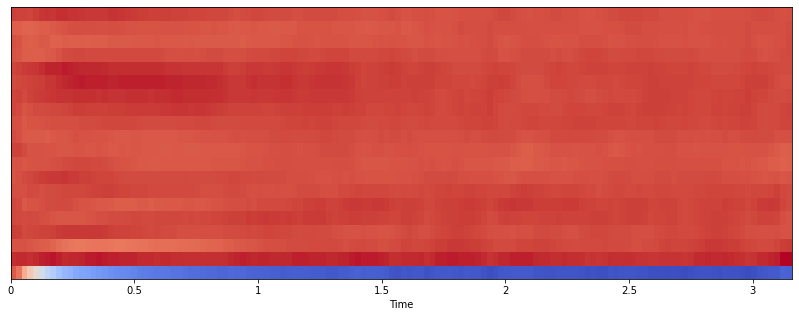

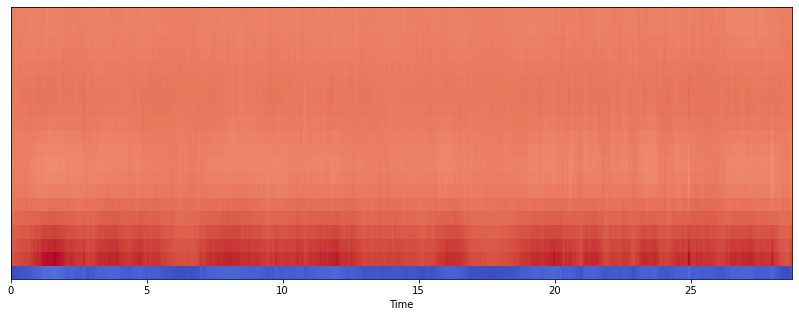

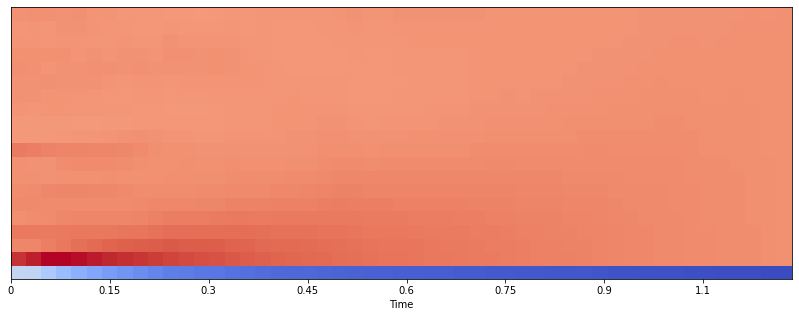

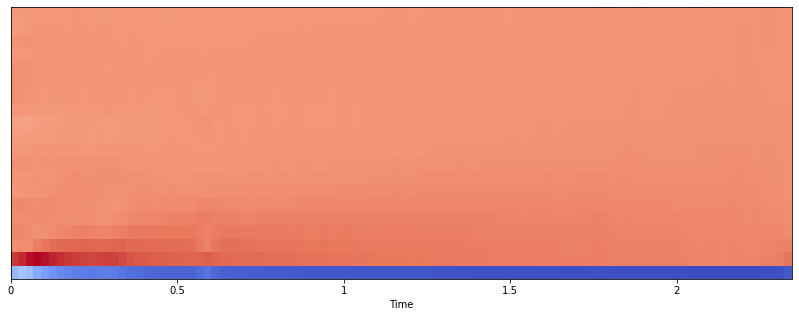

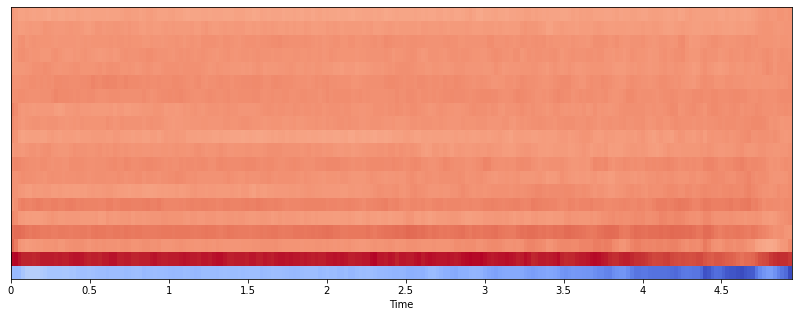

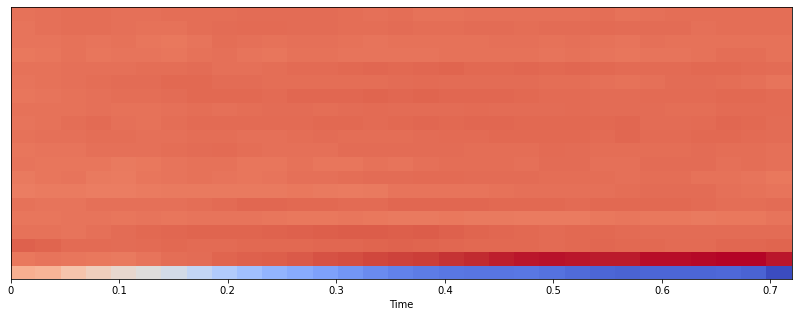

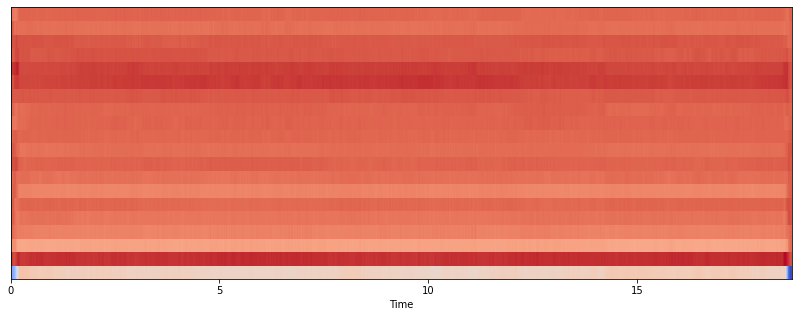

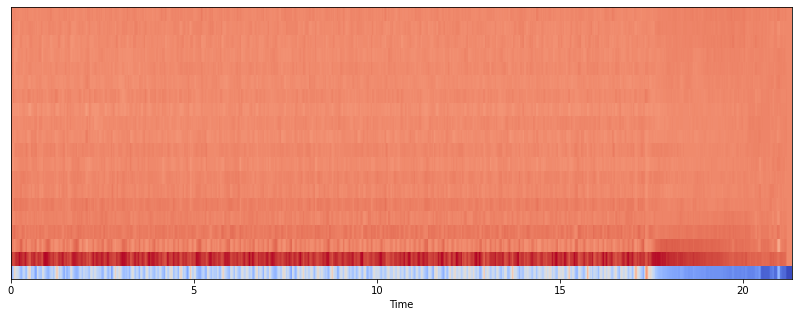

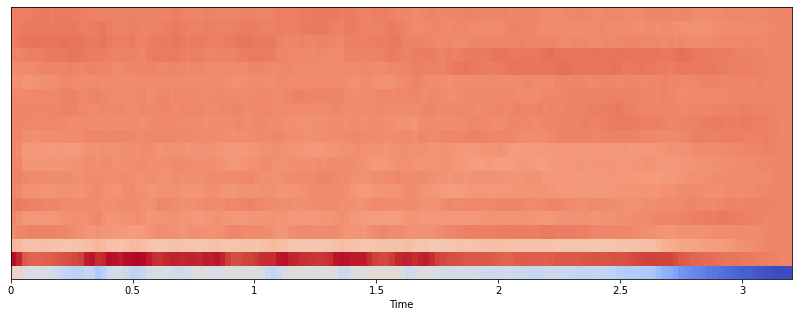

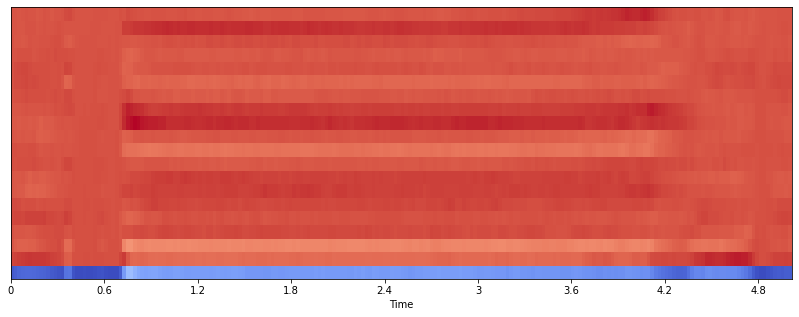

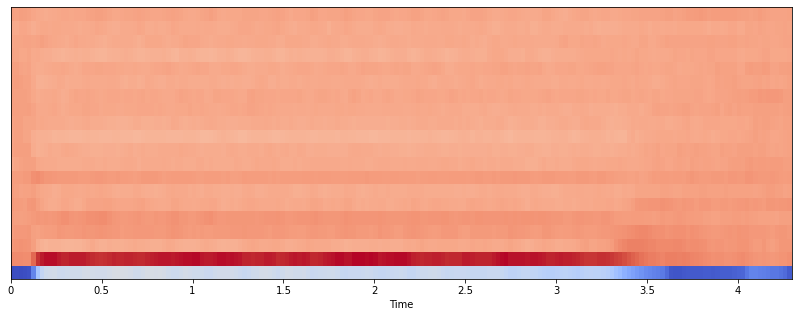

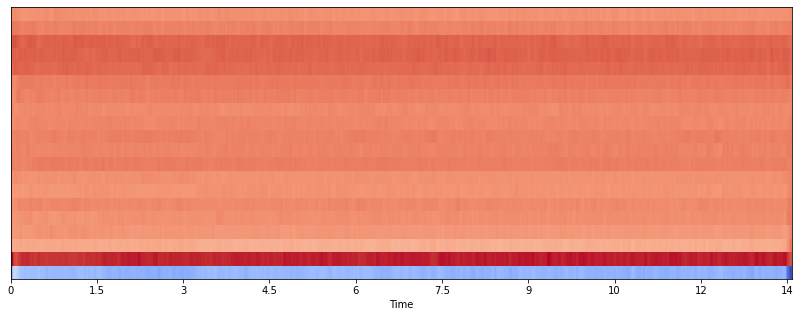

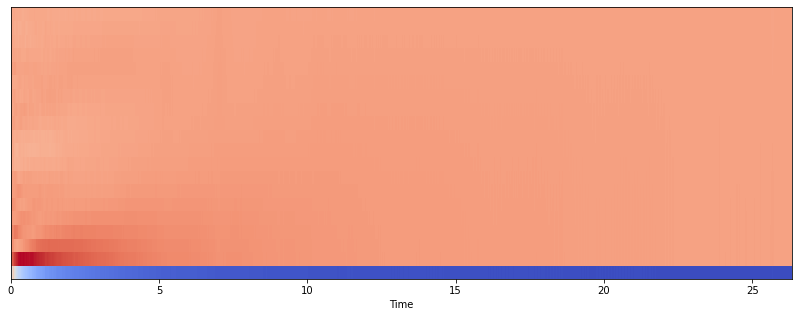

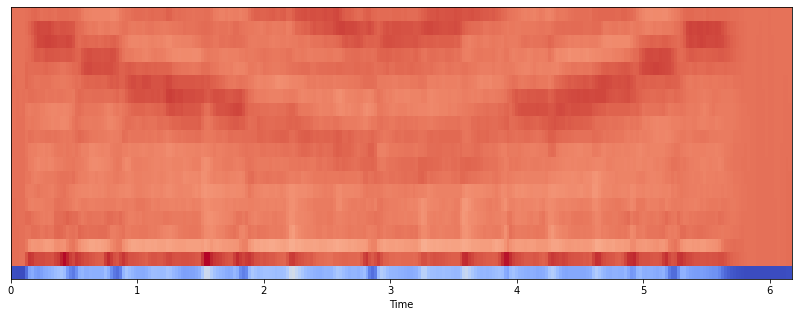

Error in callback <function flush_figures at 0x7f94f2c22440> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
#MFCC
#convert each of the waves into MFCC features
mfcc_features_b = list()

for i in range(0,len(b),2):
  mfccs = librosa.feature.mfcc(b[i], sr=b[i+1])
  #print(mfccs.shape)
  plt.figure(figsize=(14, 5))
  librosa.display.specshow(mfccs, sr=sr, x_axis='time')
  mfcc_features.append(mfccs)

mfcc_features_b = np.array(mfcc_features)

label_encoder_b = LabelEncoder()
label_encoded_b = label_encoder.fit_transform(mfcc_features_b)
print(label_encoded_b)

label_encoded_b = label_encoded_b[:, np.newaxis]
label_encoded_b

one_hot_encoder_b = OneHotEncoder(sparse=False)
one_hot_encoded_b = one_hot_encoder_b.fit_transform(label_encoded_b)
one_hot_encoded_b

In [ ]:
#MFCC
#convert each of the waves into MFCC features
mfcc_features_c = list()

for i in range(0,len(c),2):
  mfccs = librosa.feature.mfcc(c[i], sr=c[i+1])
  #print(mfccs.shape)
  plt.figure(figsize=(14, 5))
  librosa.display.specshow(mfccs, sr=sr, x_axis='time')

mfcc_features_c = np.array(mfcc_features)

label_encoder_c = LabelEncoder()
label_encoded_c = label_encoder.fit_transform(mfcc_features_c)
print(label_encoded_c)

label_encoded_c = label_encoded_c[:, np.newaxis]
label_encoded_c

one_hot_encoder_c = OneHotEncoder(sparse=False)
one_hot_encoded_c = one_hot_encoder_c.fit_transform(label_encoded_c)
one_hot_encoded_c


In [ ]:
#Import all the important libraries
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import TensorDataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, models, transforms
from math import floor

# CNN


In [ ]:
#Sample code describing MFCC
#### Step 5: Model training
X = mfcc_features
y = one_hot_encoded
X = (X-X.min())/(X.max()-X.min())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Defining input shape for the neural network
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Reshape X_train and X_test such that they are having the same shape as the input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print(X_test.shape)

# Constructing the neural network architecture
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# Displaying loss values
plt.figure(figsize=(8,8))
plt.title('Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
print('loss:', history.history['loss'][-1])
print('val_loss:', history.history['val_loss'][-1])
plt.show()

# Displaying accuracy scores
plt.figure(figsize=(8,8))
plt.title('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
print('acc:', history.history['acc'][-1])
print('val_acc:', history.history['val_acc'][-1])
plt.show()

#### Step 6: Model evaluation
predictions = model.predict(X_test)

predictions = np.argmax(predictions, axis=1)
y_test = one_hot_encoder.inverse_transform(y_test)

# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#Below are the three data set directories
trainingData = datasets.ImageFolder(os.path.join(dataDirectory, 'Training/'), transform = transformData)
validationData = datasets.ImageFolder(os.path.join(dataDirectory, 'Validation/'), transform = transformData)
testingData = datasets.ImageFolder(os.path.join(dataDirectory, 'Testing/'), transform = transformData)

print('The Training dataset contains: ', len(trainingData))
print('The Validation dataset contains: ', len(validationData))
print('The Testing dataset contains: ', len(testingData))

In [ ]:
#In my CNN model i plan on using 6 layers in total
#First, I will be using 2 Convolutional layers
#Second, I have 1 Max Pooling layers
#Next, I have 2 fully connected layers
#Lastly, I have an output layer

class CNN_Model(nn.Module):
  def __init__(self):
    super(CNN_Model, self).__init__()
    #Input channels = 3, Output channels = 10, Kernel size = 5
    self.conv1 = nn.Conv2d(3, 10, 5)
    #Input channels = 10, Output channels = 5, Kernel size = 5
    self.conv2 = nn.Conv2d(10, 5, 5)
    #Kernel size = 2, Stride = 2
    self.pool = nn.MaxPool2d(2, 2)
    #Input features = 14045, Output features = 35
    self.fc1 = nn.Linear(5*53*53, 35)
    #Input features = 35, Output features = 9
    self.fc2 = nn.Linear(35, 9)
  
  def forward(self, x):
    #ReLU Activation layer
    x = self.pool(F.relu(self.conv1(x)))
    #Flatten the tensor
    x = x.view(-1, 5*53*53)
    #ReLU Activation layer
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    #Return the output layer
    return x

In [ ]:
#Get the accuracy of the model
def get_accuracy(model, dataLoader):
  correct = 0
  total = 0

  for images, labels in iter(dataLoader):
    #Allow GPUs to be used
    if torch.cuda.is_available():
      images = images.cuda()
      labels = labels.cuda()
      model.cuda()

    output = model(images)

    #Choose the index with the highest probability
    prediction = output.max(1, keepdim = True)[1]
    correct += prediction.eq(labels.view_as(prediction)).sum().item()
    total += images.shape[0]

  #Get the final accuracy of the model from the images that were tested
  accuracy = correct/total
  return accuracy

In [ ]:
#Train the neural network given training data
def train(model, trainingData, validationData, batch_size = 27, epochs = 1, learning_rate = 0.01):
  train_loader = torch.utils.data.DataLoader(trainingData, batch_size=batch_size, shuffle=True)
  validation_loader = torch.utils.data.DataLoader(validationData, batch_size=batch_size, shuffle=True)

  torch.manual_seed(50) 

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

  iterations = 0
  trainingAccuracy = []
  validationAccuracy = []
  losses = []

  for epoch in range(epochs):
    for images, labels in iter(train_loader):
      if torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
        model.cuda()

      #Forward Pass
      output = model(images)
      #Calculating the loss
      loss = criterion(output, labels)
      #Backwards Pass
      loss.backward()
      #Updating the parameters
      optimizer.step()
      #Cleaning up
      optimizer.zero_grad()

      iterations += 1

    trainingAccuracy.append(get_accuracy(model, train_loader))
    validationAccuracy.append(get_accuracy(model, validation_loader))
    losses.append(float(loss)/batch_size)
    print('Epoch: ', epoch, 'Training Accuracy: ', trainingAccuracy[-1], 'Validation Accuracy: ', validationAccuracy[-1])
  
  #Plot the graphs

  #Accuracy Plot
  plt.title("Training Curve")
  plt.plot(trainingAccuracy, label='Training')
  plt.plot(validationAccuracy, label='Validation')
  plt.xlabel('Iterations')
  plt.ylabel('Accuracy')
  plt.show()

  #Loss Plot
  plt.title('Training Curve')
  plt.plot(losses, label='Training')
  plt.xlabel('Iterations')
  plt.ylabel('Loss')
  plt.show()
